# Supervised Machine Learning

- <a href="#Data-Visualisation">Data Viz</a>
- <a href="#Hypothesis-Testing">Hypothesis Testing</a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

import scipy.stats as st
import pingouin as pg
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, auc, roc_auc_score, roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.decomposition import PCA

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Data Preparation

In [3]:
# url to the dataset
url=f"https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"

In [4]:
# information on the variables
names=f"""ID	ID
Age	age
Gender	gender
Education	level of education
Country	country of current residence
Ethnicity	ethnicity
Nscore	NEO-FFI-R Neuroticism
Escore	NEO-FFI-R Extraversion
Oscore	NEO-FFI-R Openness
Ascore	NEO-FFI-R Agreeableness
Cscore	NEO-FFI-R Conscientiousness
Impulsive	BIS-11 Impulsiveness
SS	ImpSS sensation
Alcohol	alcohol consumption (output attribute)
Amphet	amphetamines consumption (output attribute)
Amyl	amyl nitrite consumption (output attribute)
Benzos	benzodiazepine consumption (output attribute)
Caff	caffeine consumption (output attribute)
Cannabis	cannabis consumption (output attribute)
Choc	chocolate consumption (output attribute)
Coke	cocaine consumption (output attribute)
Crack	crack consumption (output attribute)
Ecstasy	ecstasy consumption (output attribute)
Heroin	heroin consumption (output attribute)
Ketamine	ketamine consumption (output attribute)
Legalh	legal highs consumption (output attribute)
LSD	LSD consumption (output attribute)
Meth	methadone consumption (output attribute)
Mushrooms	magic mushrooms consumption (output attribute)
Nicotine	nicotine consumption (output attribute)
Semer	fictitious drug Semeron consumption (output attribute)
VSA	volatile substance abuse consumption (output attribute)"""

In [5]:
# groups labels for categorical variables
age_lb=["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
gender_lb=["Male", "Female"]
education_lb=["Left before 16", "Left at 16", "Left at 17", "Left at 18","Left at Uni", "Certificate/Diploma", "University", "Masters", "PhD"]
country_lb=["USA", "New Zealand", "Other", "Australia",  "Republic of Ireland", "Canada", "UK"]
ethnicity_lb=["Black", "Asian", "White", "Mixed-White/Black", "Other", "Mixed-White/Asian", "Mixed-Black/Asian"]
user_lb=["Non-user", "Drug user"]

In [6]:
# personality test scores columns
scores= ["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]

In [7]:
# Download dataset with the column titles
def download(url, titles):
    df=pd.read_csv(url, header=None)
    titles = [row.split("\t") for row in titles.split(f"\n")]
    df.columns=pd.DataFrame(titles)[0]
    display(df.info())
    print(f"""Missing Values: """)
    display(df.isna().sum())
    print(f"""Sample of the dataset: """)
    display(df.head())
    return df

In [8]:
df=download(url, names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   Age        1885 non-null   float64
 2   Gender     1885 non-null   float64
 3   Education  1885 non-null   float64
 4   Country    1885 non-null   float64
 5   Ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff       1885 non-null   object 
 18  Cannabis   1885 non-null   object 
 19  Choc       1885 non-null   object 
 20  Coke    

None

Missing Values: 


0
ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

Sample of the dataset: 


0  ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

0   Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0 -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
1  1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
2 -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
3 -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
4 -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   

0 Mushrooms Nicotine Semer  VSA  
0       CL0      CL2   CL0  CL0  
1       CL0      CL4   CL0  CL0  
2       CL1      CL0   CL0  CL0  
3       CL0      CL2   CL0  CL0  
4       CL2      CL2   CL0  CL0  

[5 rows x 32 columns]

There are no missing values in the dataset at a glance, and all of the output attributes are coded as categorical data which will require preprocessing. The column ID is redundant in this data exploration exercise.

In [9]:
# removing the ID column from dataset
df.drop(columns="ID", inplace=True)

### Bias Sample 

In [10]:
# Semeron is a fictious drug included on the survey to identify those who exaggerate their drug usage, therefore those indicated with any usage in this category should be removed

def semer(df):
    display(df.Semer.value_counts())
    df.drop(df[df.Semer!="CL0"].index, axis=0, inplace=True)
    return df.drop(columns="Semer")

df=semer(df)

CL0    1877
CL2       3
CL3       2
CL1       2
CL4       1
Name: Semer, dtype: int64

### Preprocessing
#### Non-numerical columns

In [11]:
# transforming the non-numerical columns
def non_num_transform(df):
    output= list(set(df.columns).difference(set(df._get_numeric_data().columns)))
    for o in output:
        le = LabelEncoder()
        df[o] = le.fit_transform(df[o])
    return output

output_attributes=non_num_transform(df)

#### Hard Drugs

In [12]:
# define what are hard drugs
hard_drugs=["Amphet", "Benzos", "Coke", "Crack", "Ecstasy", "Heroin", "Legalh", "Meth"]

In [13]:
# encode a new column to identify whether an individual is a hard drug user or not (with frequency>1)
def hard_drug_user(df, hard_drugs):
    df["hard"]=df[df[hard_drugs]>1].any(axis=1)
    print(f"The distribution of hard drug user:")
    display(df.hard.value_counts(normalize=True).round(2))
    print(f"Descriptive summary of the hard drug user vs non user on personality test scores:")
    display(df.groupby("hard").agg(["mean", "std", "median", "min", "max"]).round(2).stack()[["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]])
    return df

In [14]:
df=hard_drug_user(df, hard_drugs)

The distribution of hard drug user:


True     0.64
False    0.36
Name: hard, dtype: float64

Descriptive summary of the hard drug user vs non user on personality test scores:


Nscore  Escore  Oscore  Ascore  Cscore  Impulsive    SS
hard                                                                 
False mean     -0.23    0.07   -0.43    0.22    0.38      -0.36 -0.52
      std       0.92    0.92    0.90    0.93    0.91       0.91  0.84
      median   -0.25    0.00   -0.45    0.29    0.42      -0.22 -0.53
      min      -2.76   -2.73   -3.27   -2.54   -2.42      -2.56 -2.08
      max       2.61    2.86    2.90    2.76    3.46       2.90  1.92
True  mean      0.13   -0.04    0.24   -0.13   -0.22       0.21  0.28
      std       1.02    1.04    0.97    1.01    0.98       0.92  0.90
      median    0.14    0.00    0.29   -0.15   -0.28       0.19  0.40
      min      -3.46   -3.27   -3.27   -3.46   -3.46      -2.56 -2.08
      max       3.27    3.27    2.90    3.46    3.01       2.90  1.92

## Distribution of Variables

In [15]:
def iv_displot(df, scores):
    graph_name="graph/displot {}.png"
    sns.set(style="white", font_scale = 1.2)

    for score in scores:
        fig = plt.figure(figsize=(6,4))
        sns.distplot(df[score])
        plt.title(f"Distribution of {score}")
        plt.xlabel(score)
        plt.ylabel("Frequency")
        #plt.savefig(graph_name.format(score) , transparent=True)
        plt.show()
        
    return None

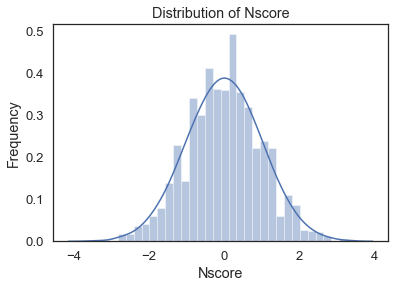

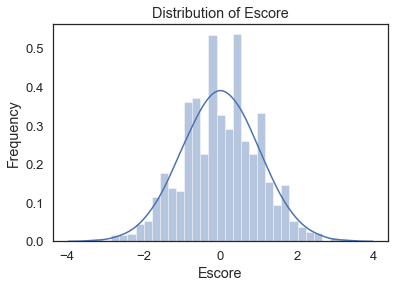

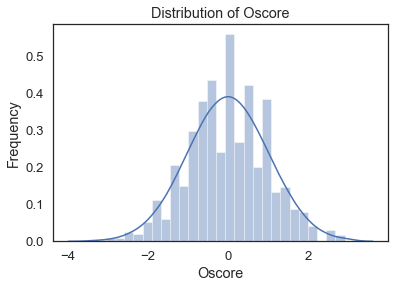

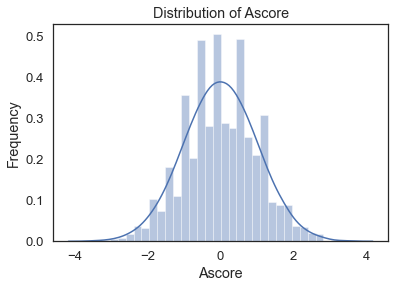

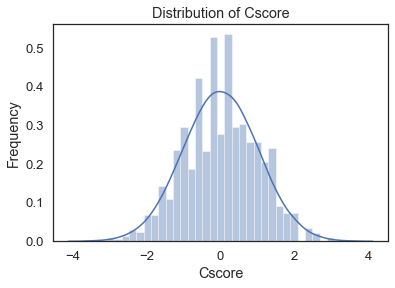

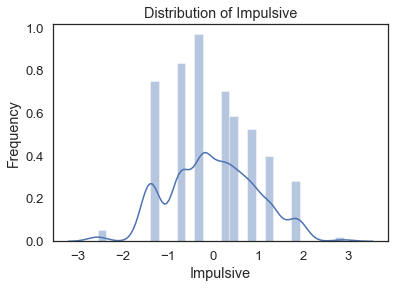

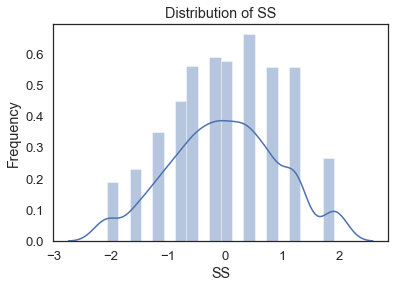

In [16]:
iv_displot(df, scores)

The personality test scores are mostly normally distributed with the exception of Impulsive and SS.

## Data Visualisation

### User Vs. Non-User on Different Drugs

In [17]:
# User vs Non-User across different Drugs
pivot=[]
for c in output_attributes:
    x=df[c].value_counts(normalize=True)
    pivot.append(pd.Series(data=[c, x[x.index<2].sum()*100, x[x.index>=2].sum()*100]))

x=pd.DataFrame(data=pivot)
x.set_index(0, drop=True, inplace=True)
x.columns=["Non-user", "User"]

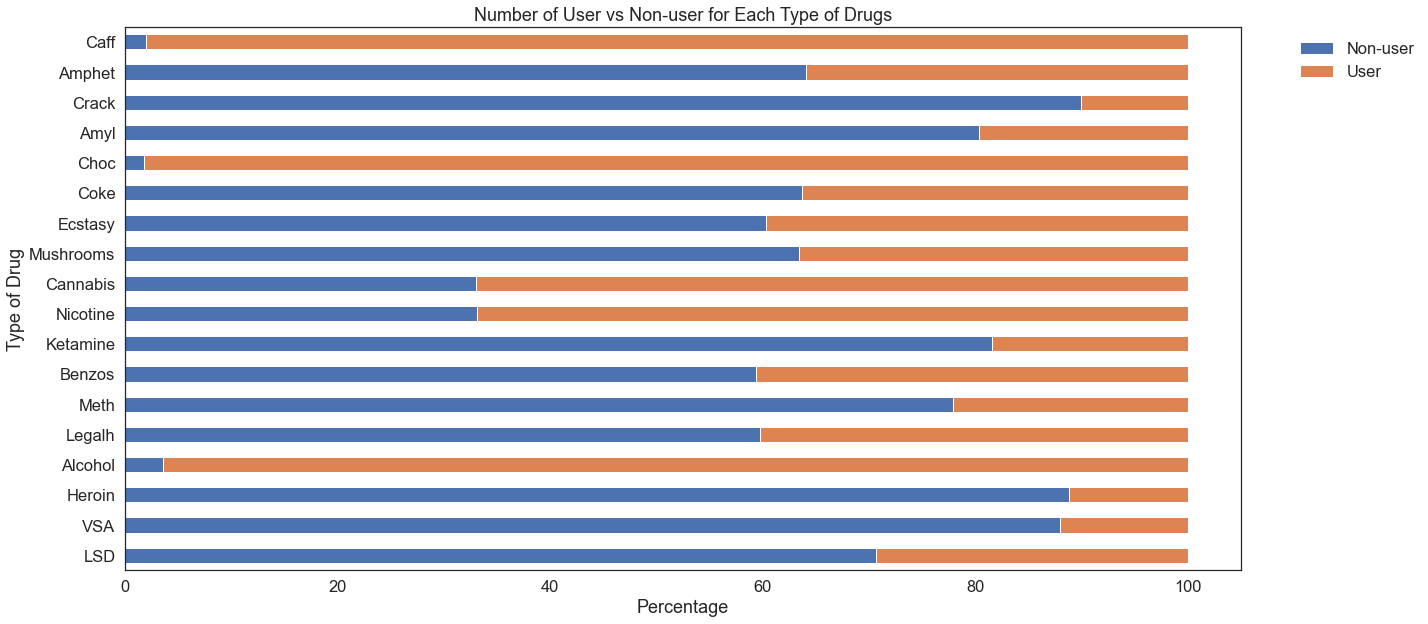

In [18]:
# 100% stacked bar for drug type by User/Non-User
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1.5)
x.plot.barh(stacked=True, figsize=(20,10), title="Number of User vs Non-user for Each Type of Drugs")
plt.ylabel("Type of Drug")
plt.xlabel("Percentage")
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

Most popular drug in terms of percentage at a glance is Caffeine, Chocolate and Alcohol (I myself would be there), then it is Cannabis and Nicotine, possible correlations between the two?

### Variety of Drug Type Used by Gender

In [19]:
# create a column to record the number of drug type variety used for each respondent
df["drug_use"]=df[df[hard_drugs]>1][hard_drugs].count(axis=1)

In [20]:
def plot_variety(df, cat):
    plt.style.use('seaborn-whitegrid')
    
    graph_name="graph/violin drug use variety by {}.png"
    sns.set(style="white", font_scale = 3)
    
    for c in cat:
        f, ax = plt.subplots(figsize=(40, 15))
        label=eval(c.lower()+"_lb")

        g=sns.violinplot(x=c, y="drug_use", data=df,hue='Gender',split=True, legend=True, palette=["b","r"], cut=0)
        g.set_xticklabels(label)

        g.set_ylabel("Variety of drug type used")
        g.set_xlabel(f"{c} Group")
        g.set_title(f"Variety of drug type used by {c} and Gender")
        for t, l in zip(g.legend().texts, gender_lb): t.set_text(l)

        #plt.savefig(graph_name.format(c) , transparent=True)
        plt.show()
    return None

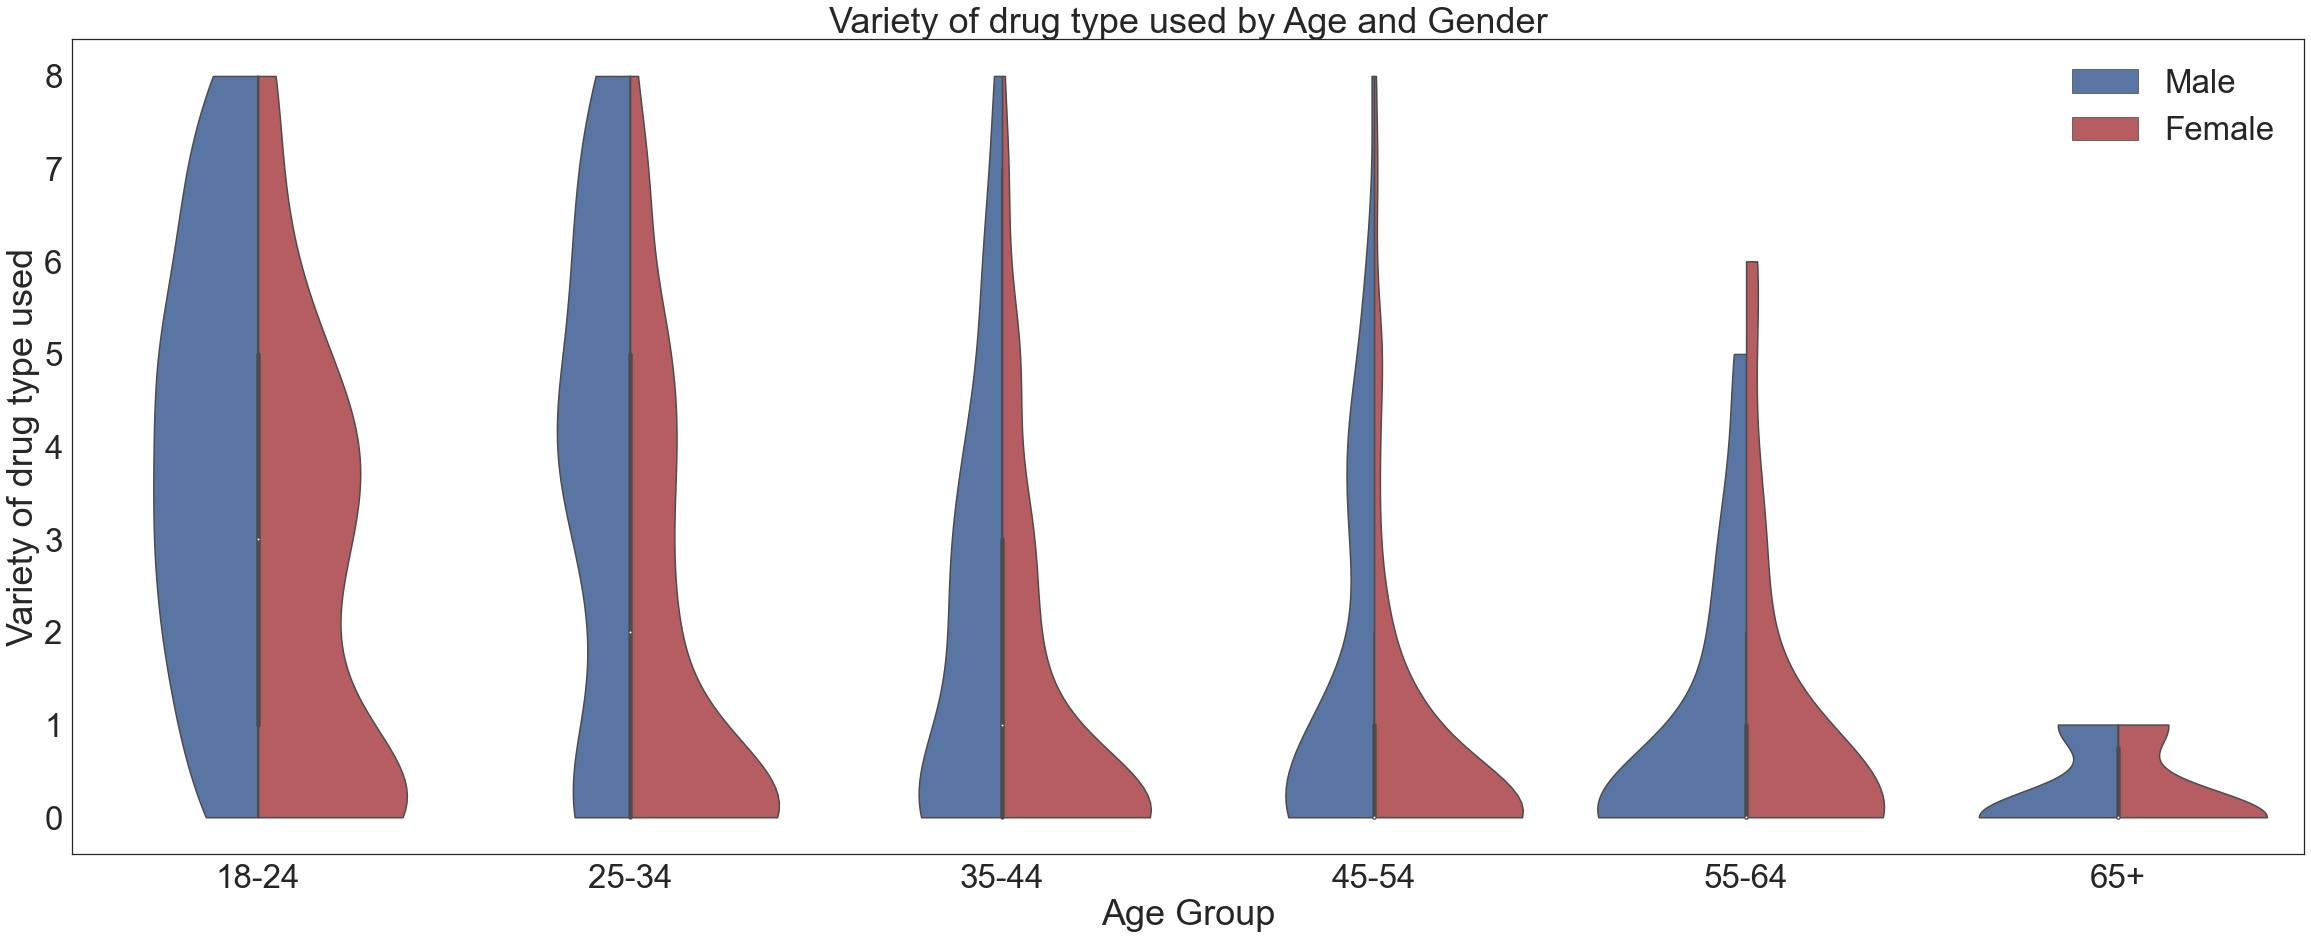

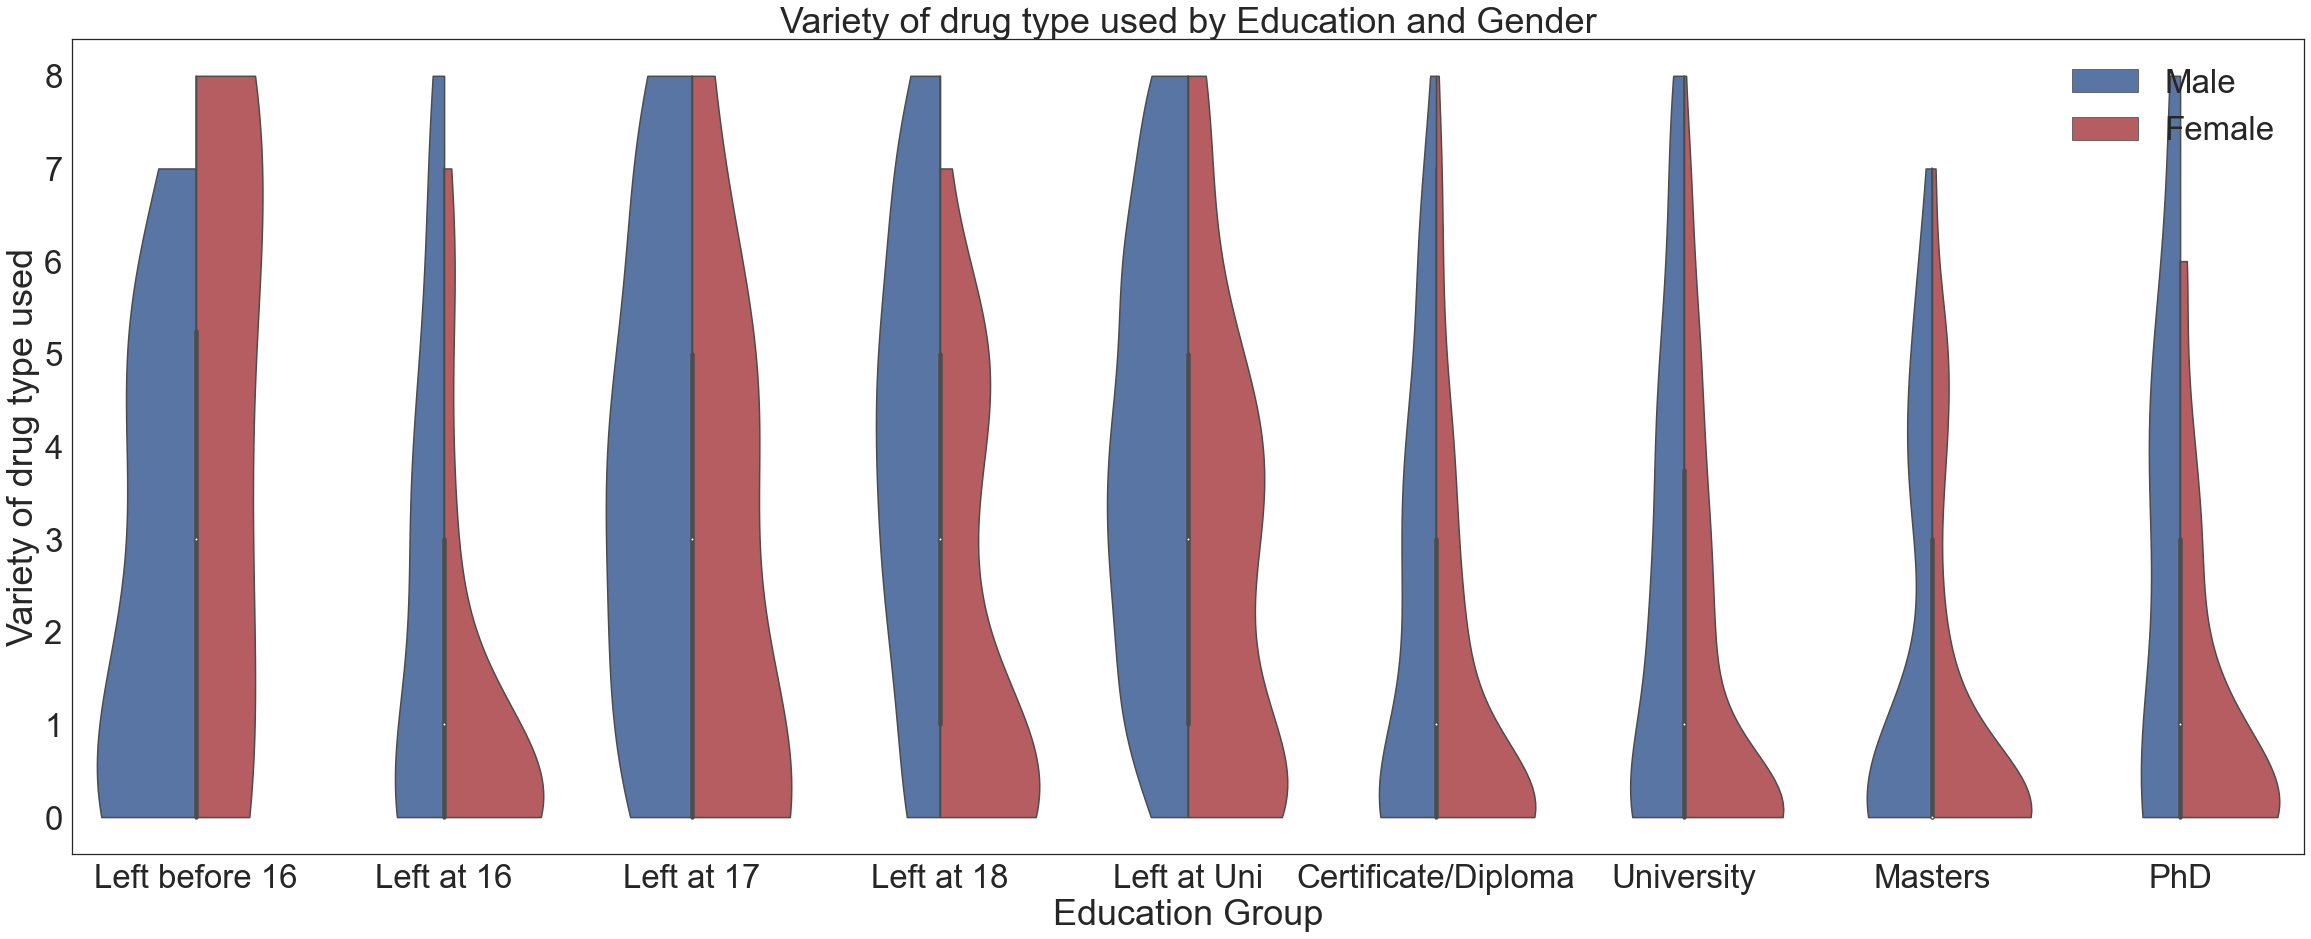

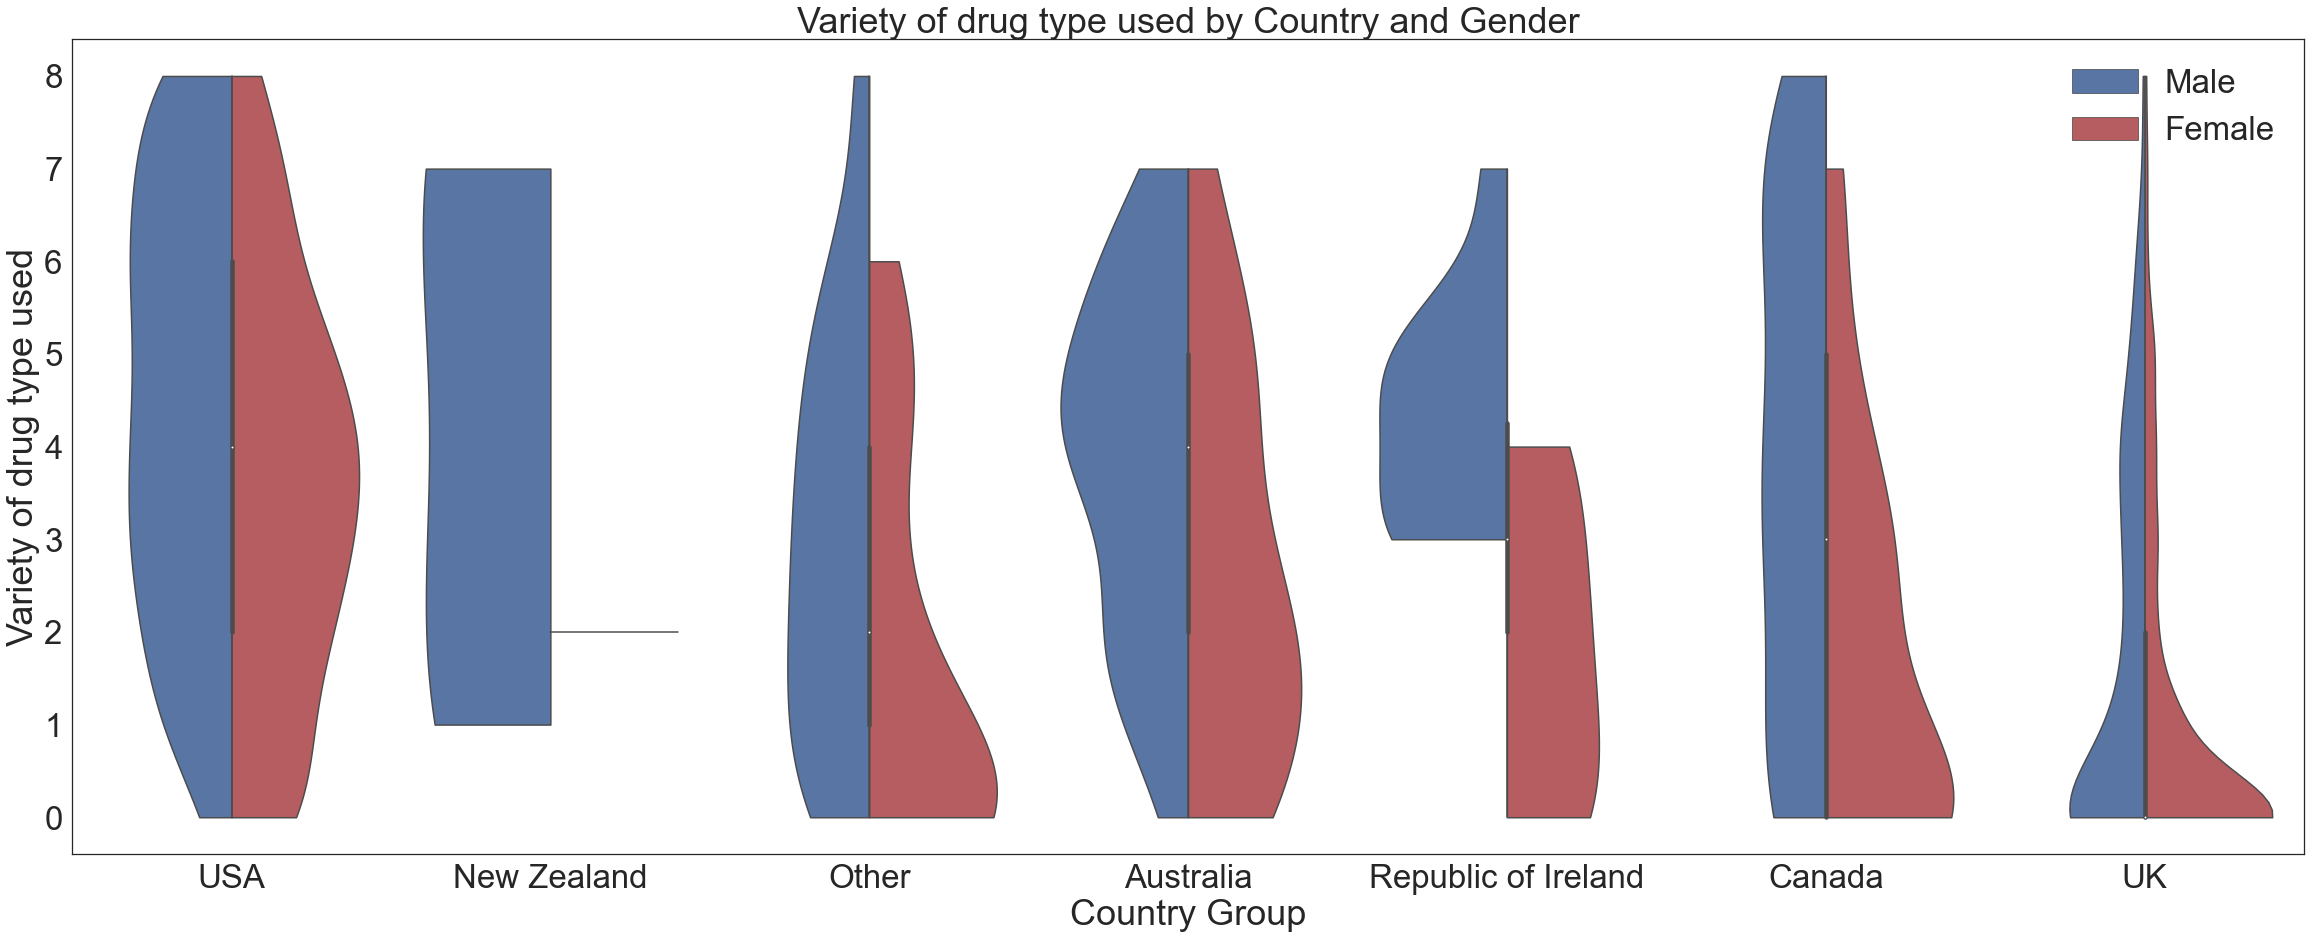

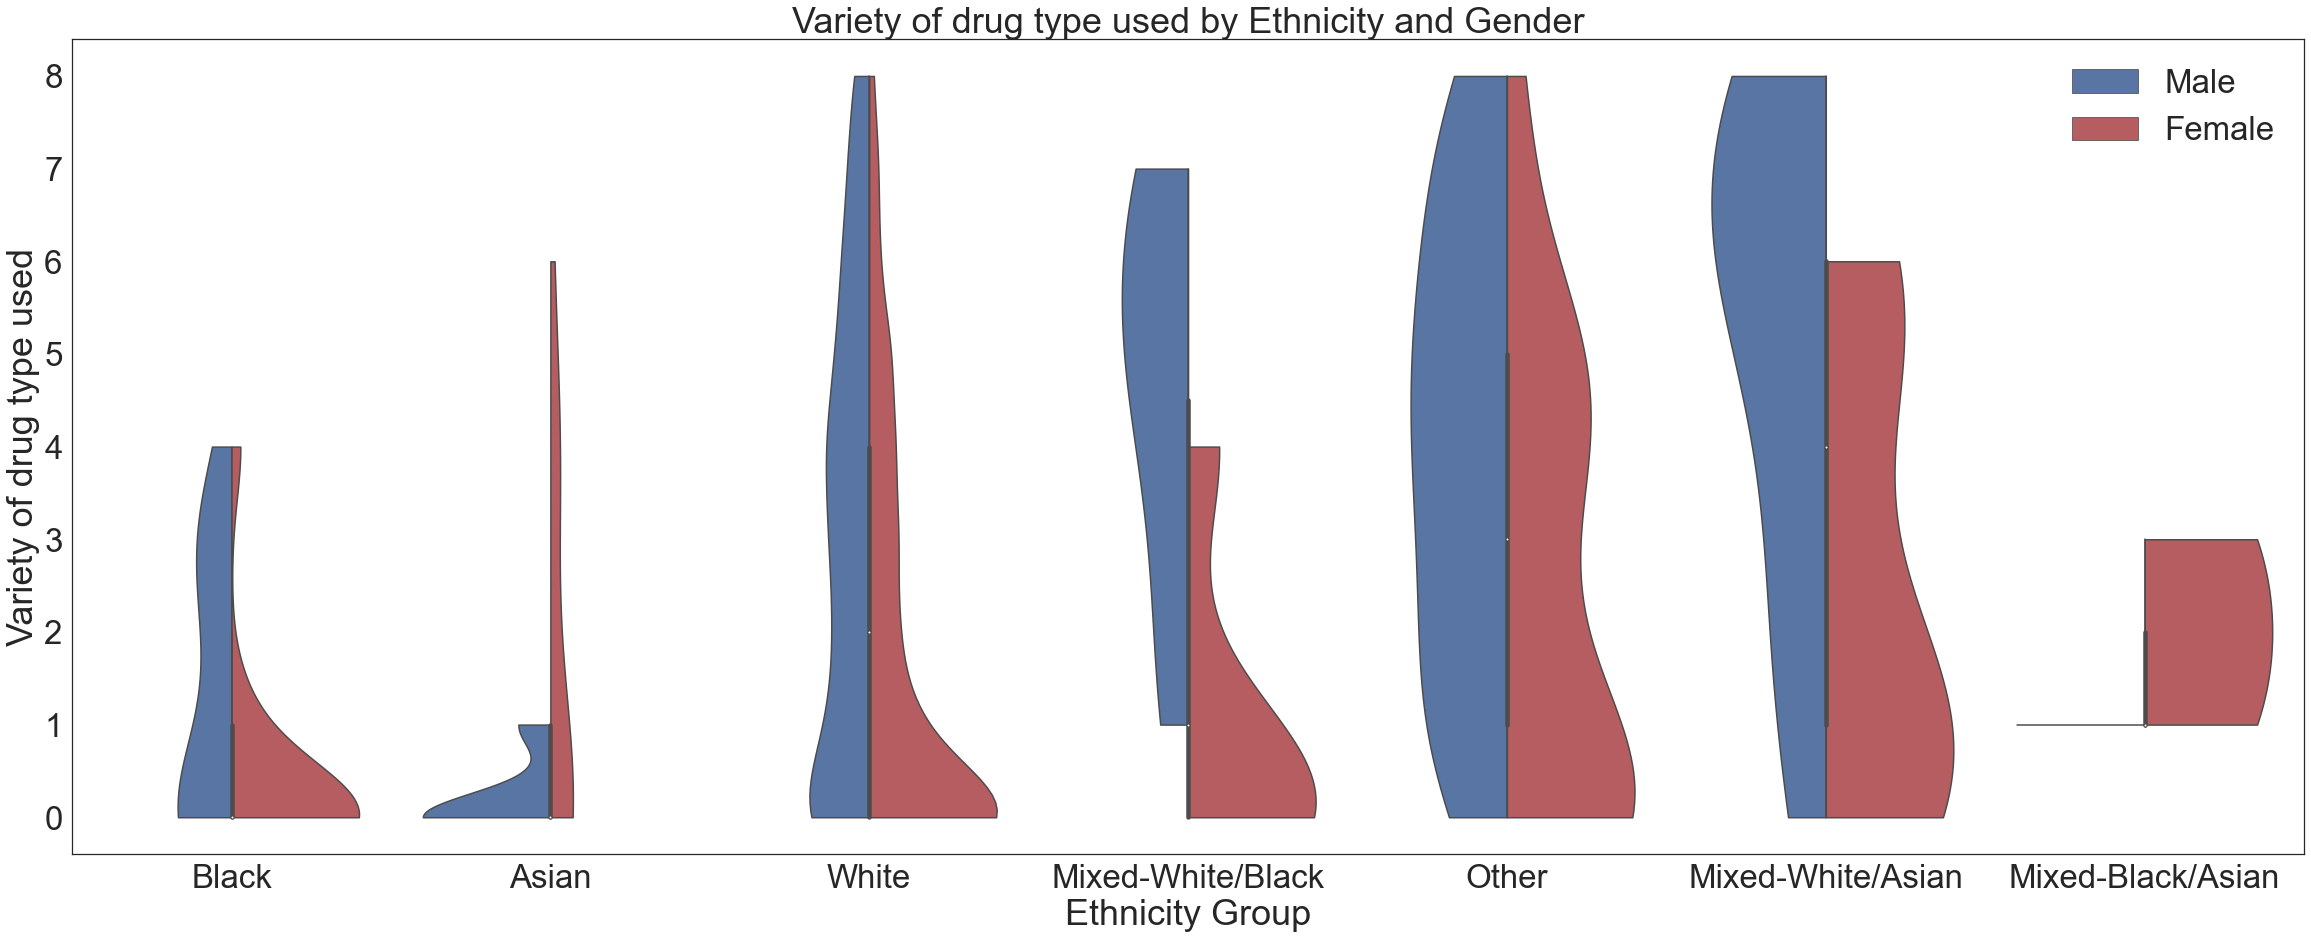

In [21]:
cat=["Age", "Education", "Country", "Ethnicity"]
plot_variety(df, cat)

### Personality Test Scores by User/Non-User

In [22]:
def plot_personality(df, cat, personality):
    plt.style.use('seaborn-whitegrid')
    
    graph_name="graph/violin {} by {}.png"
    sns.set(style="white", font_scale = 3)
    
    for c in cat:
        f, ax = plt.subplots(figsize=(40, 15))
        label=eval(c.lower()+"_lb")

        g=sns.violinplot(x=c, y=personality, data=df,hue='hard',split=True, legend=True, palette=["g","r"], cut=0)
        g.set_xticklabels(label)

        g.set_ylabel(personality)
        g.set_xlabel(f"{c} Group")
        g.set_title(f"Hard drug user vs. non-user on {personality} by {c}")
        for t, l in zip(g.legend().texts, user_lb): t.set_text(l)

        #plt.savefig(graph_name.format(personality, c) , transparent=True)
        plt.show()
    return None

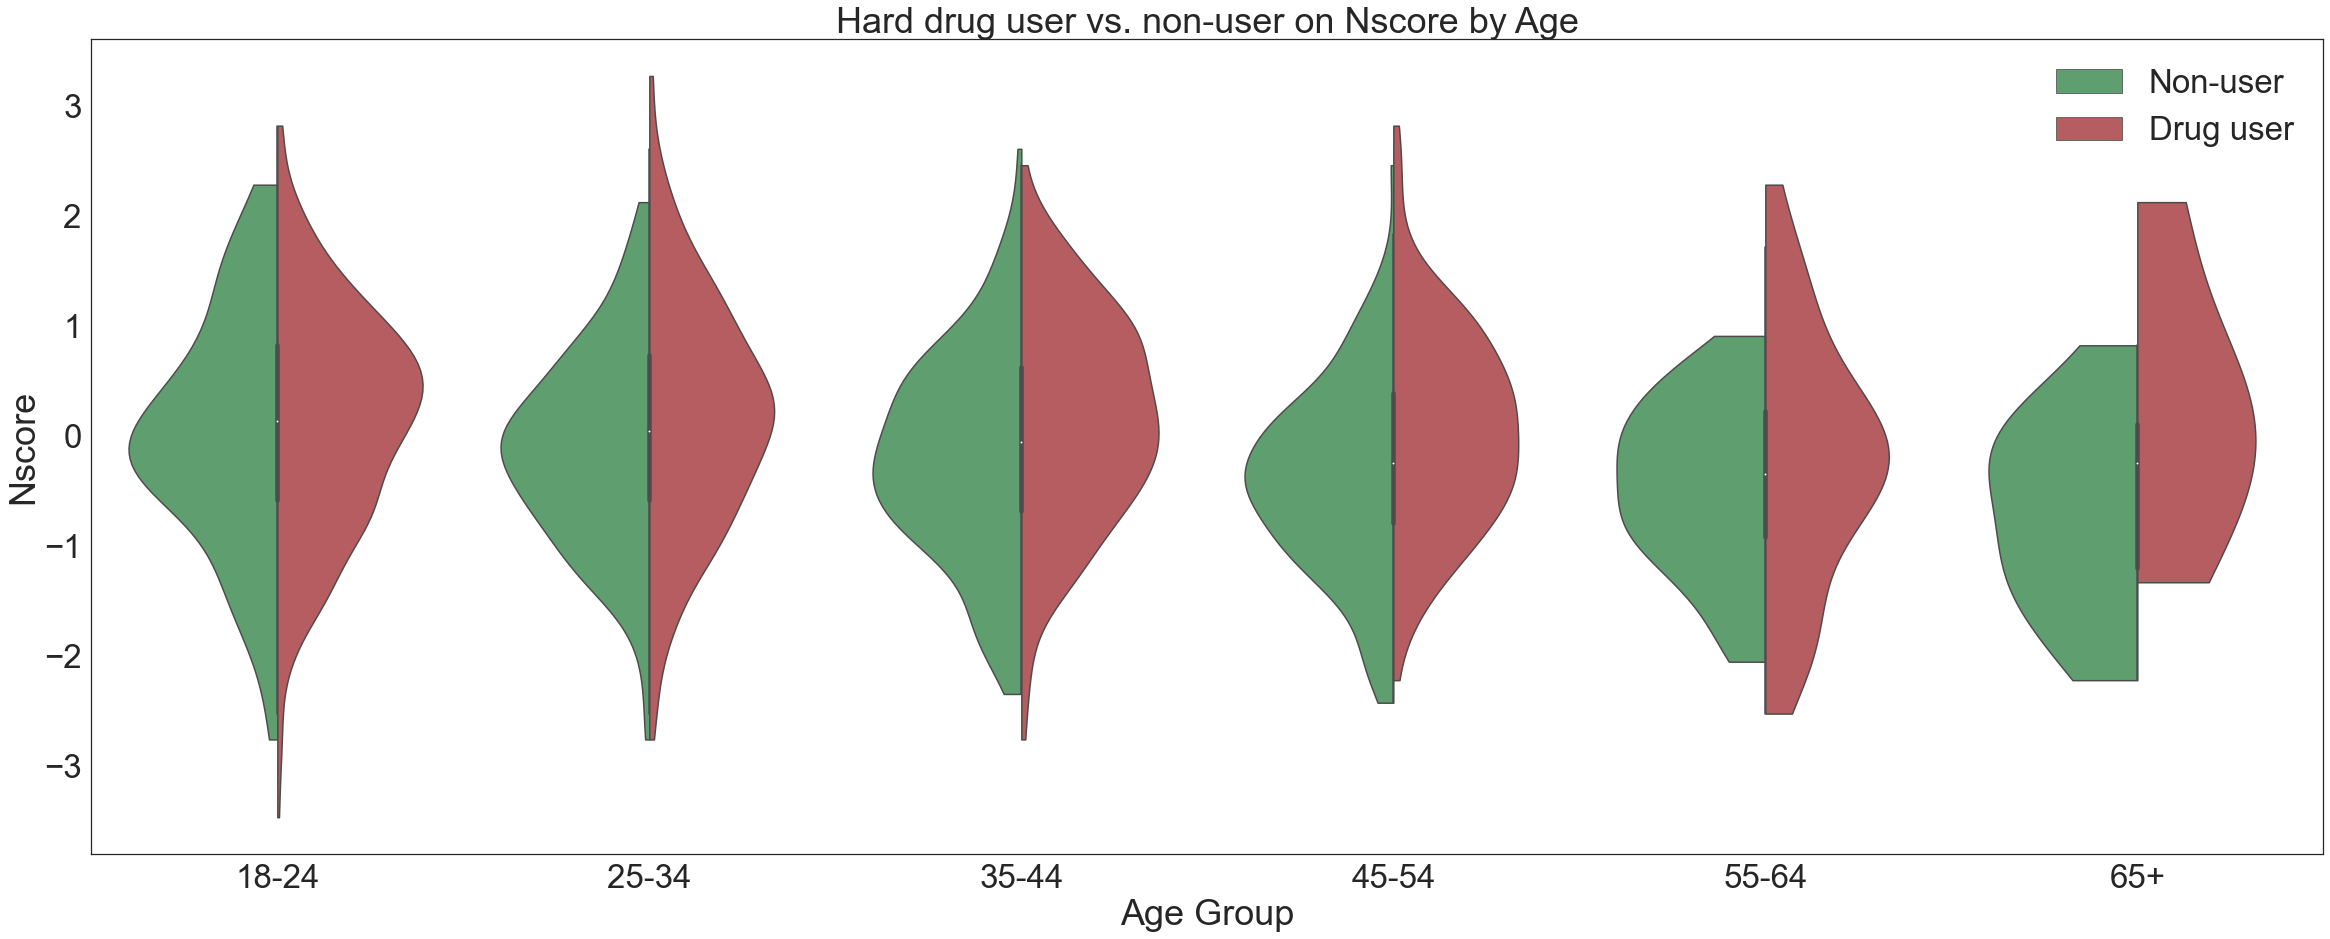

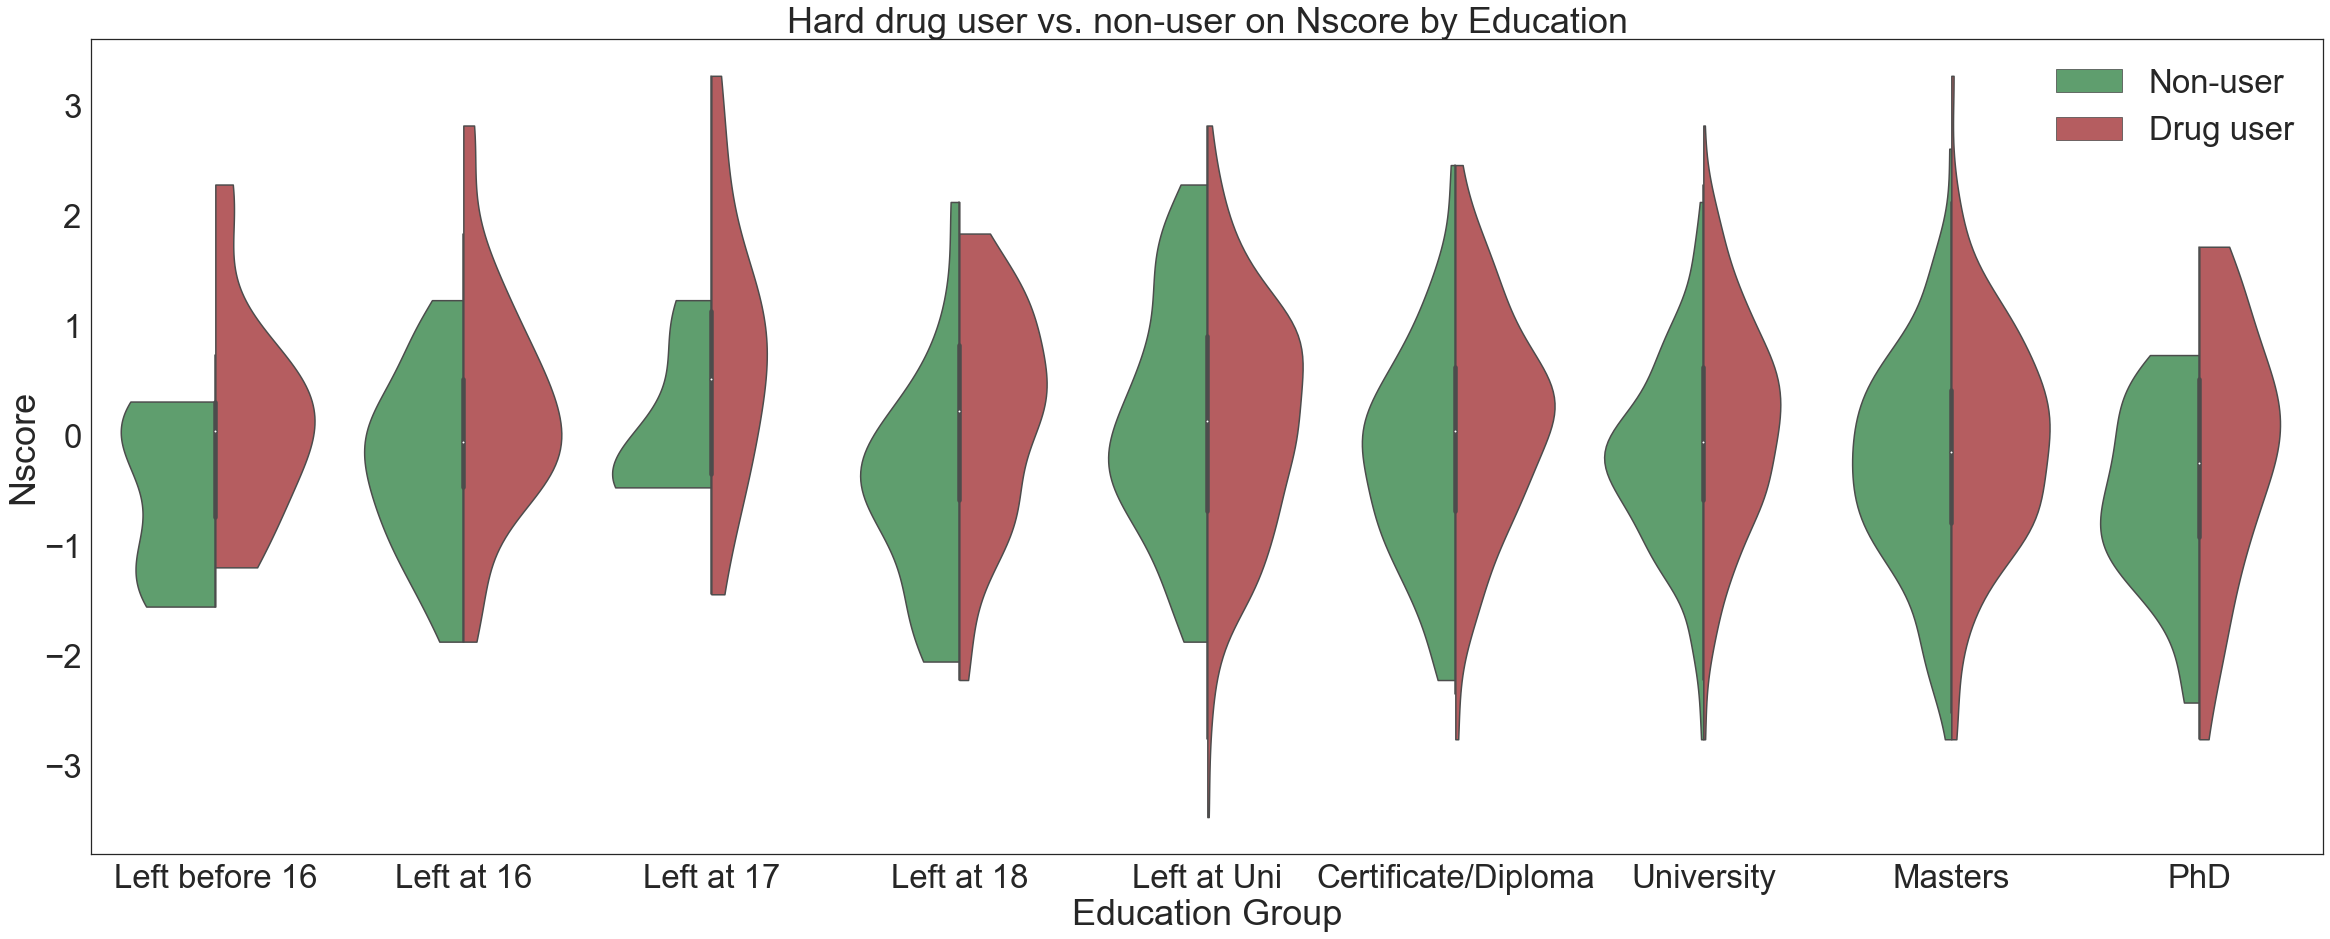

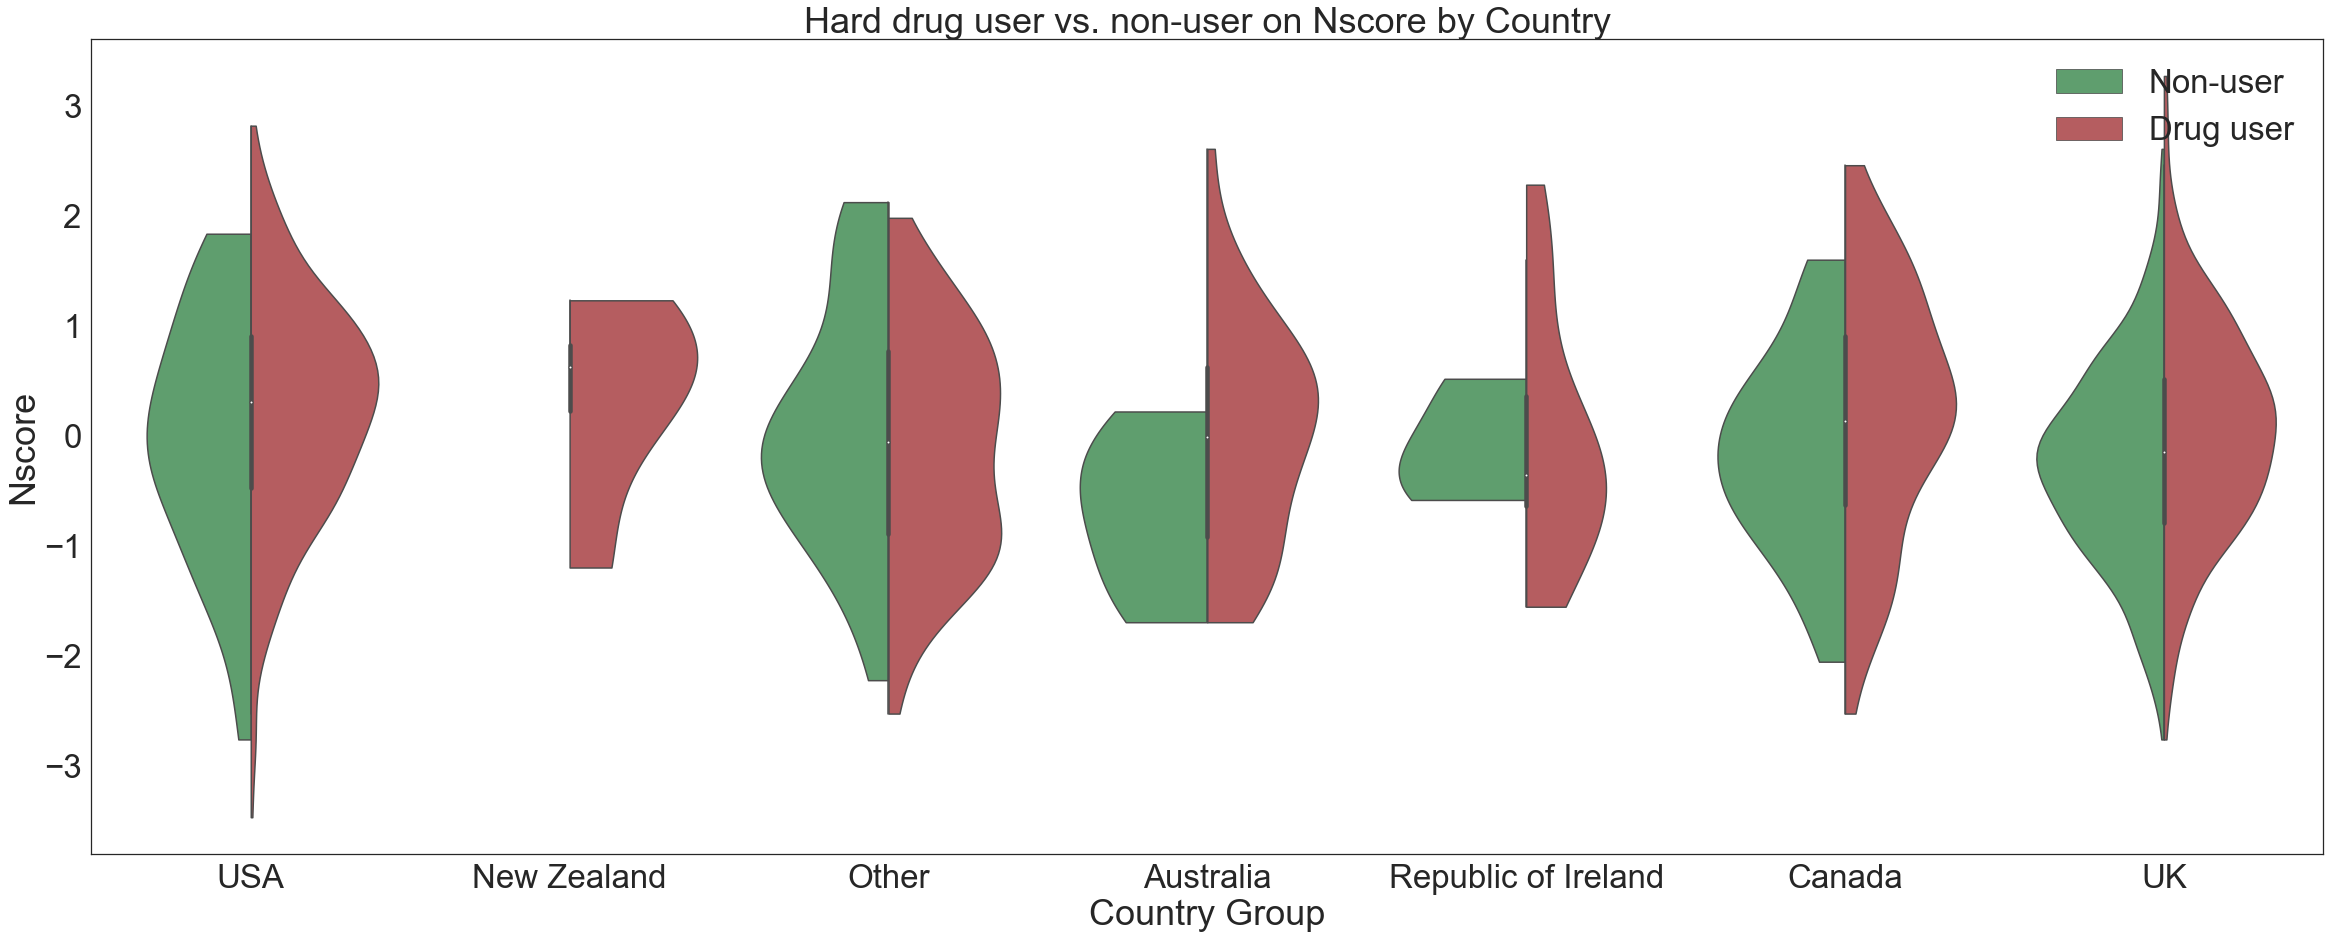

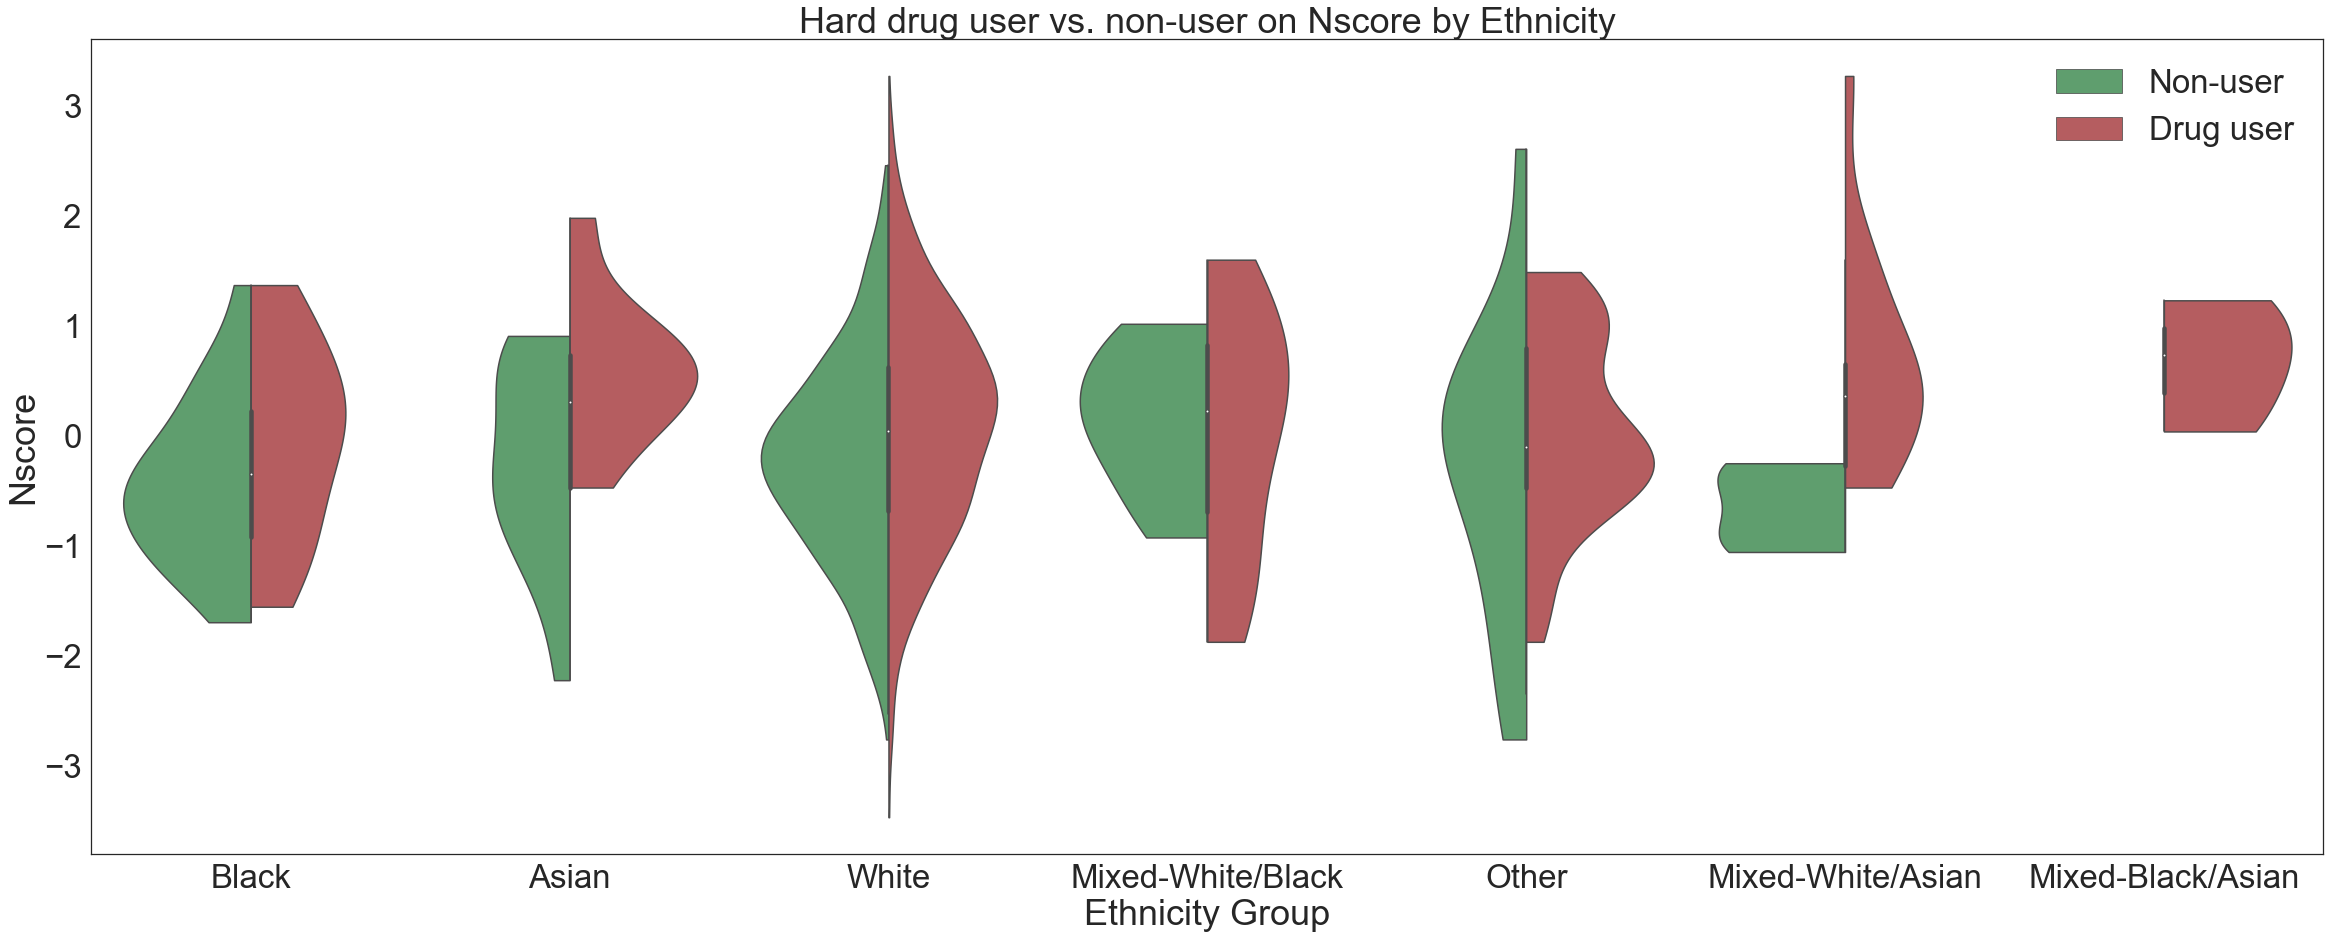

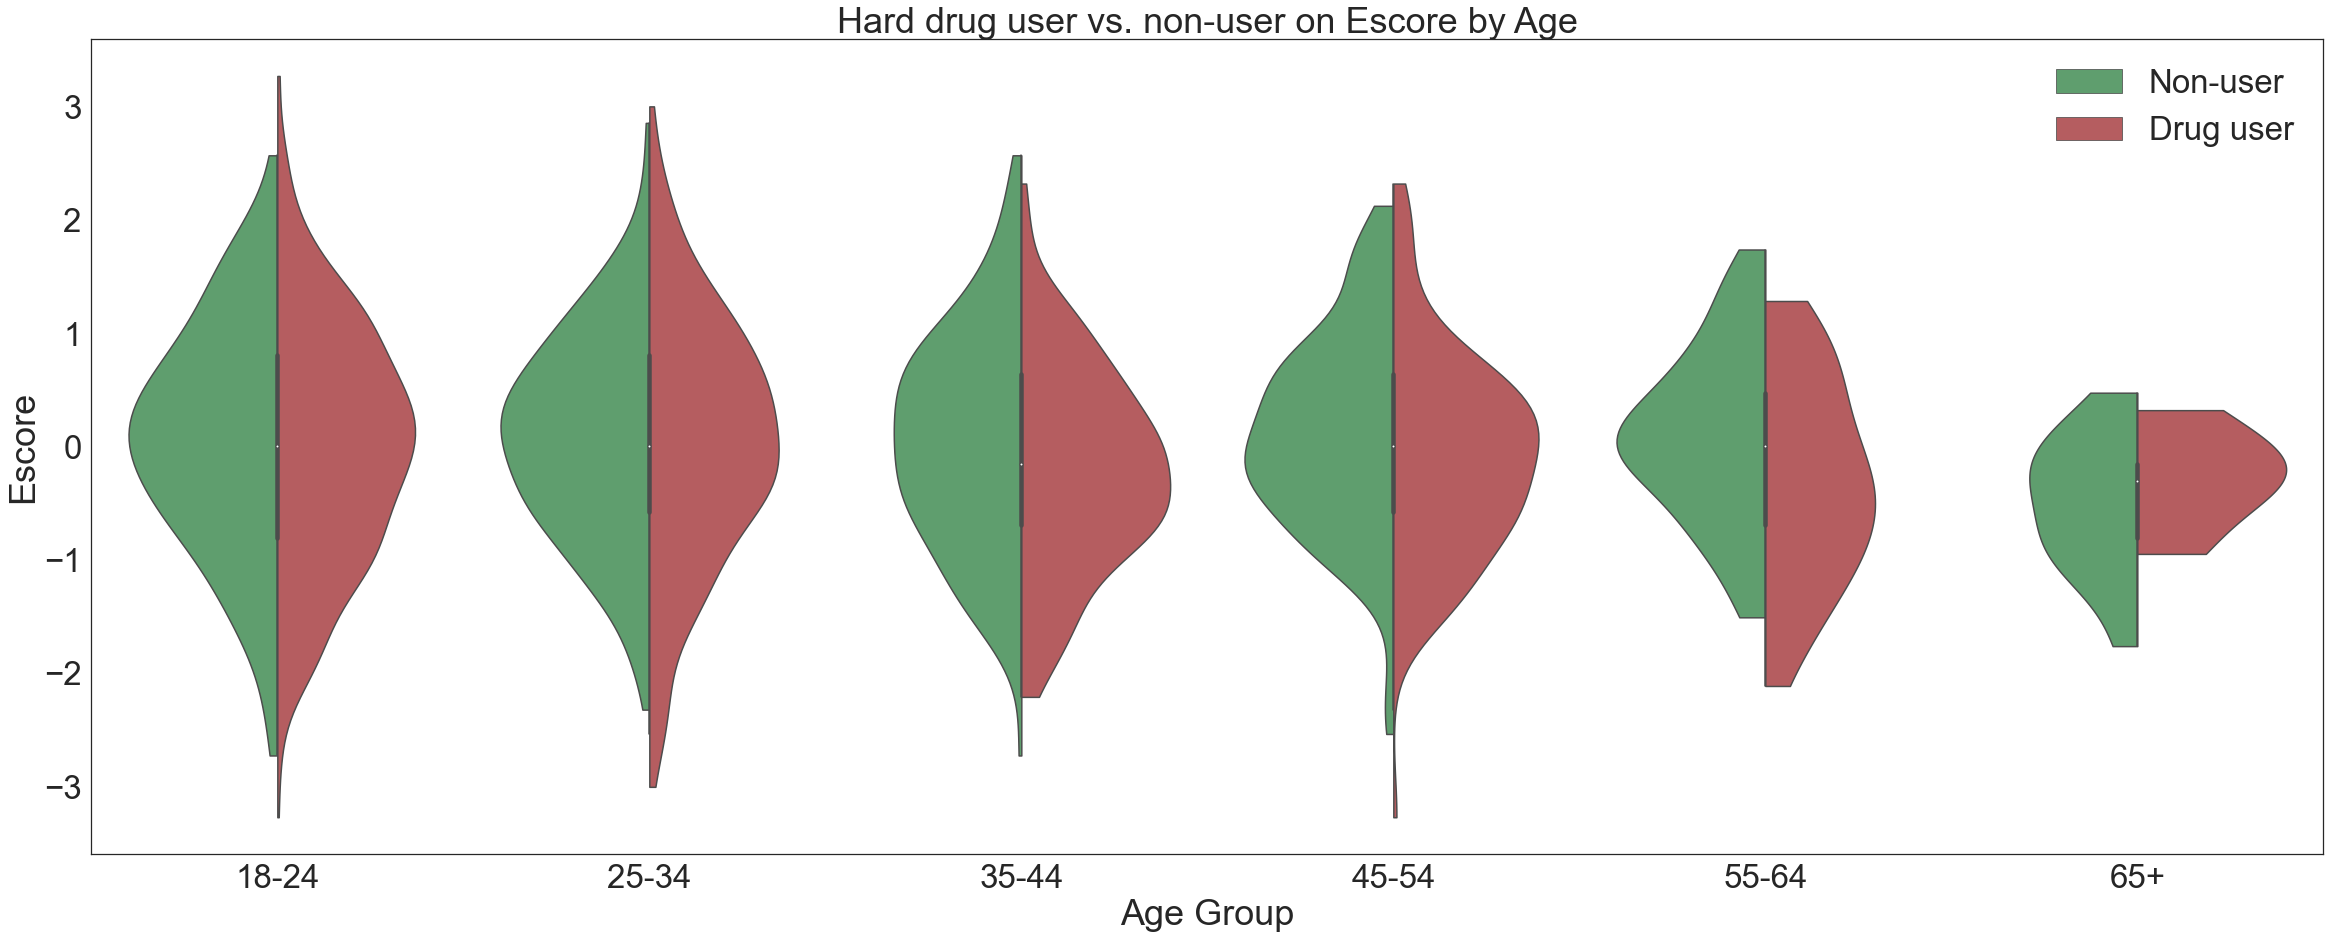

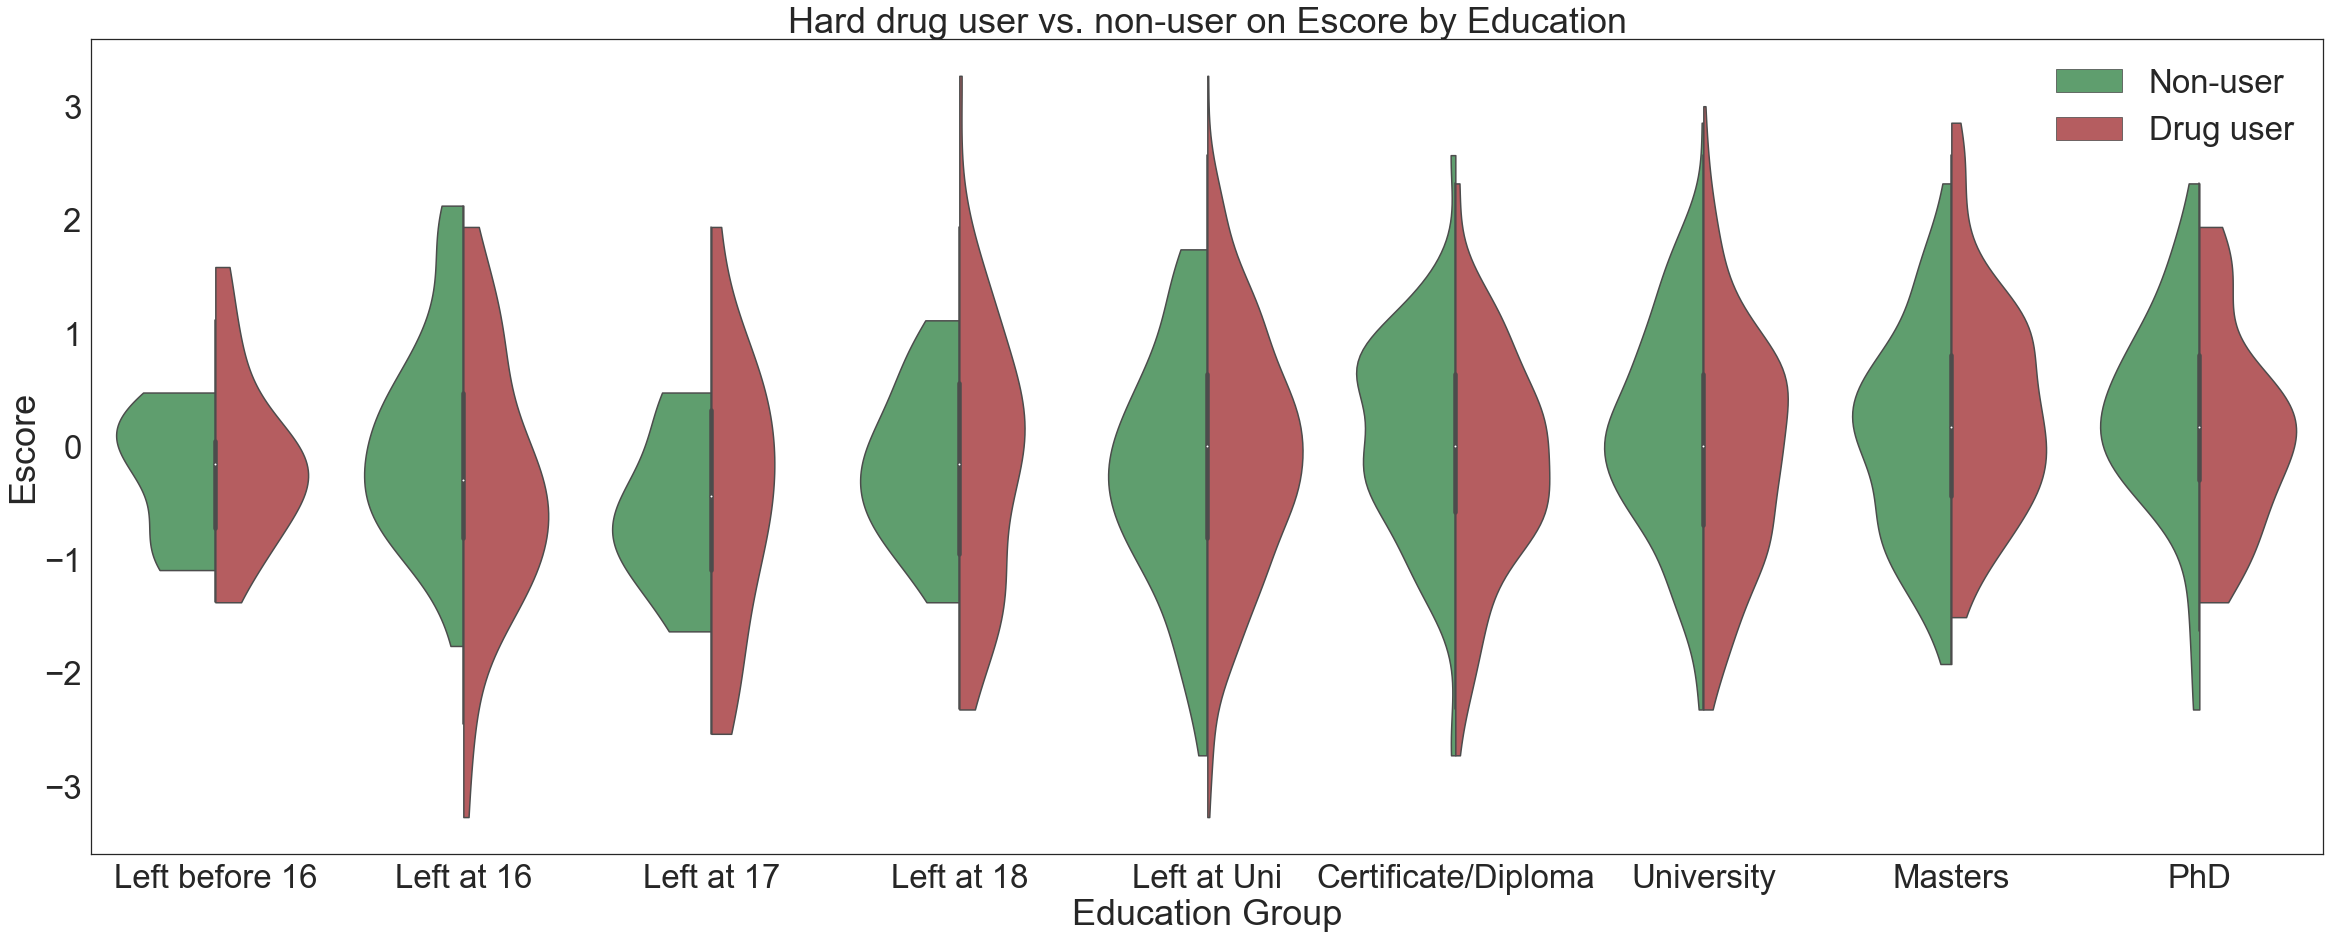

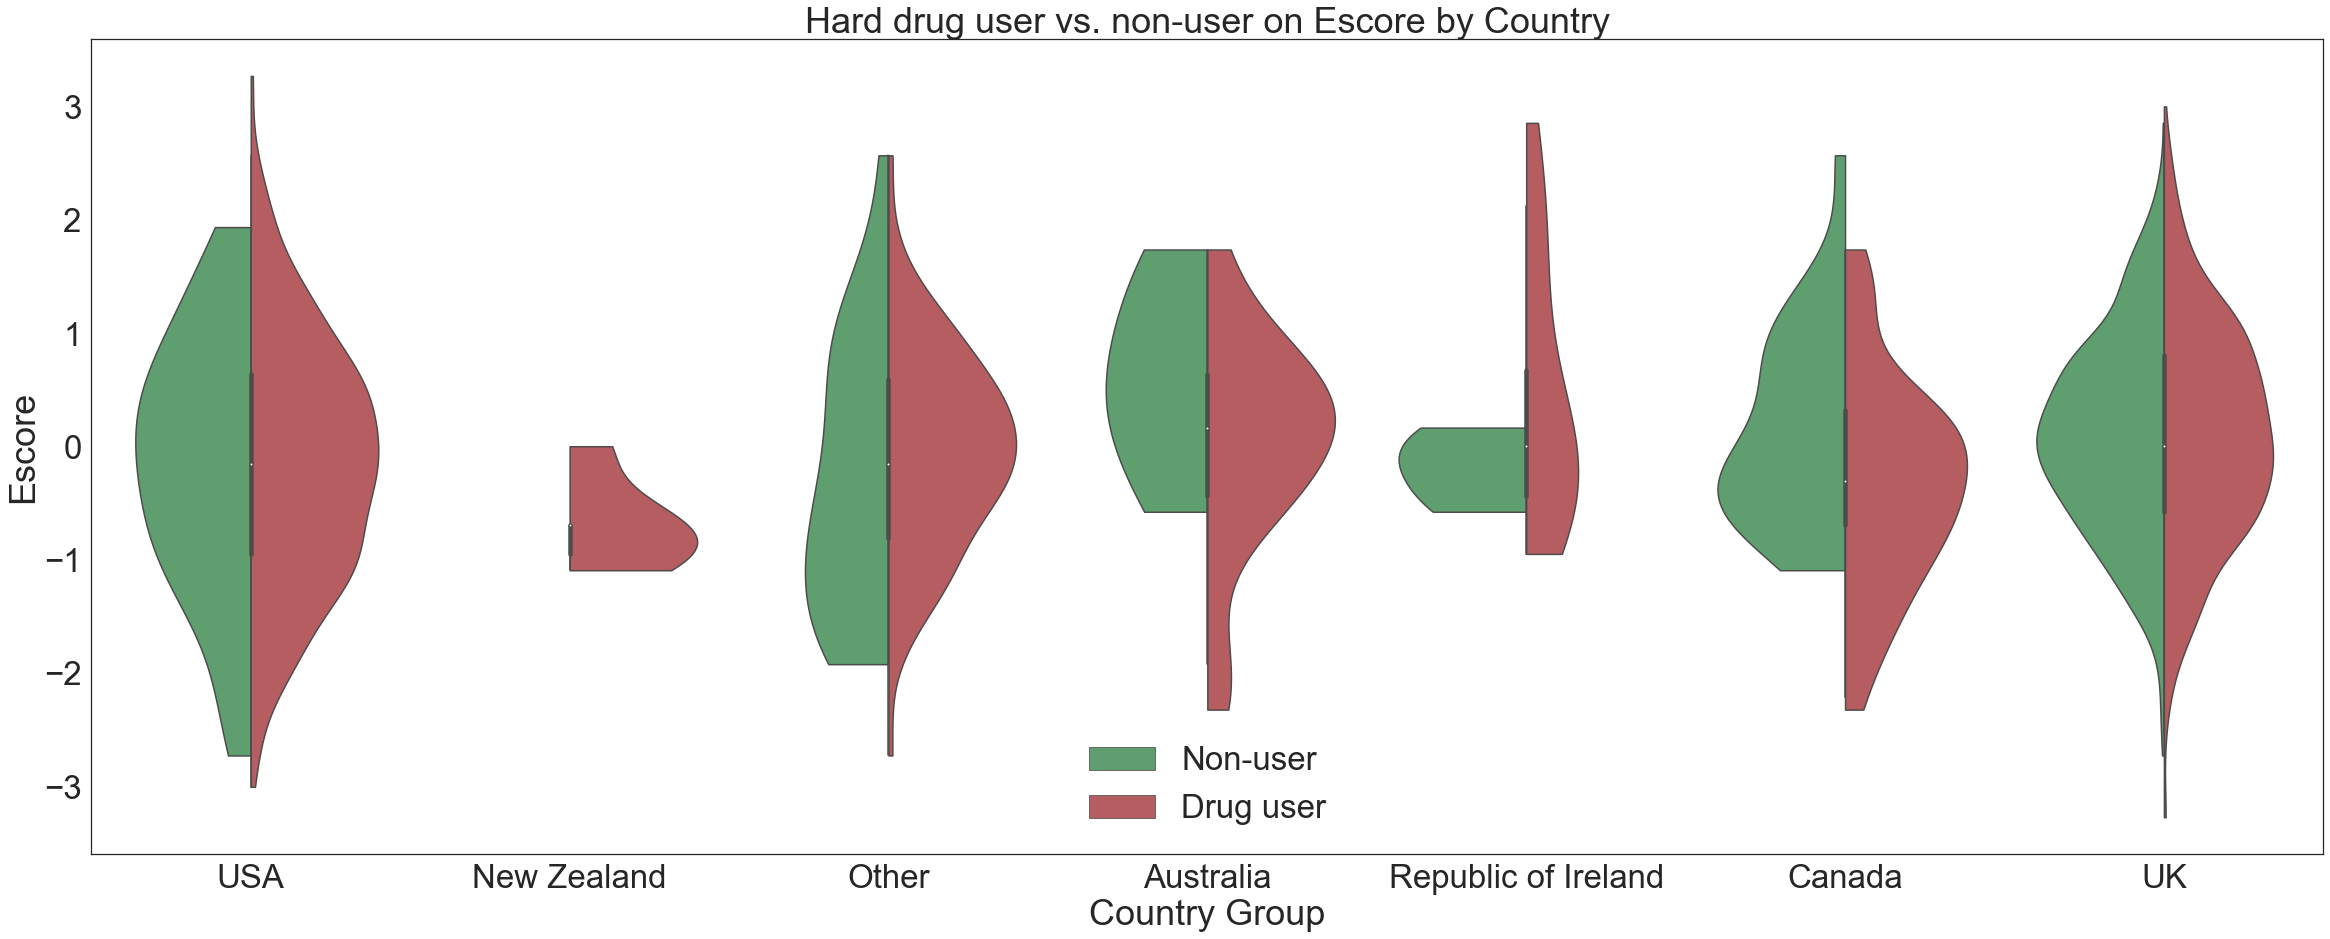

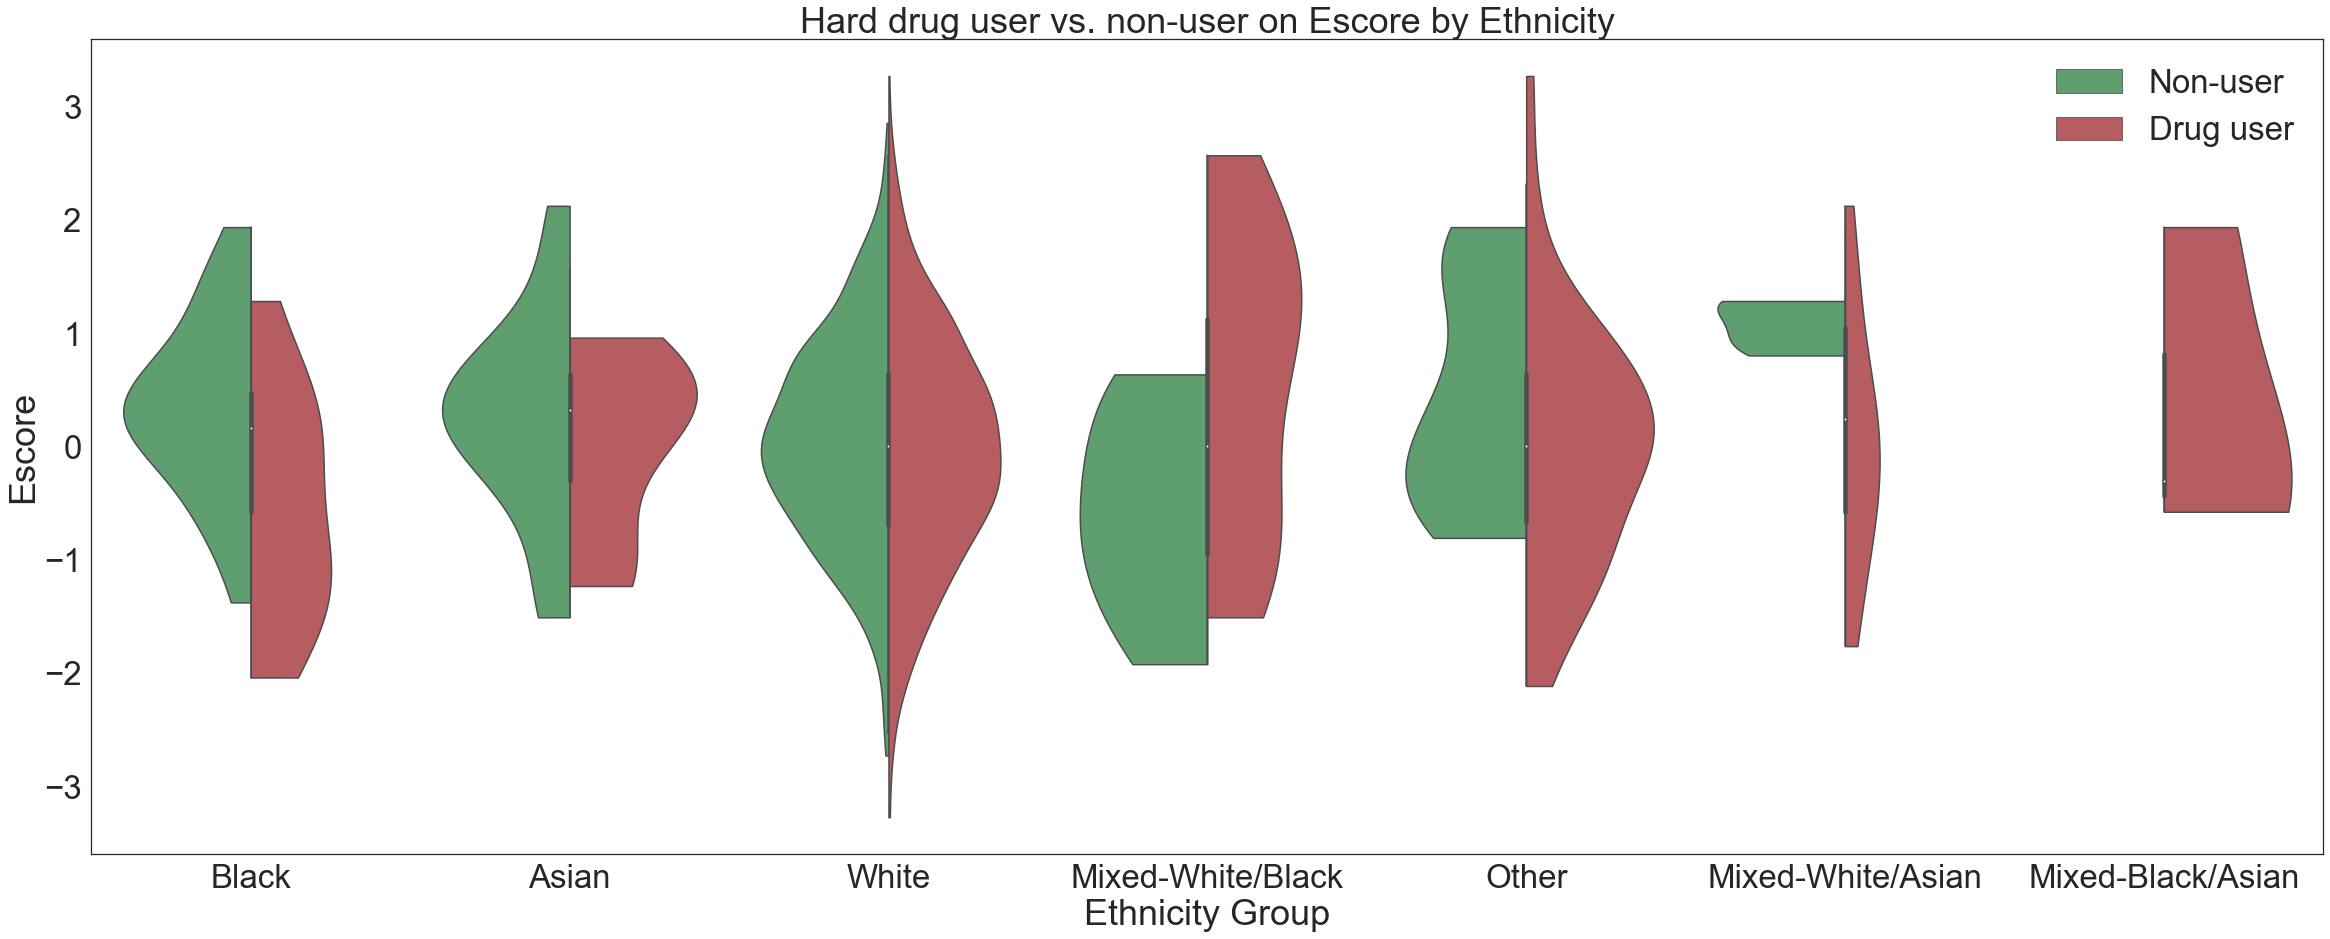

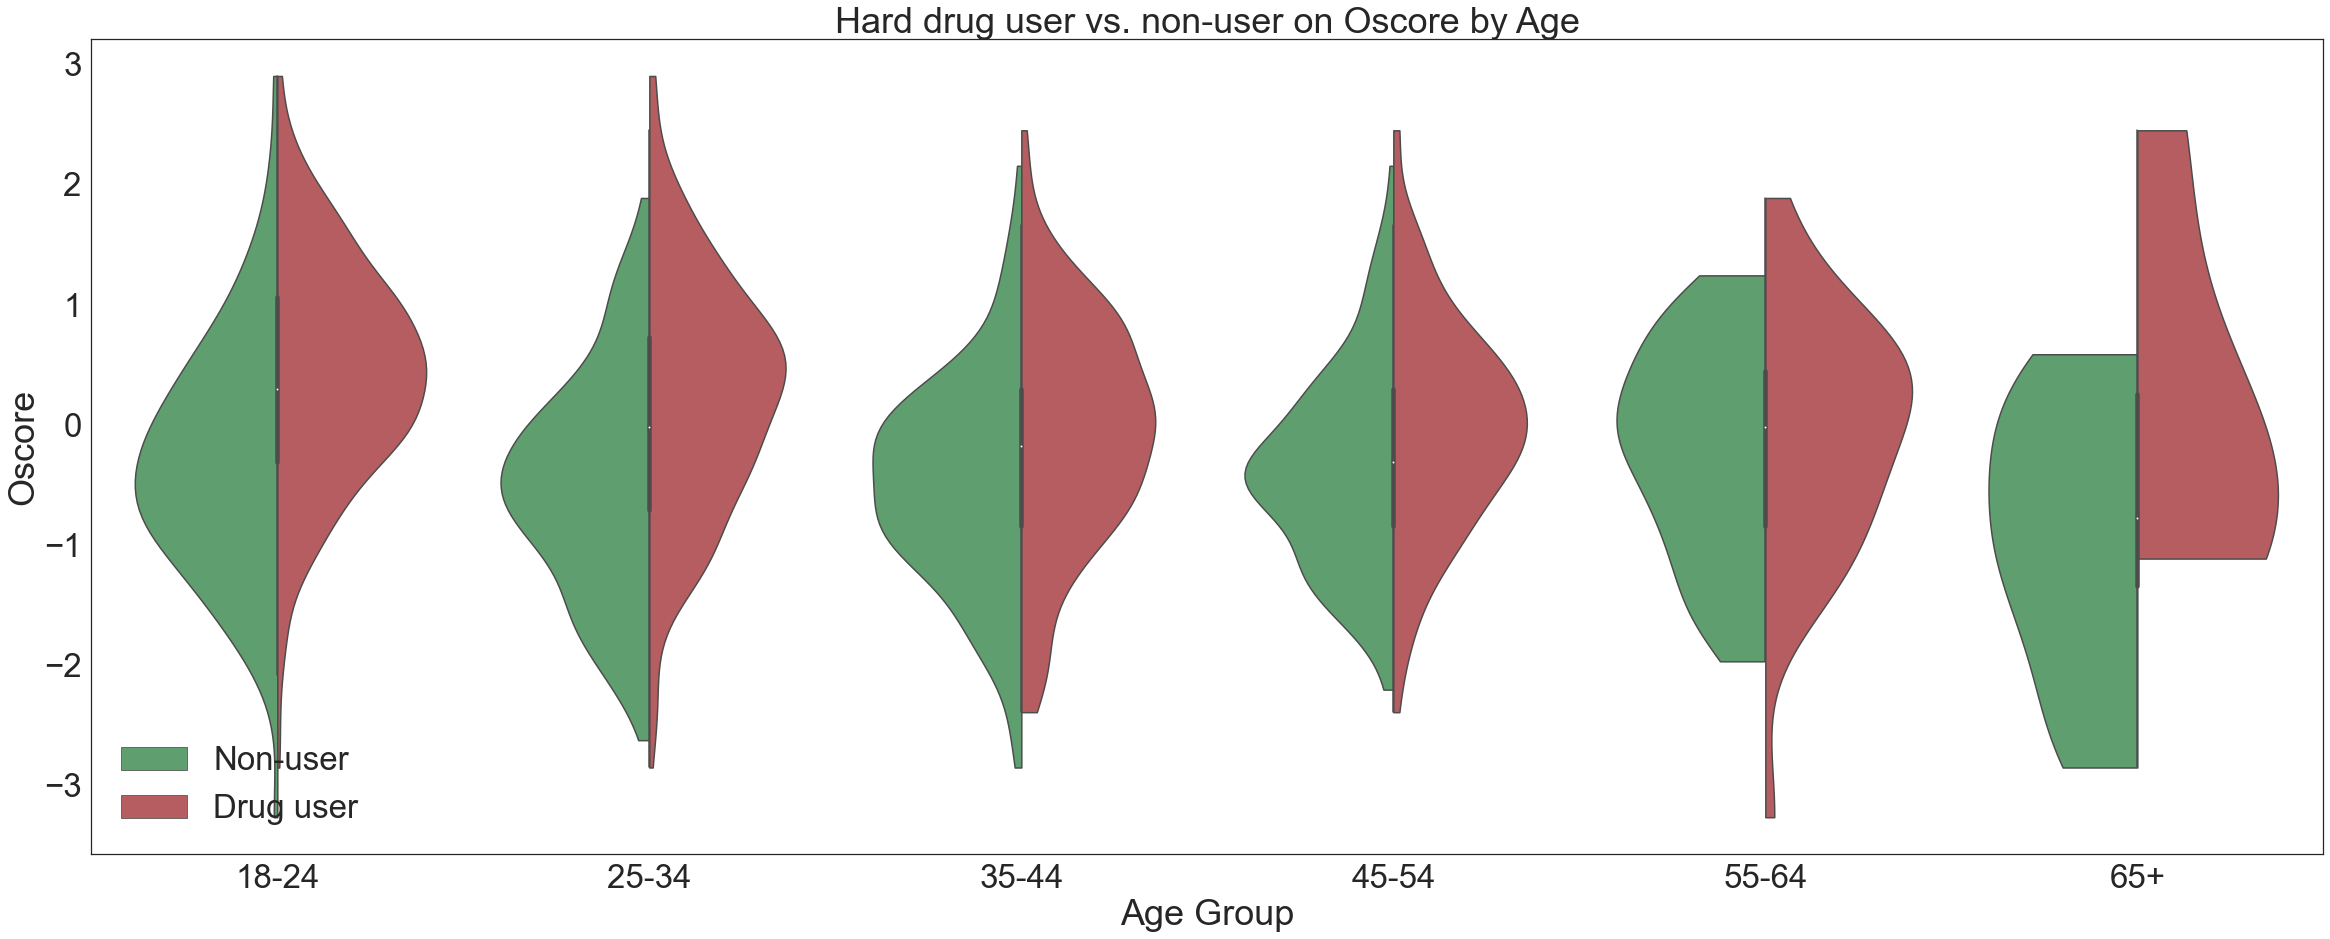

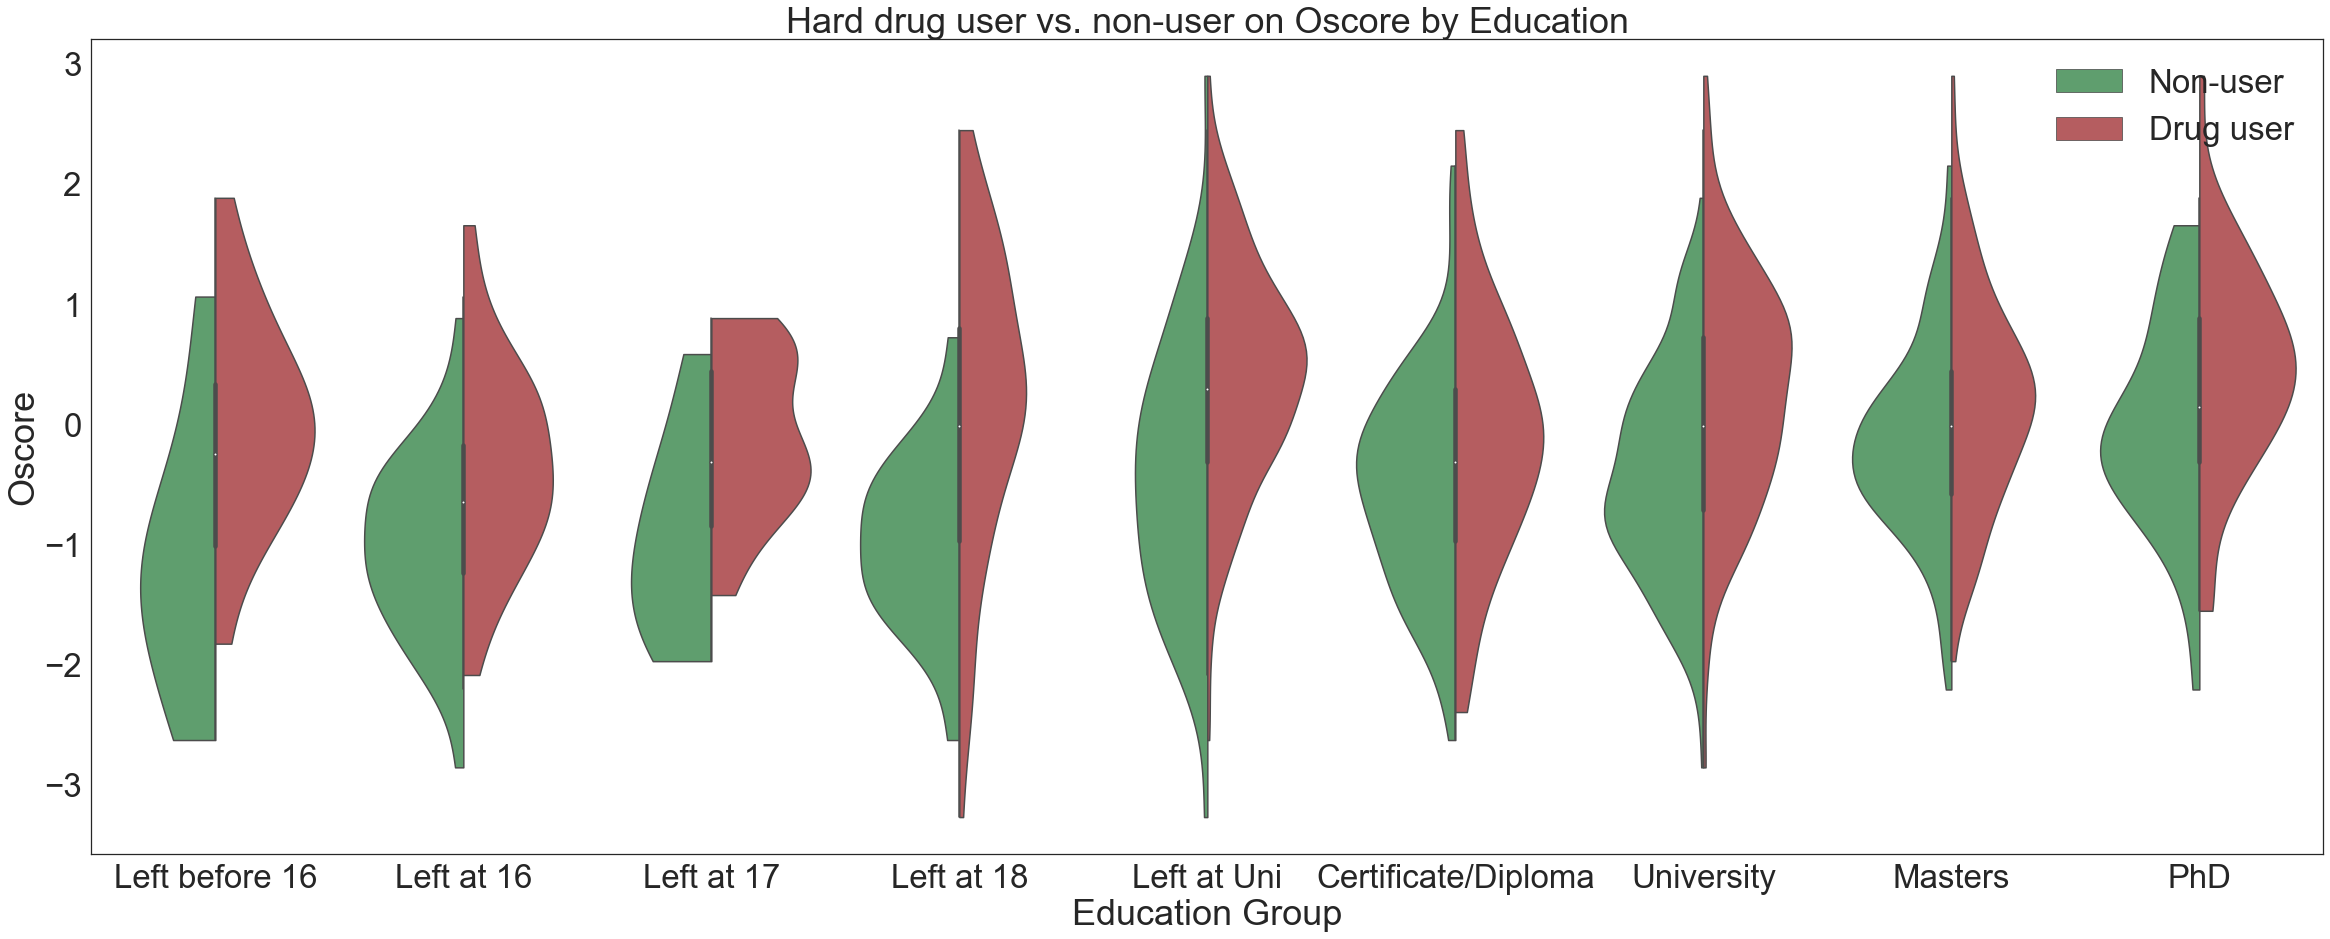

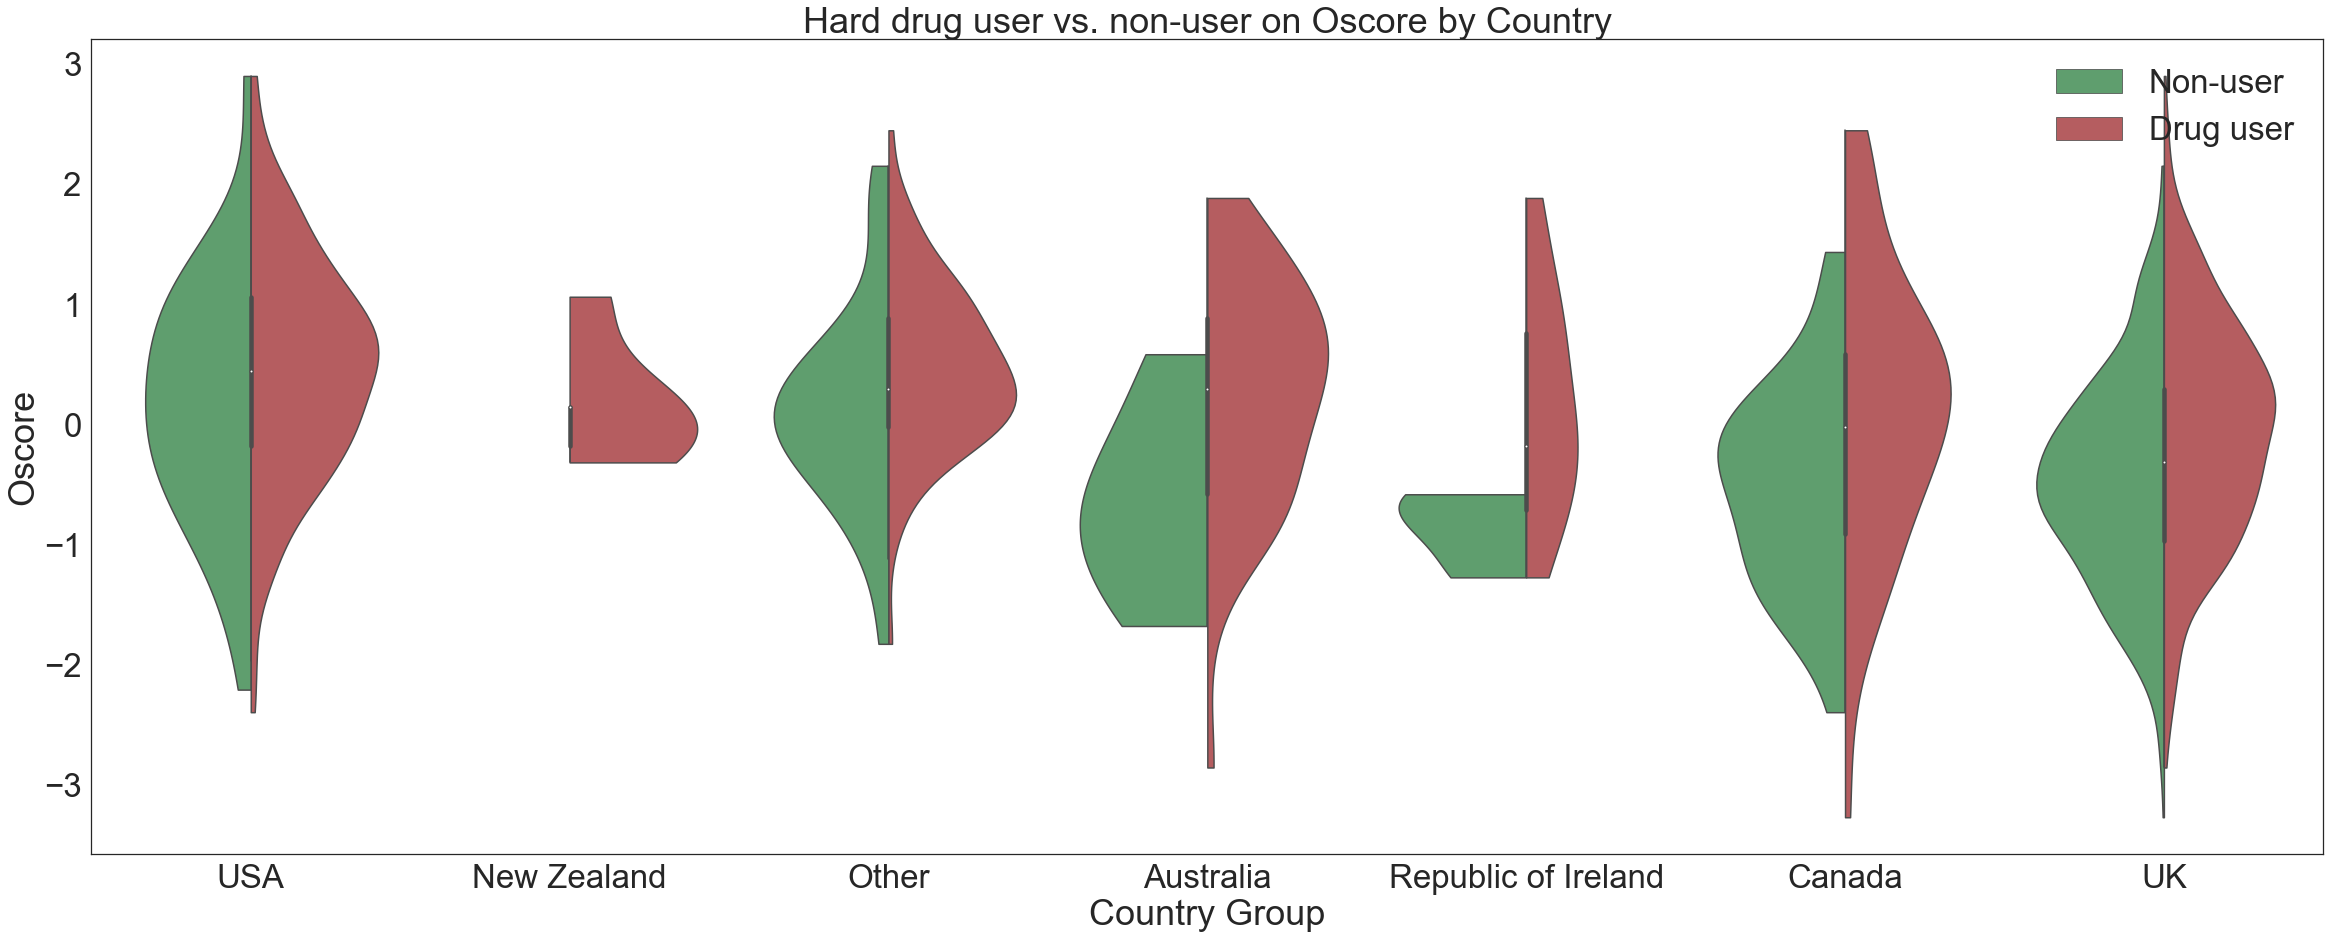

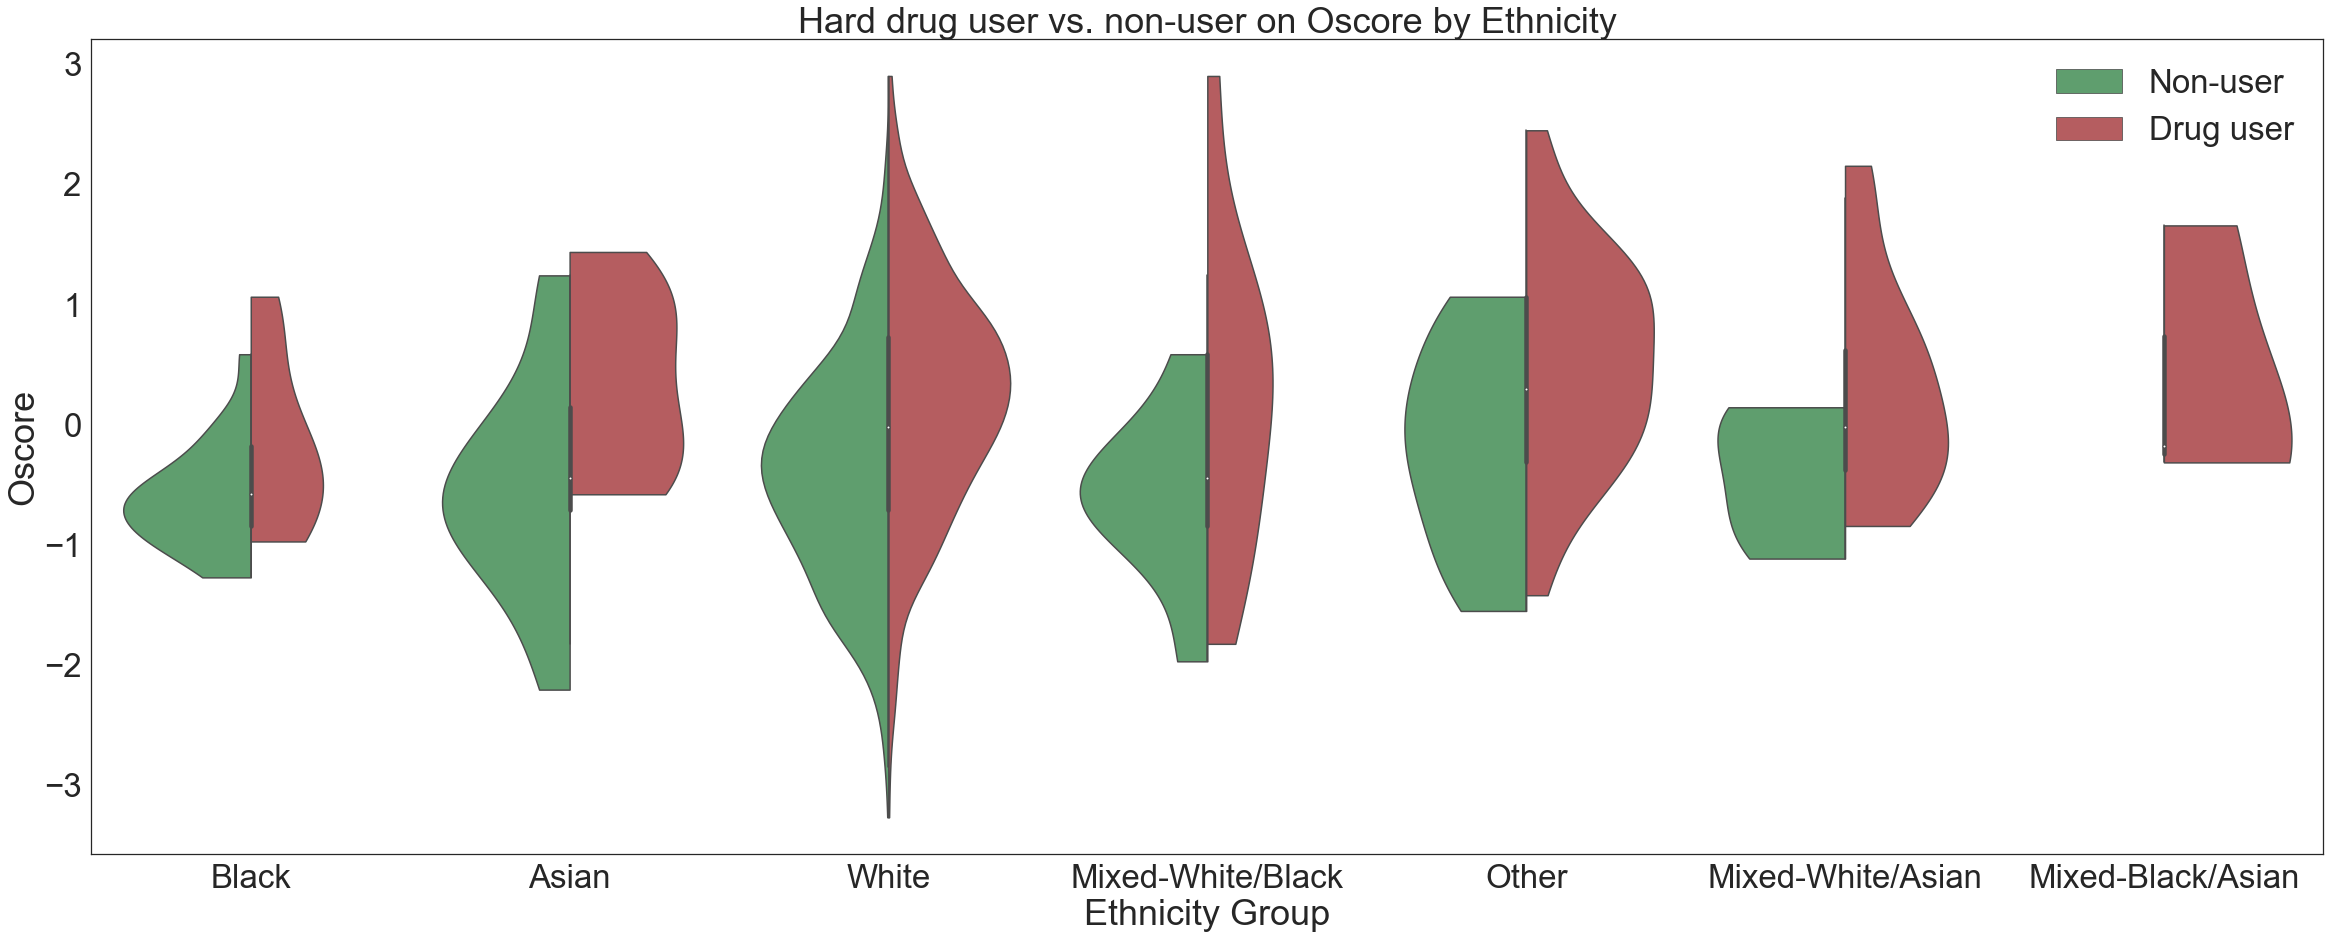

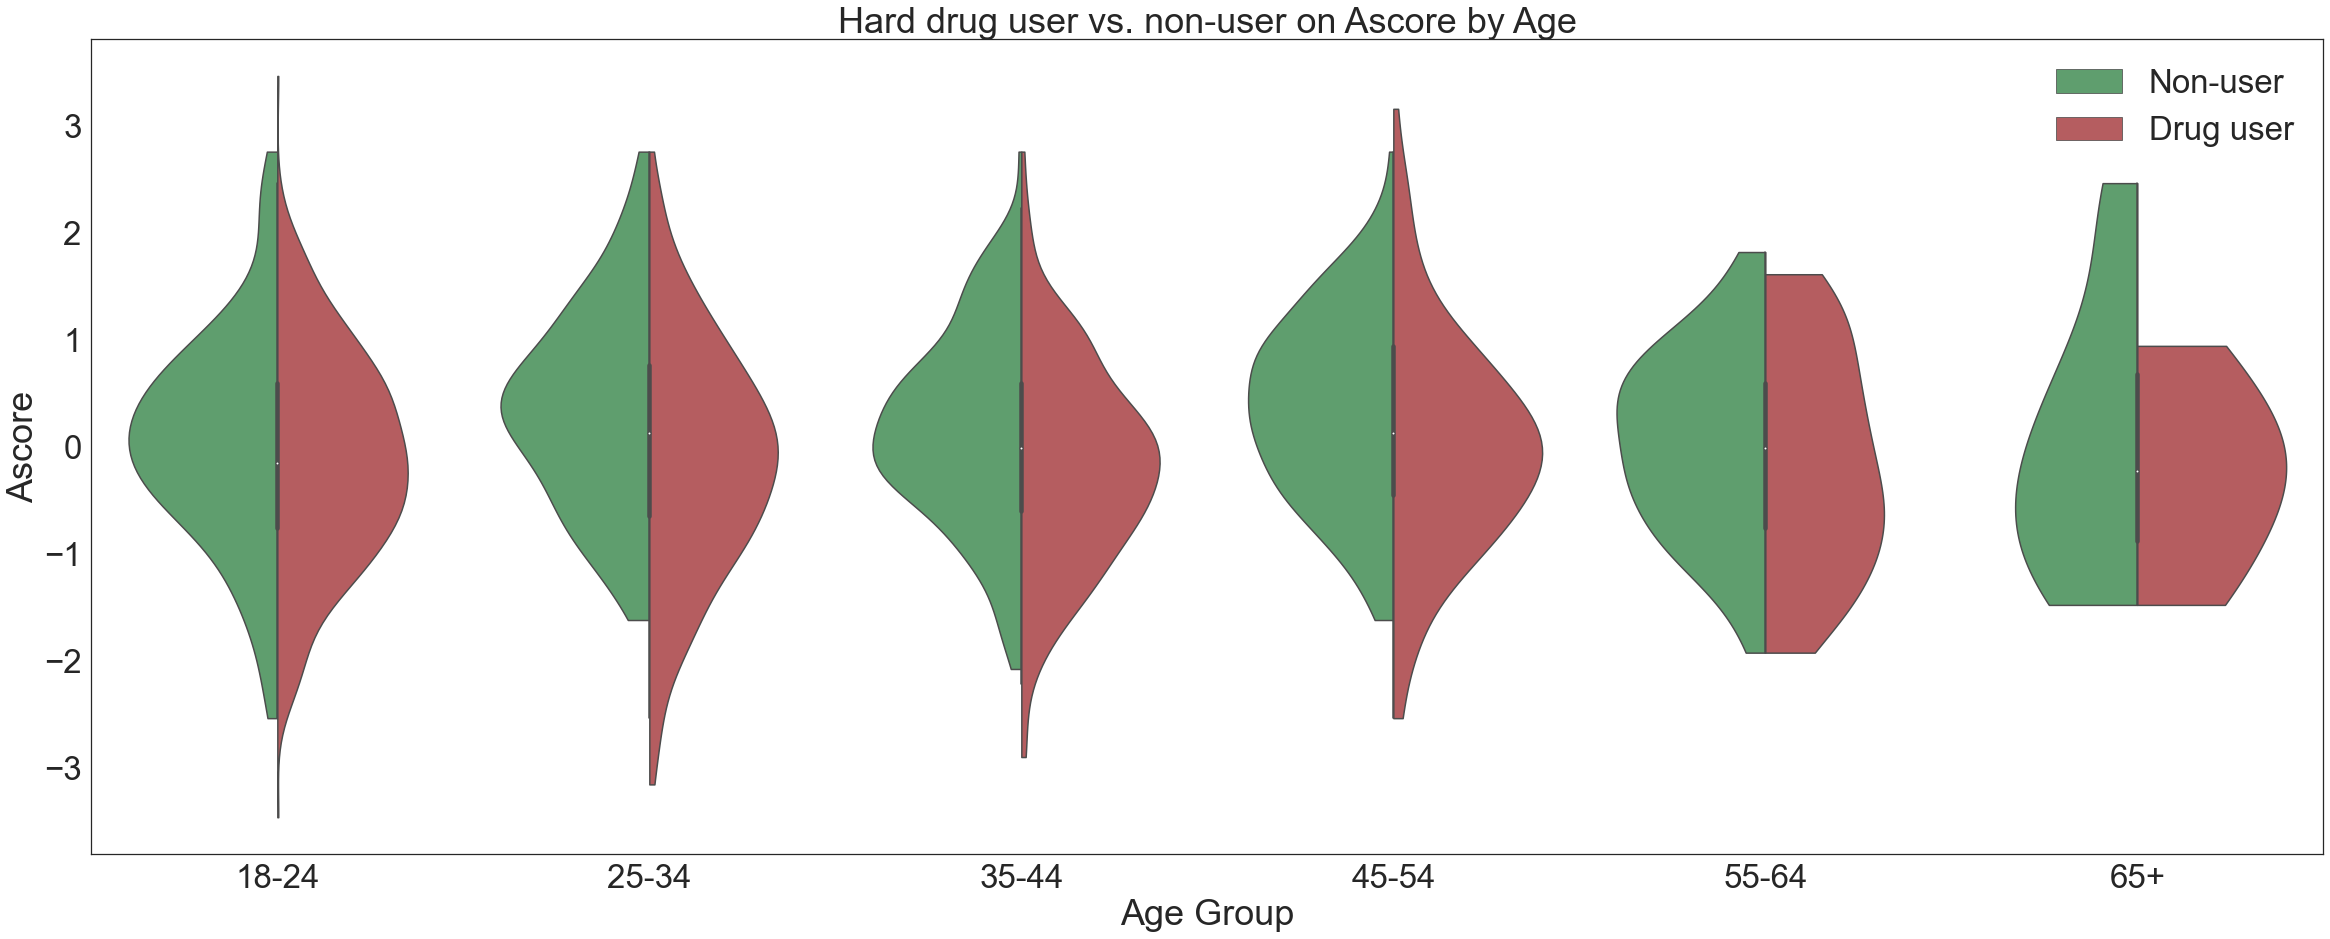

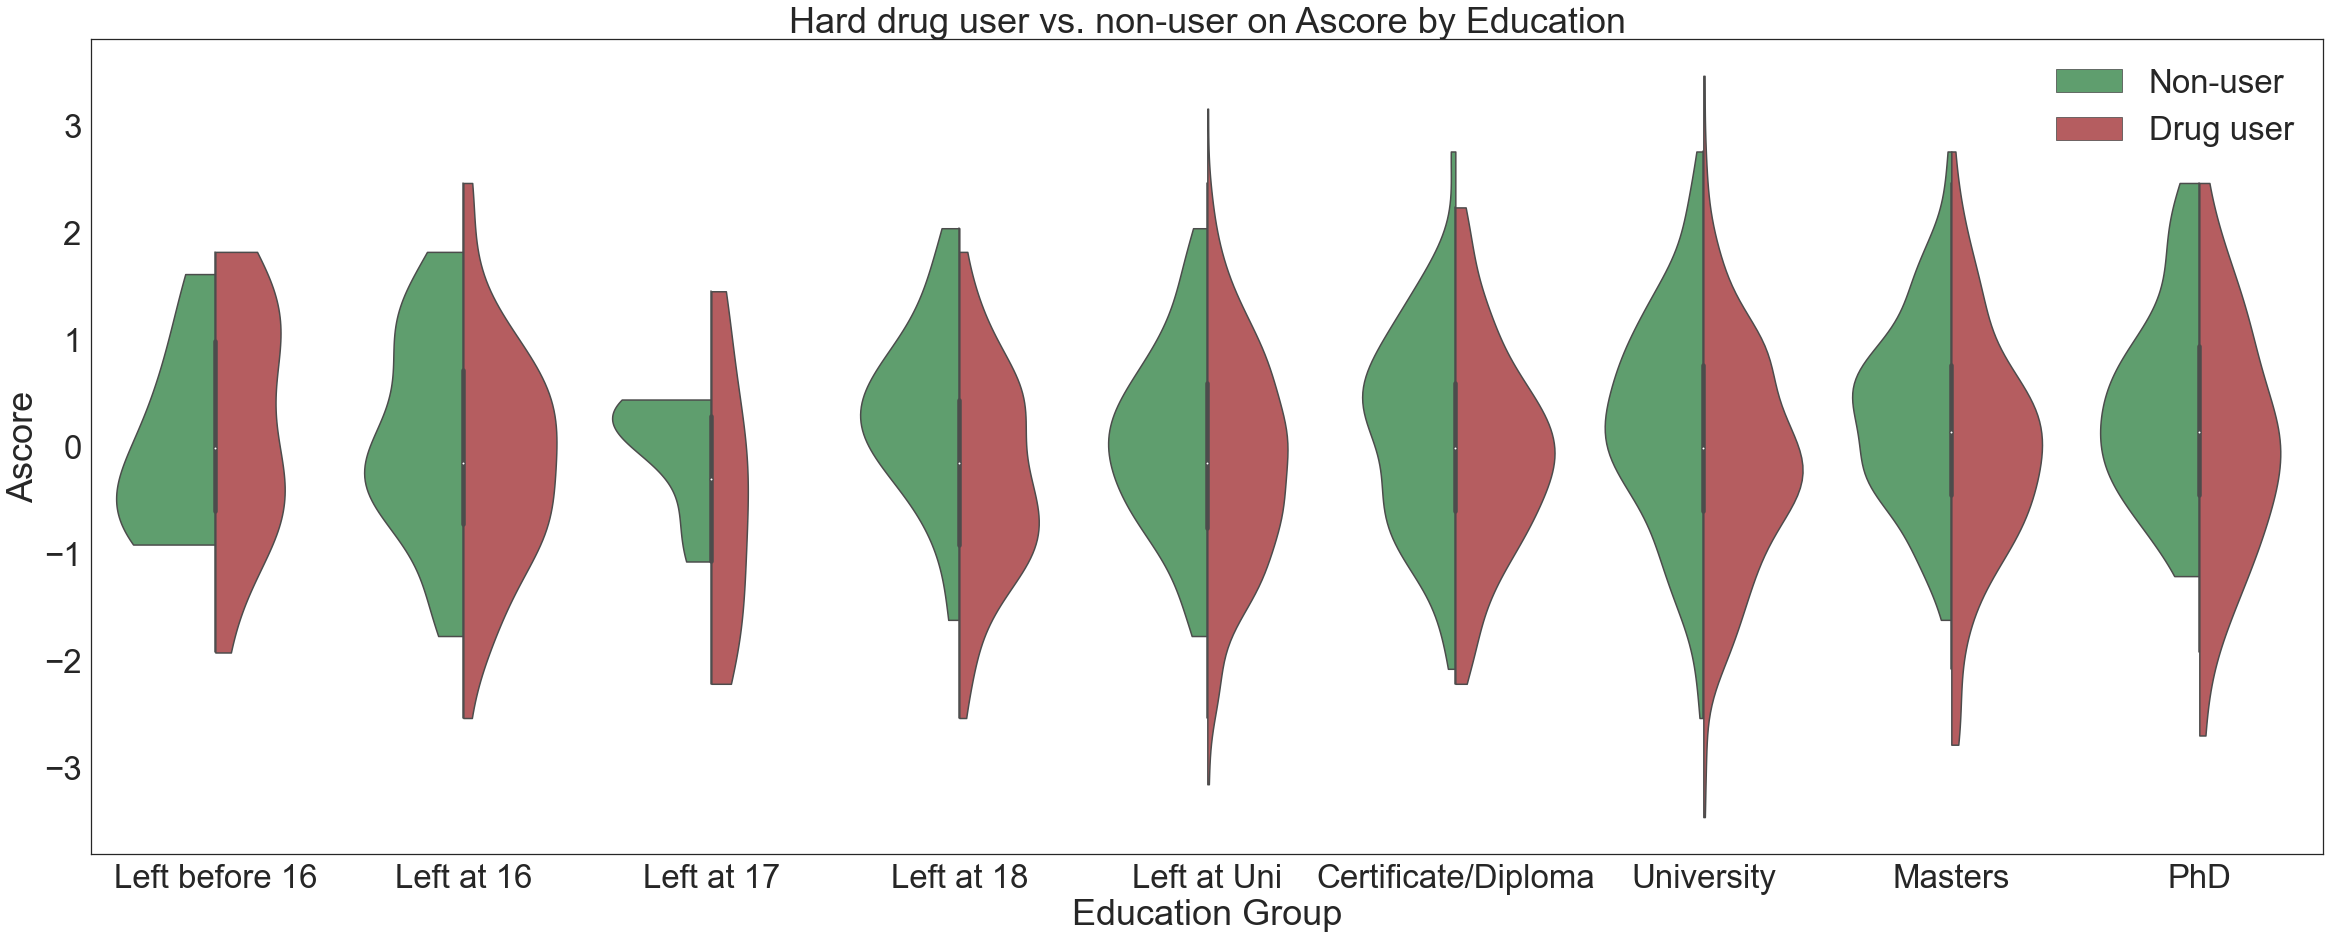

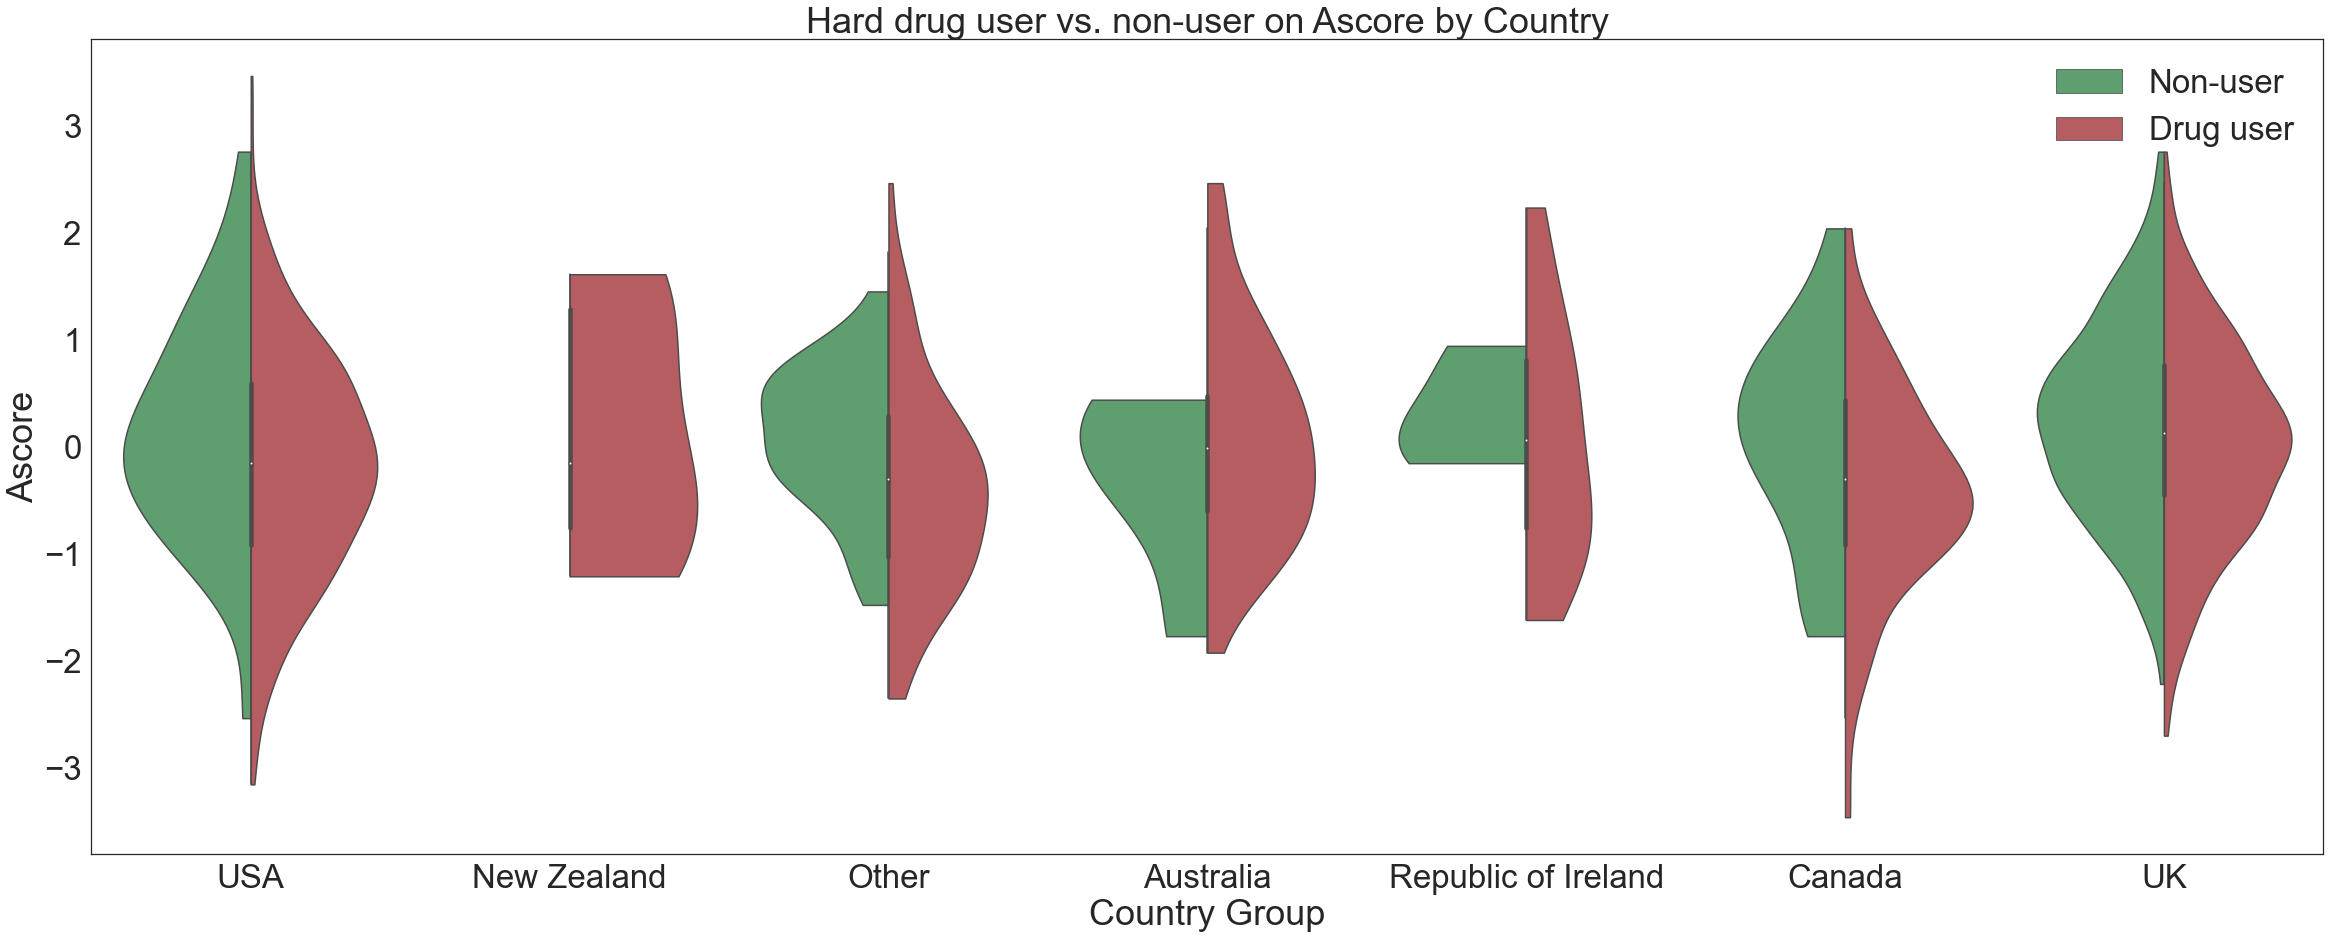

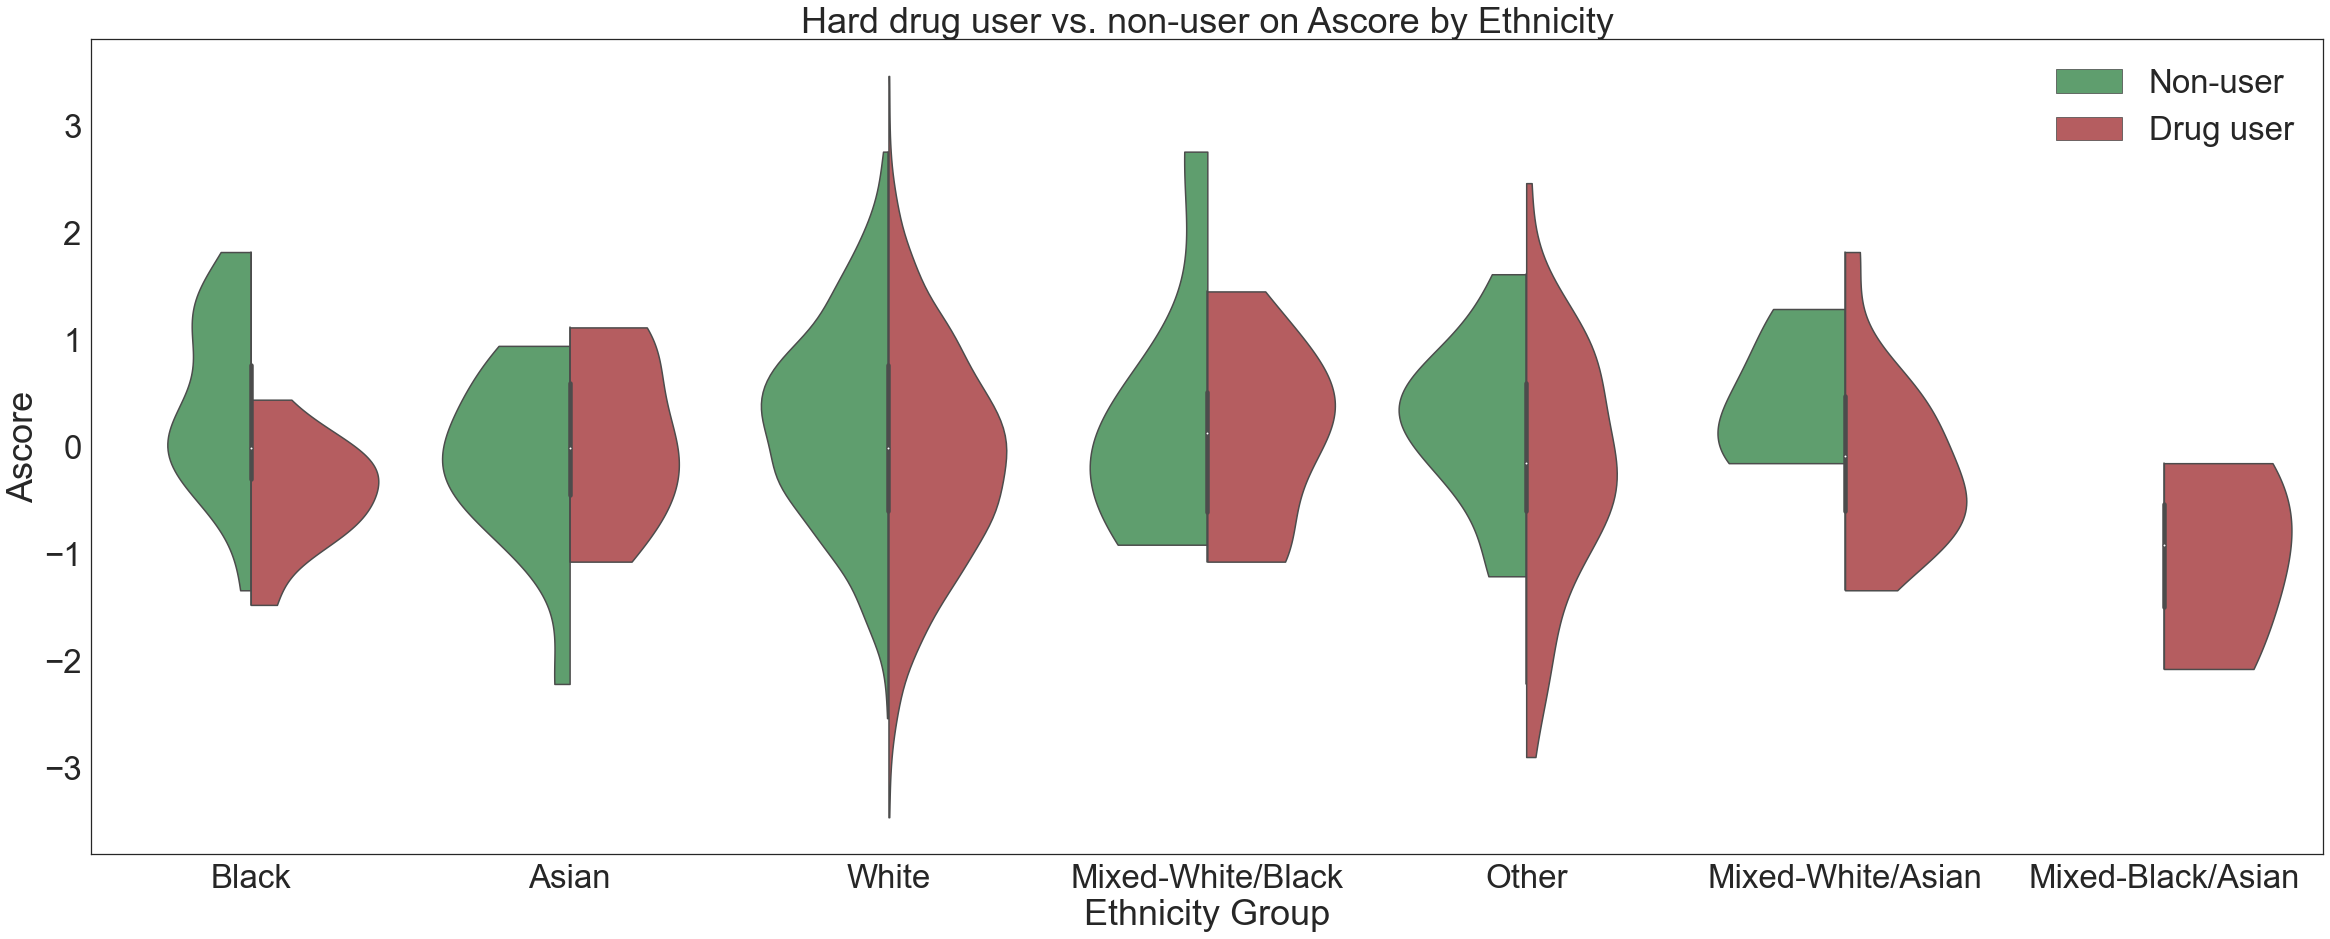

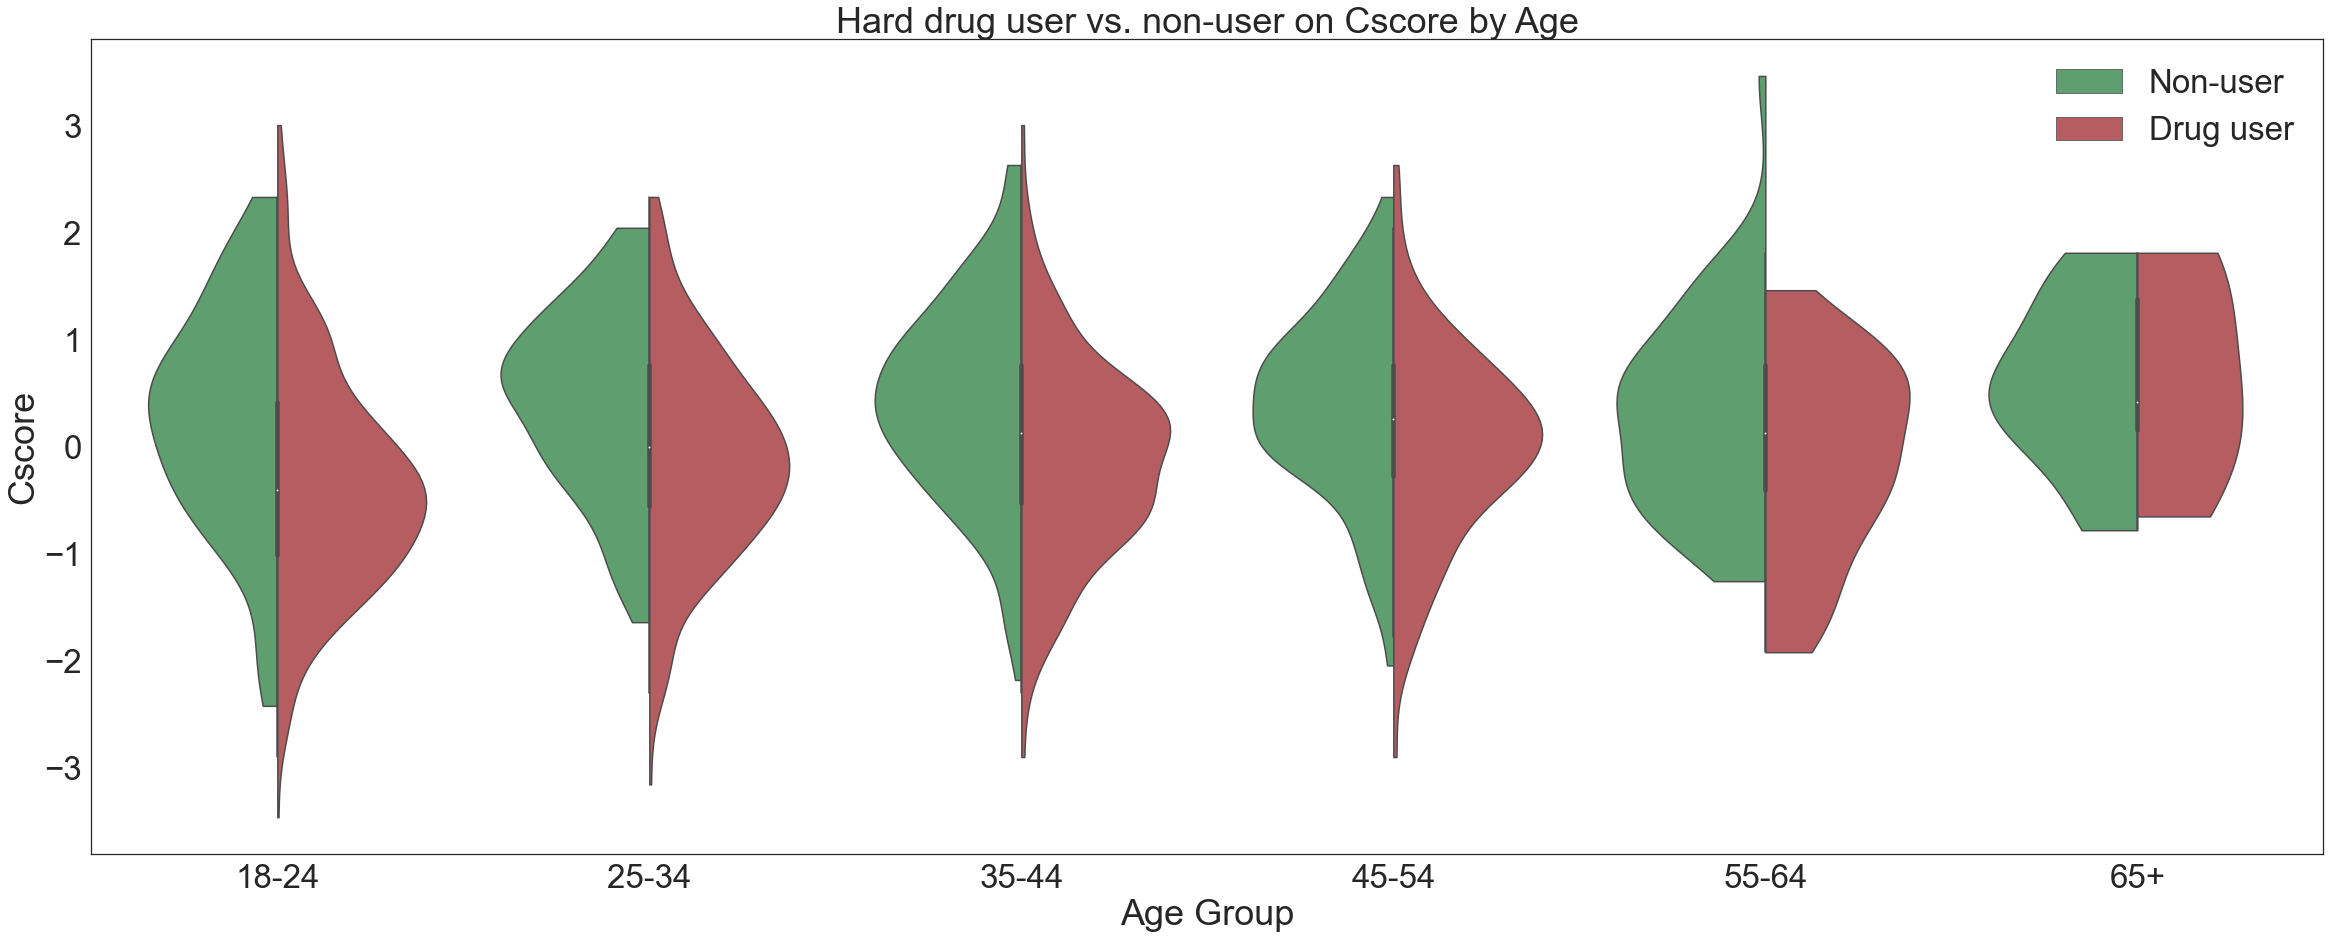

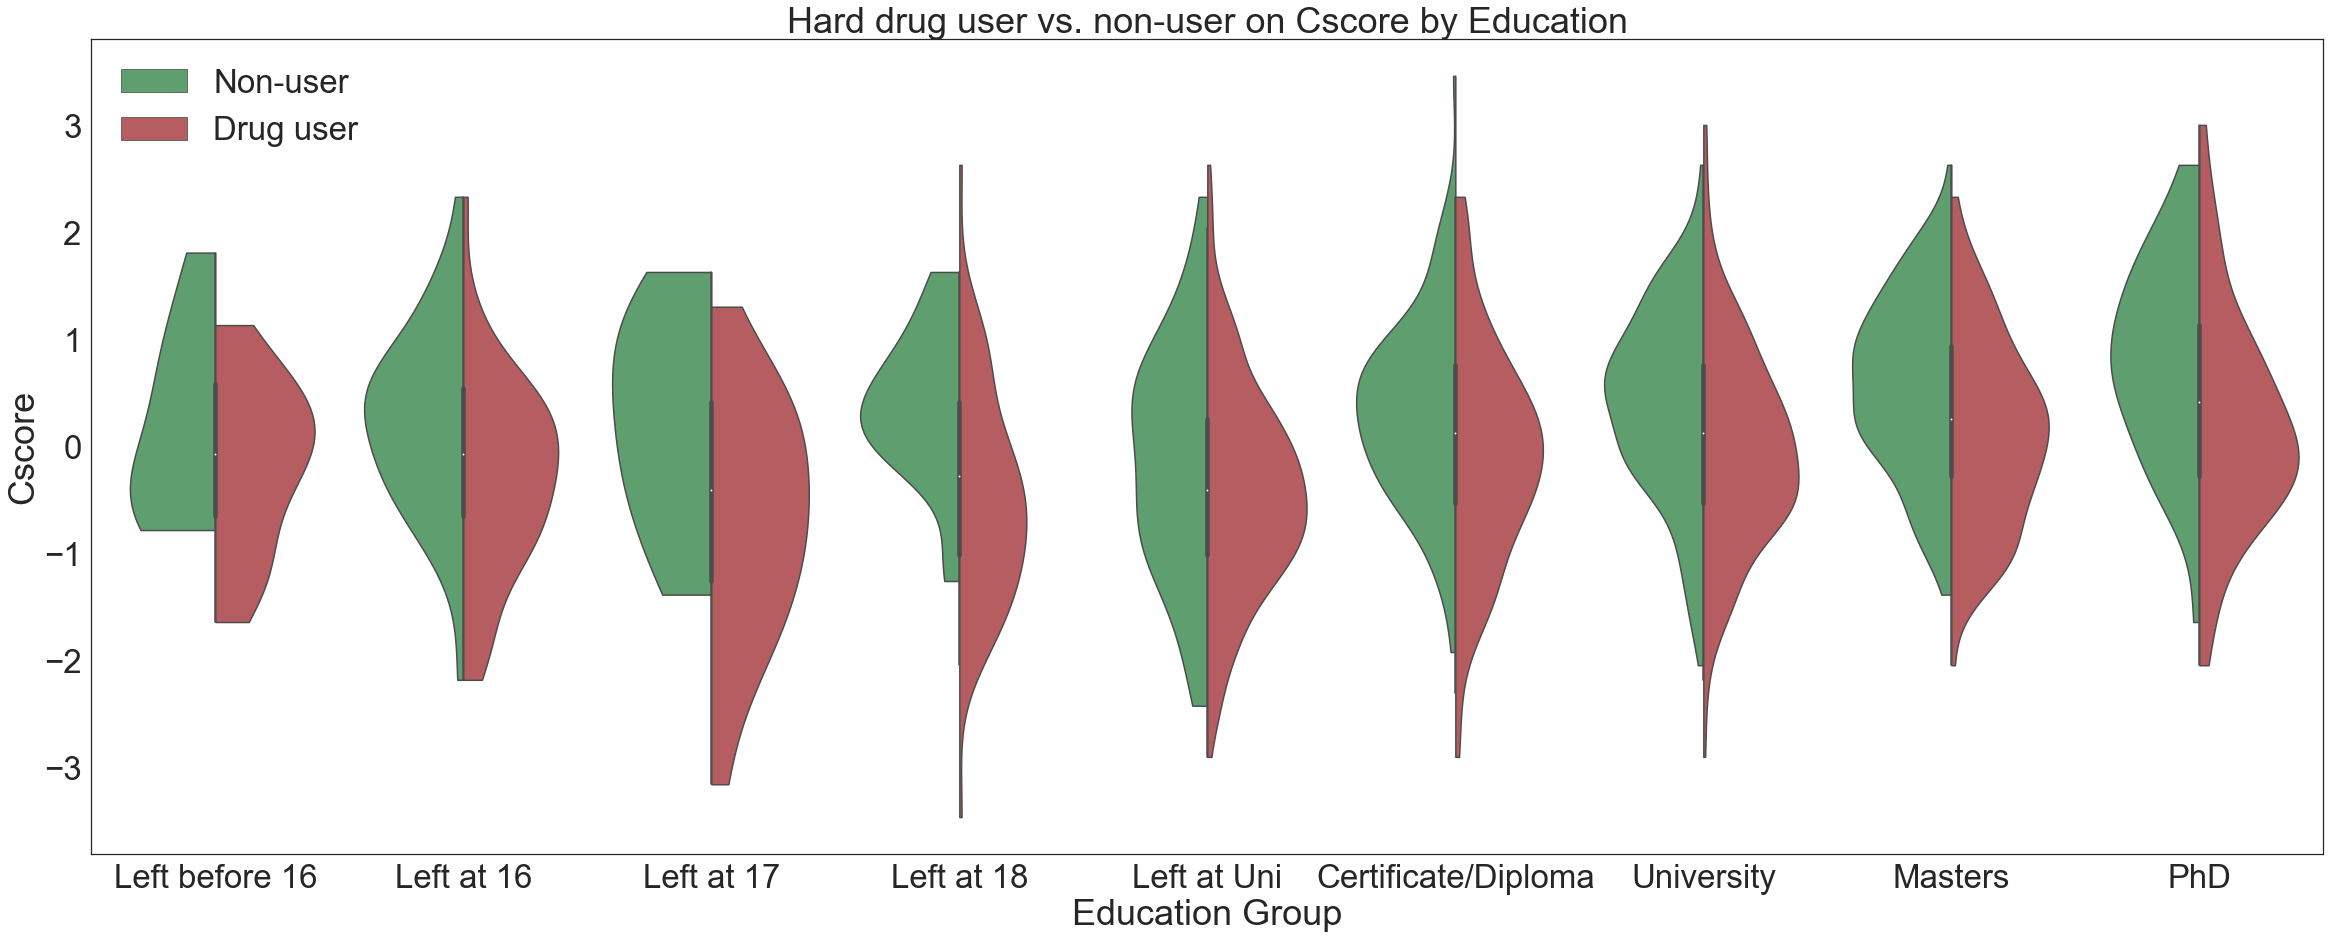

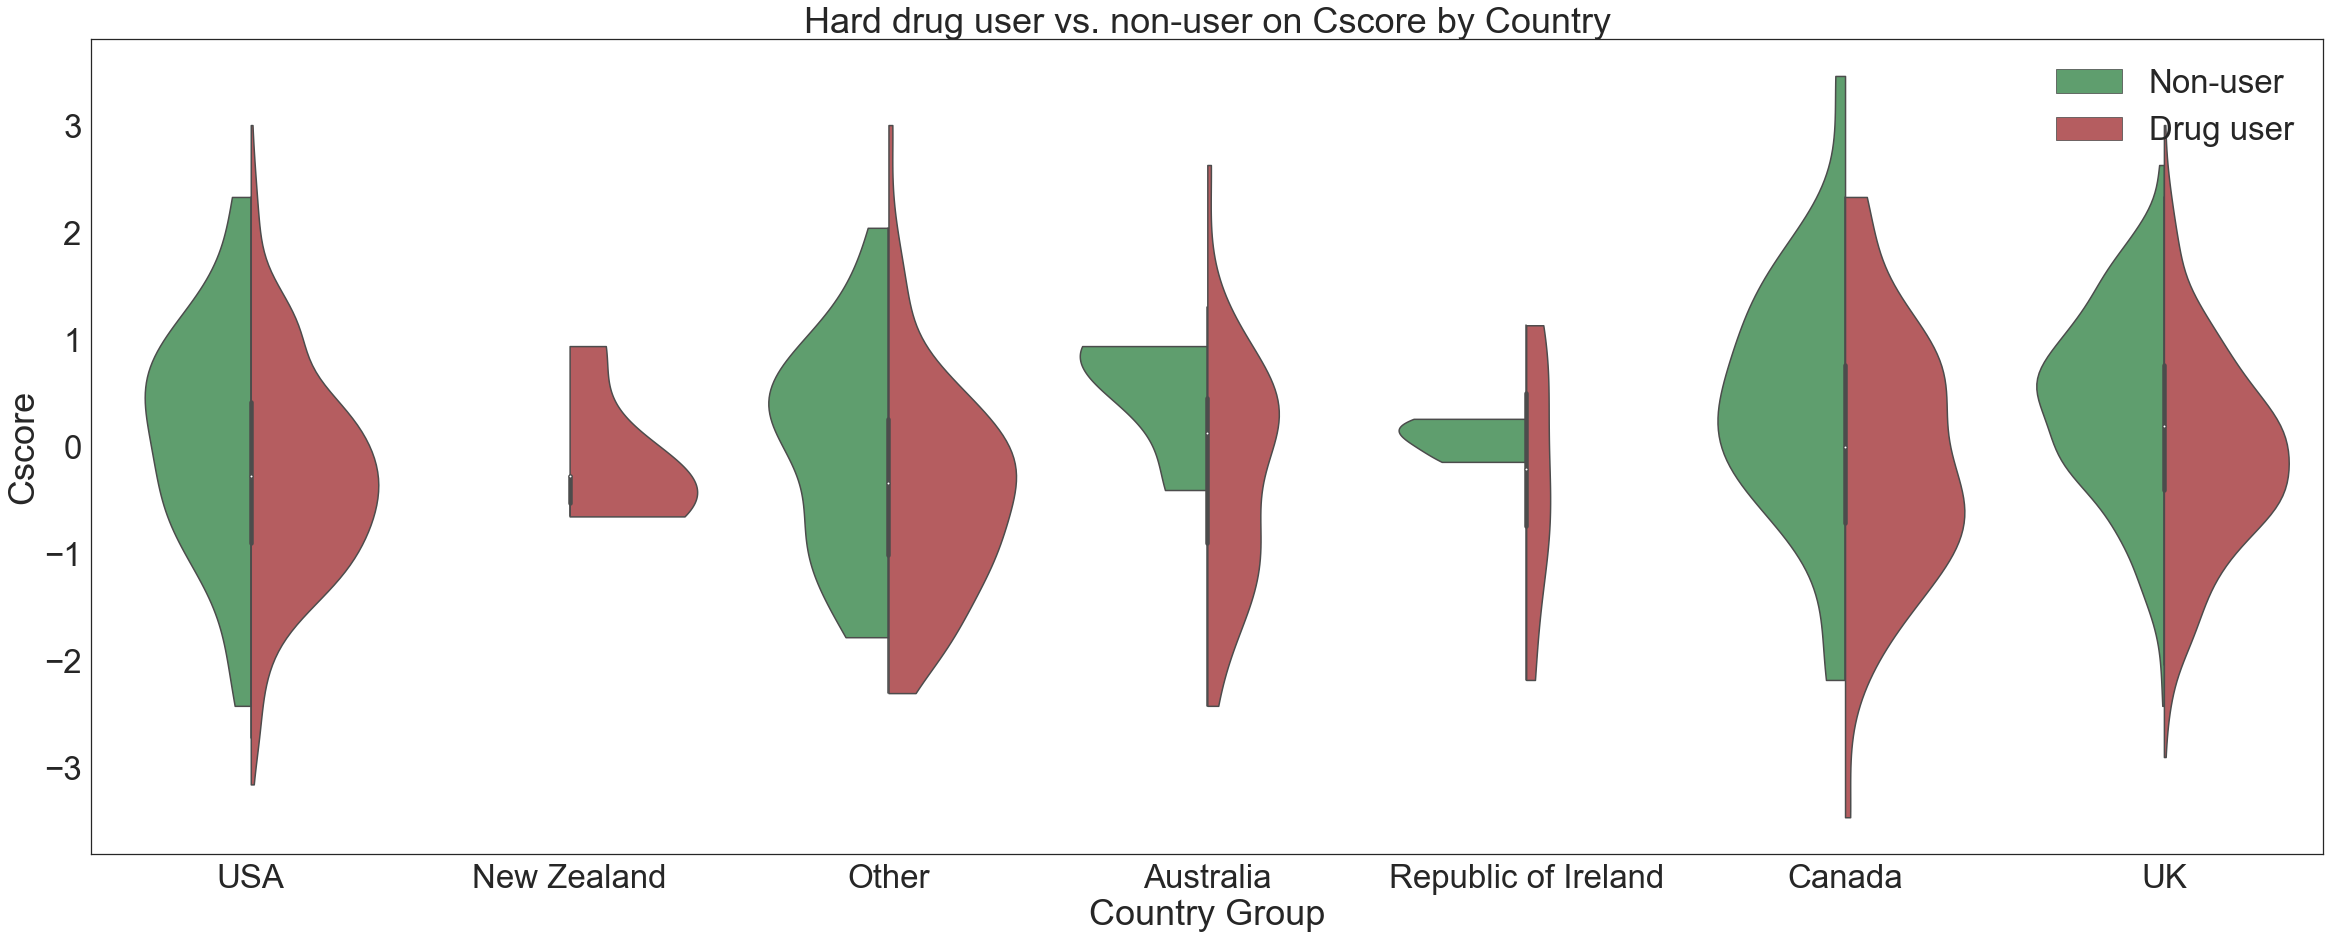

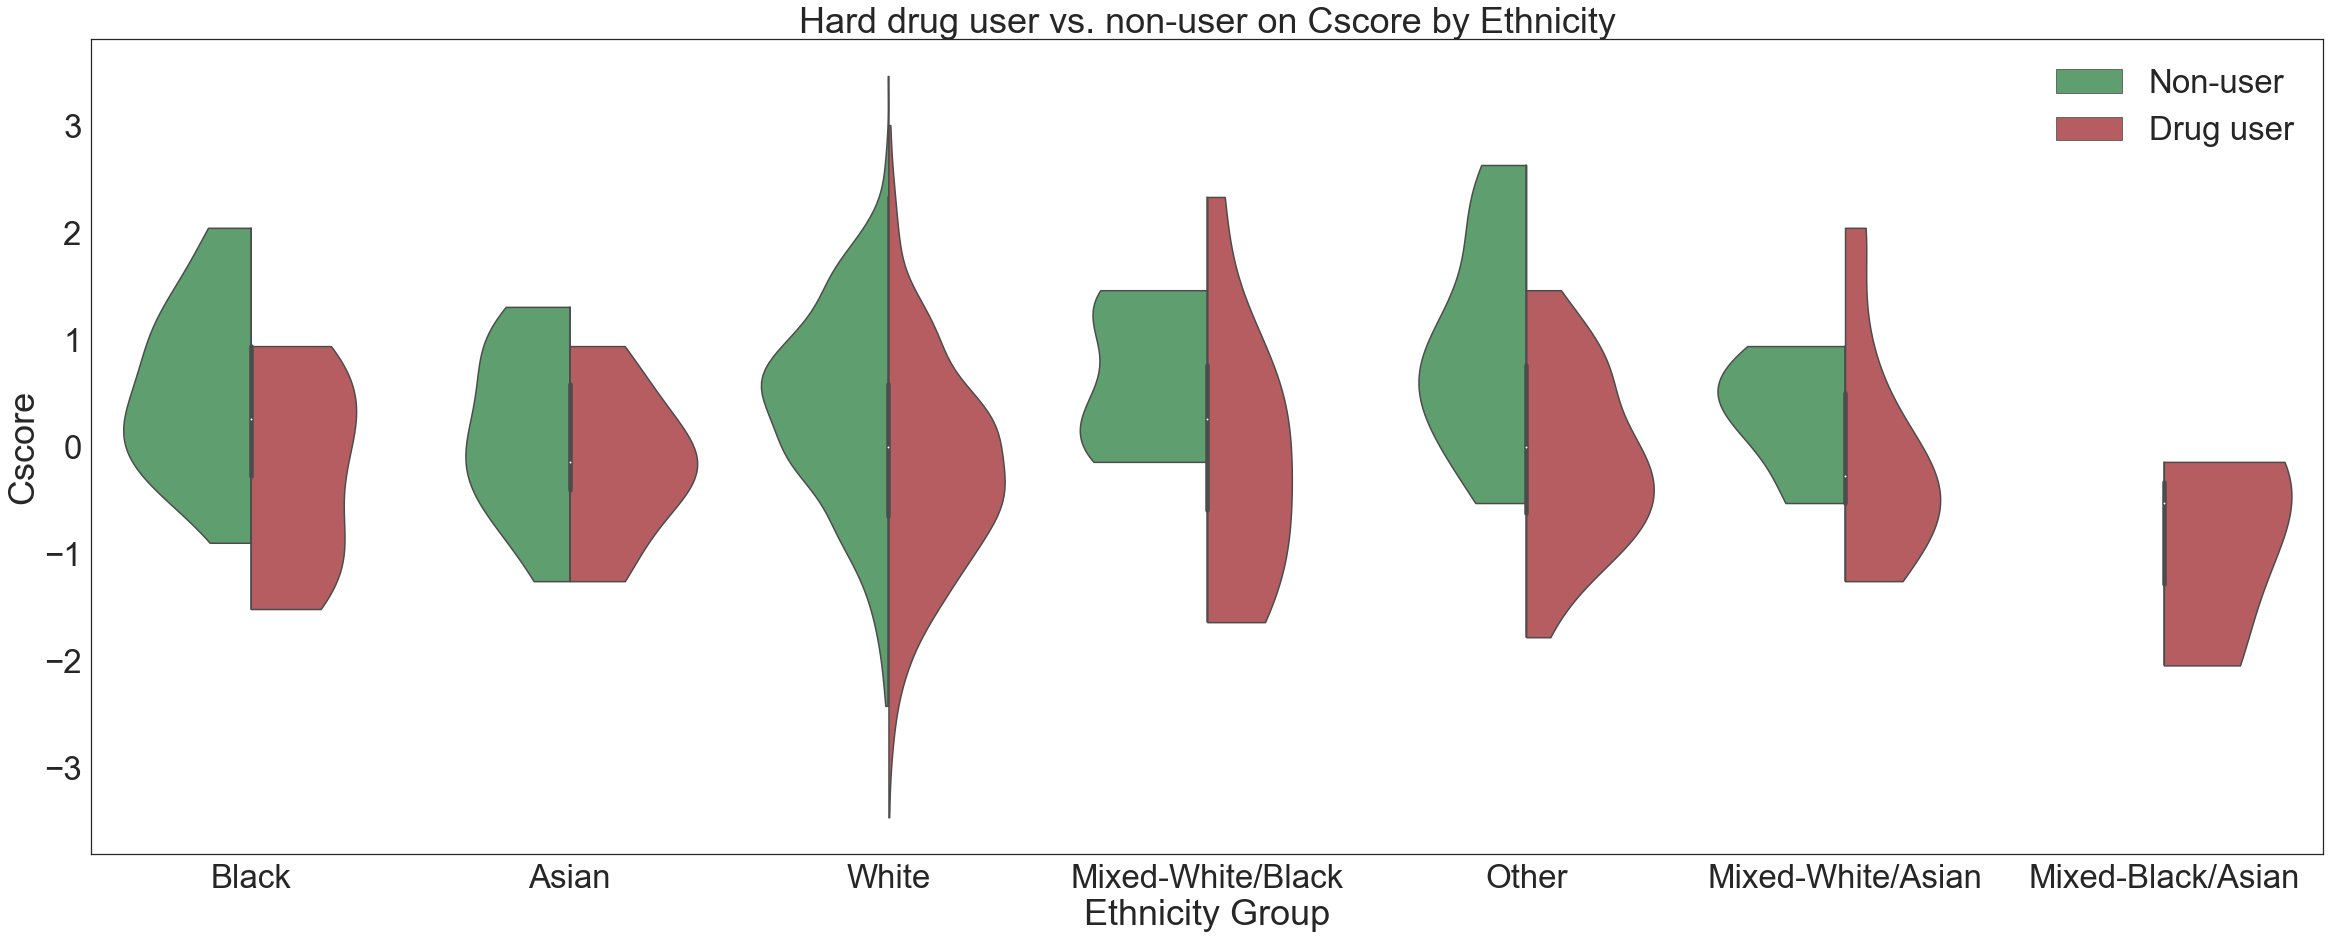

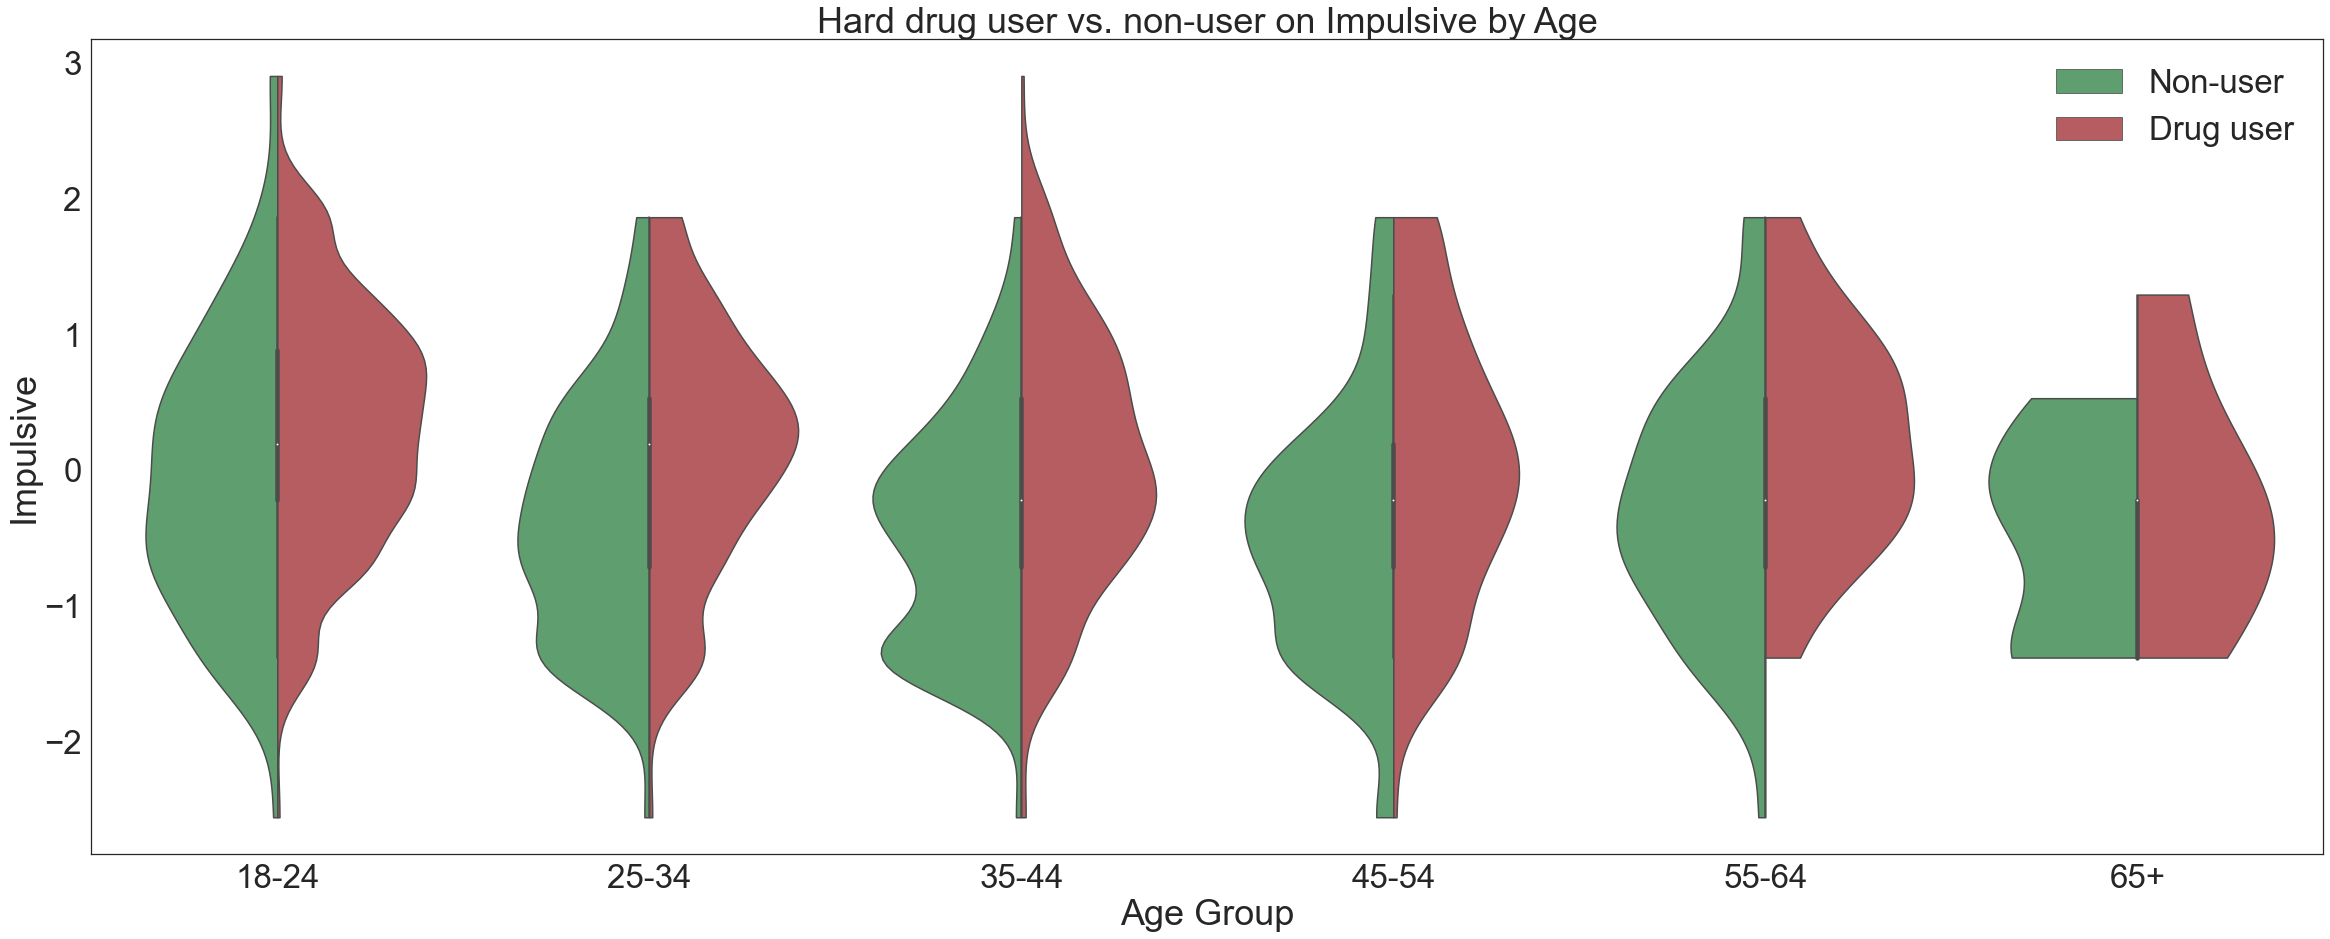

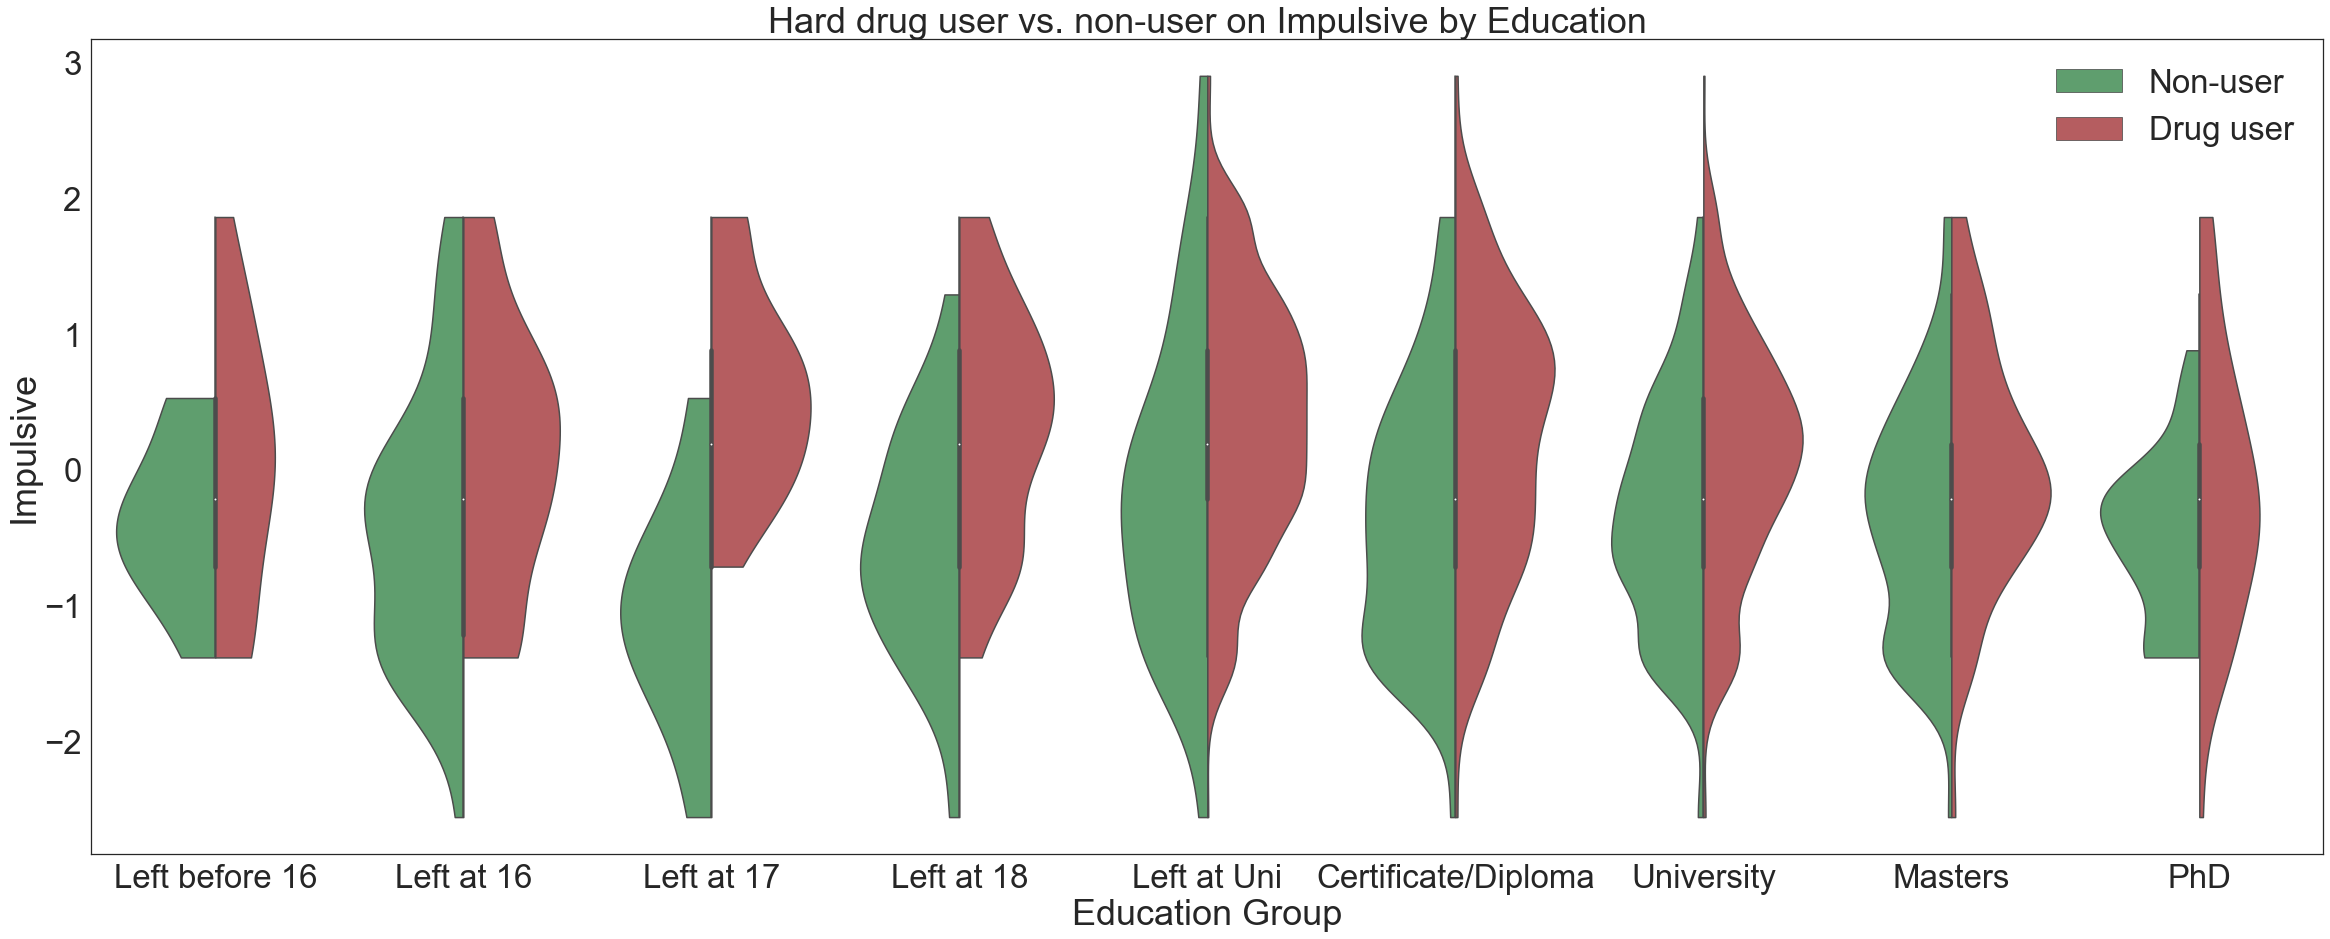

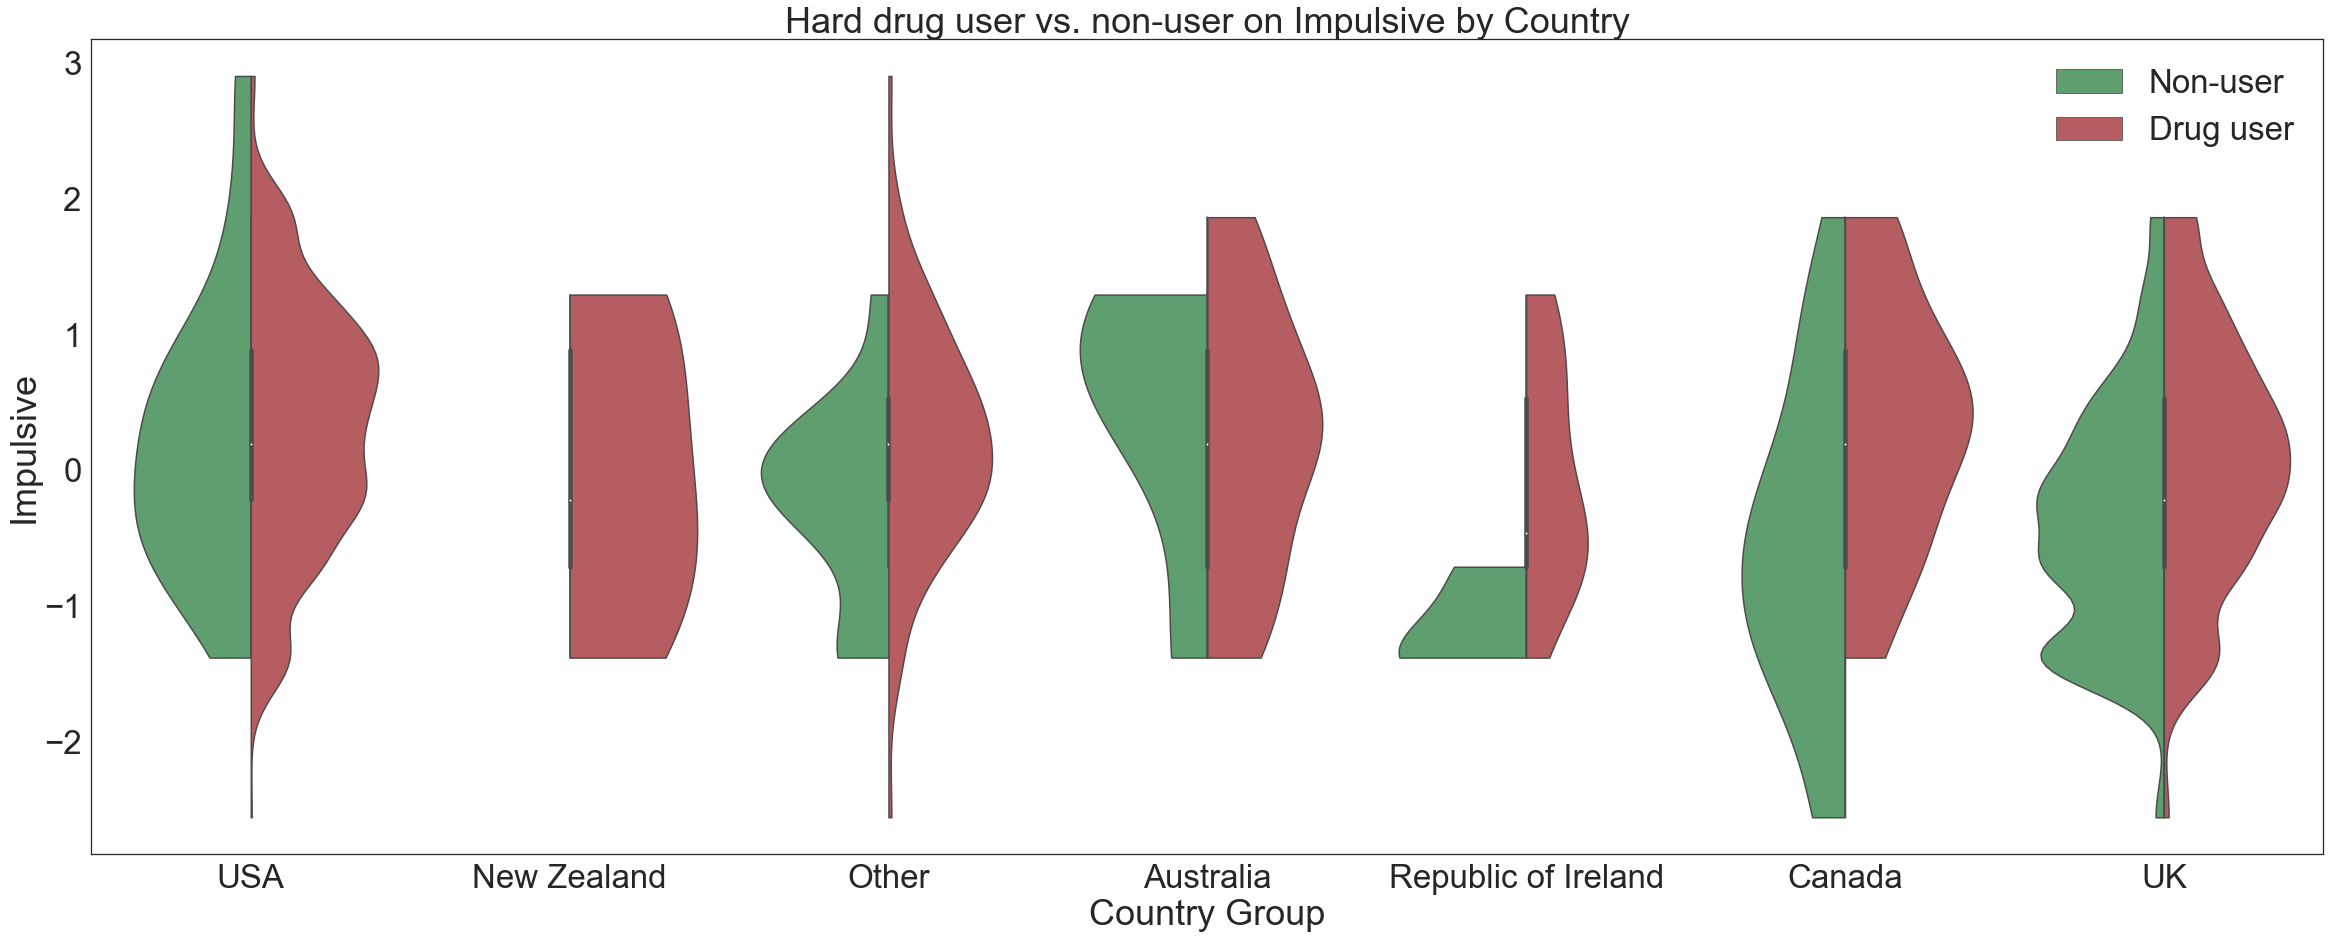

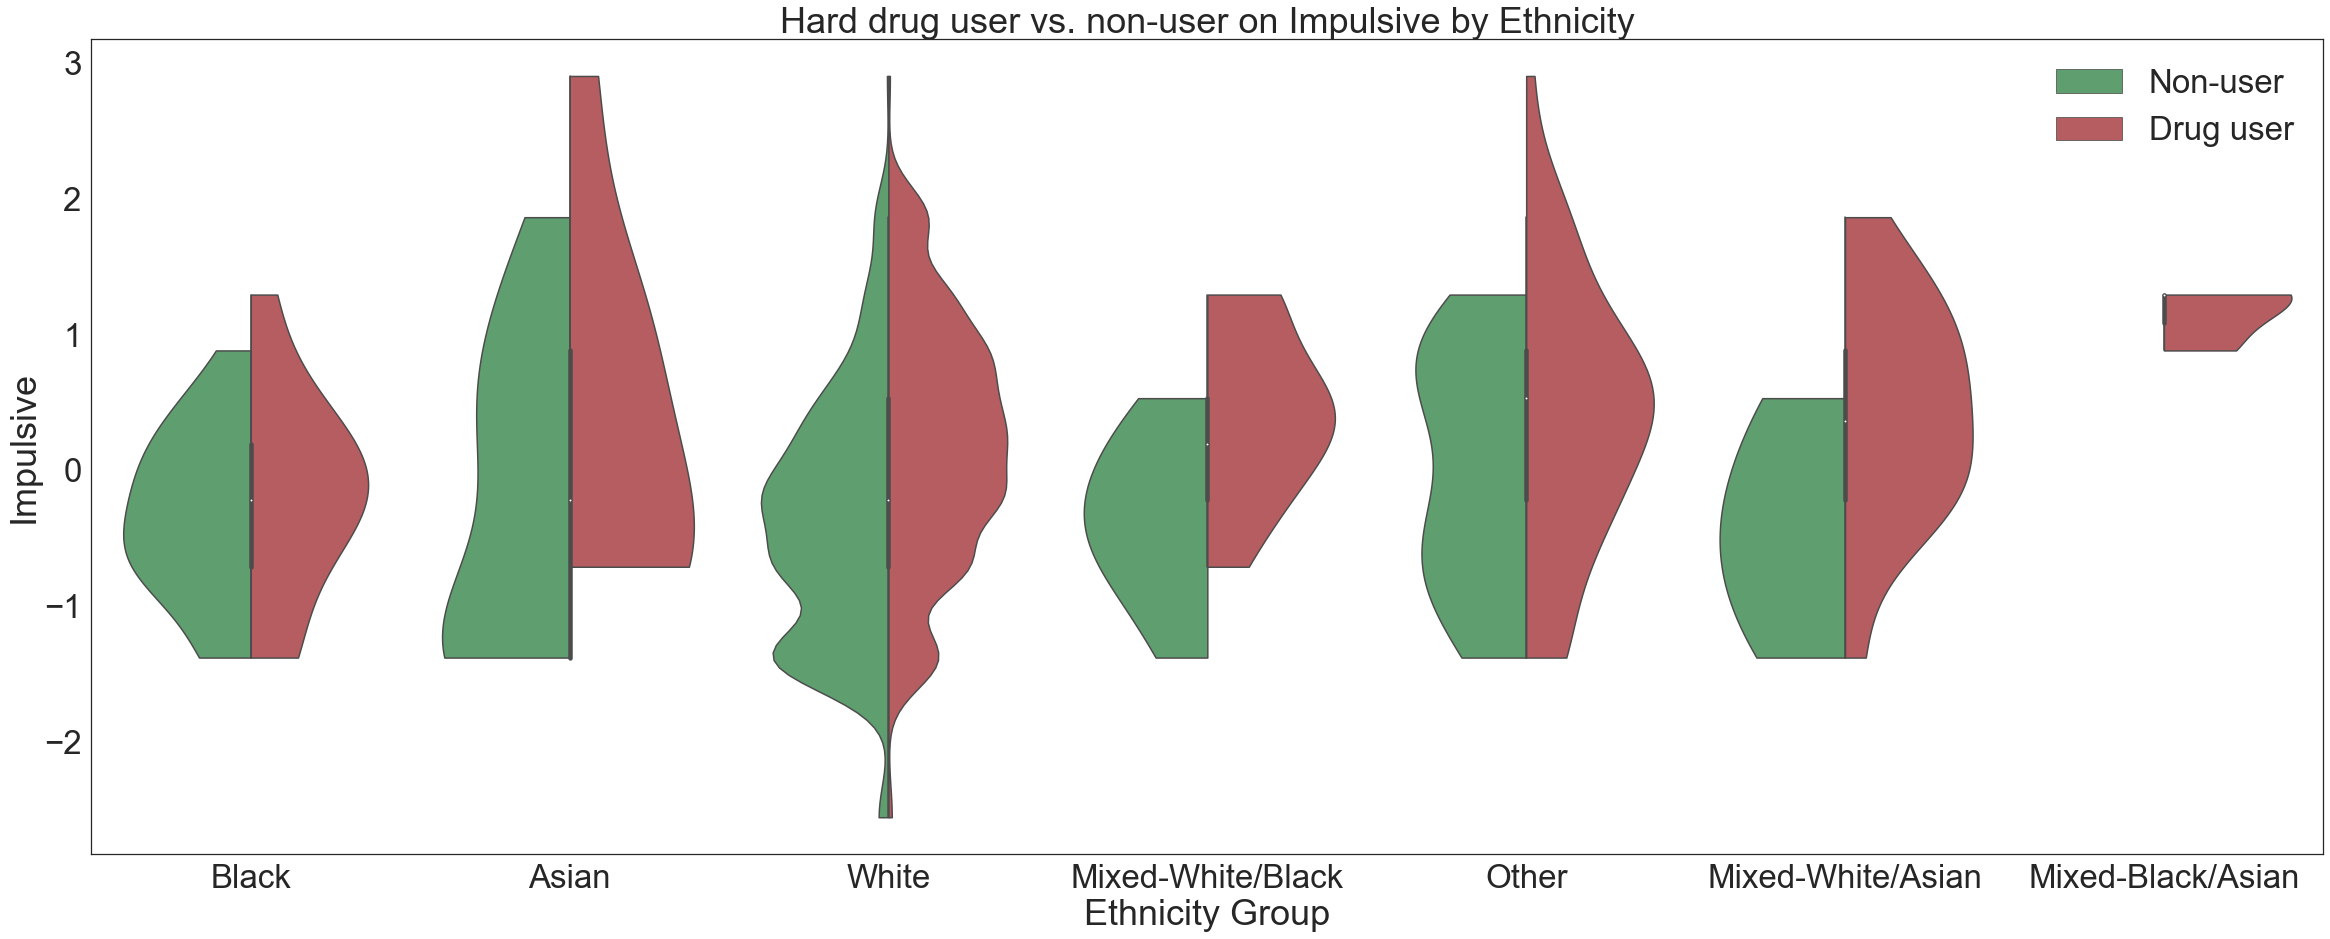

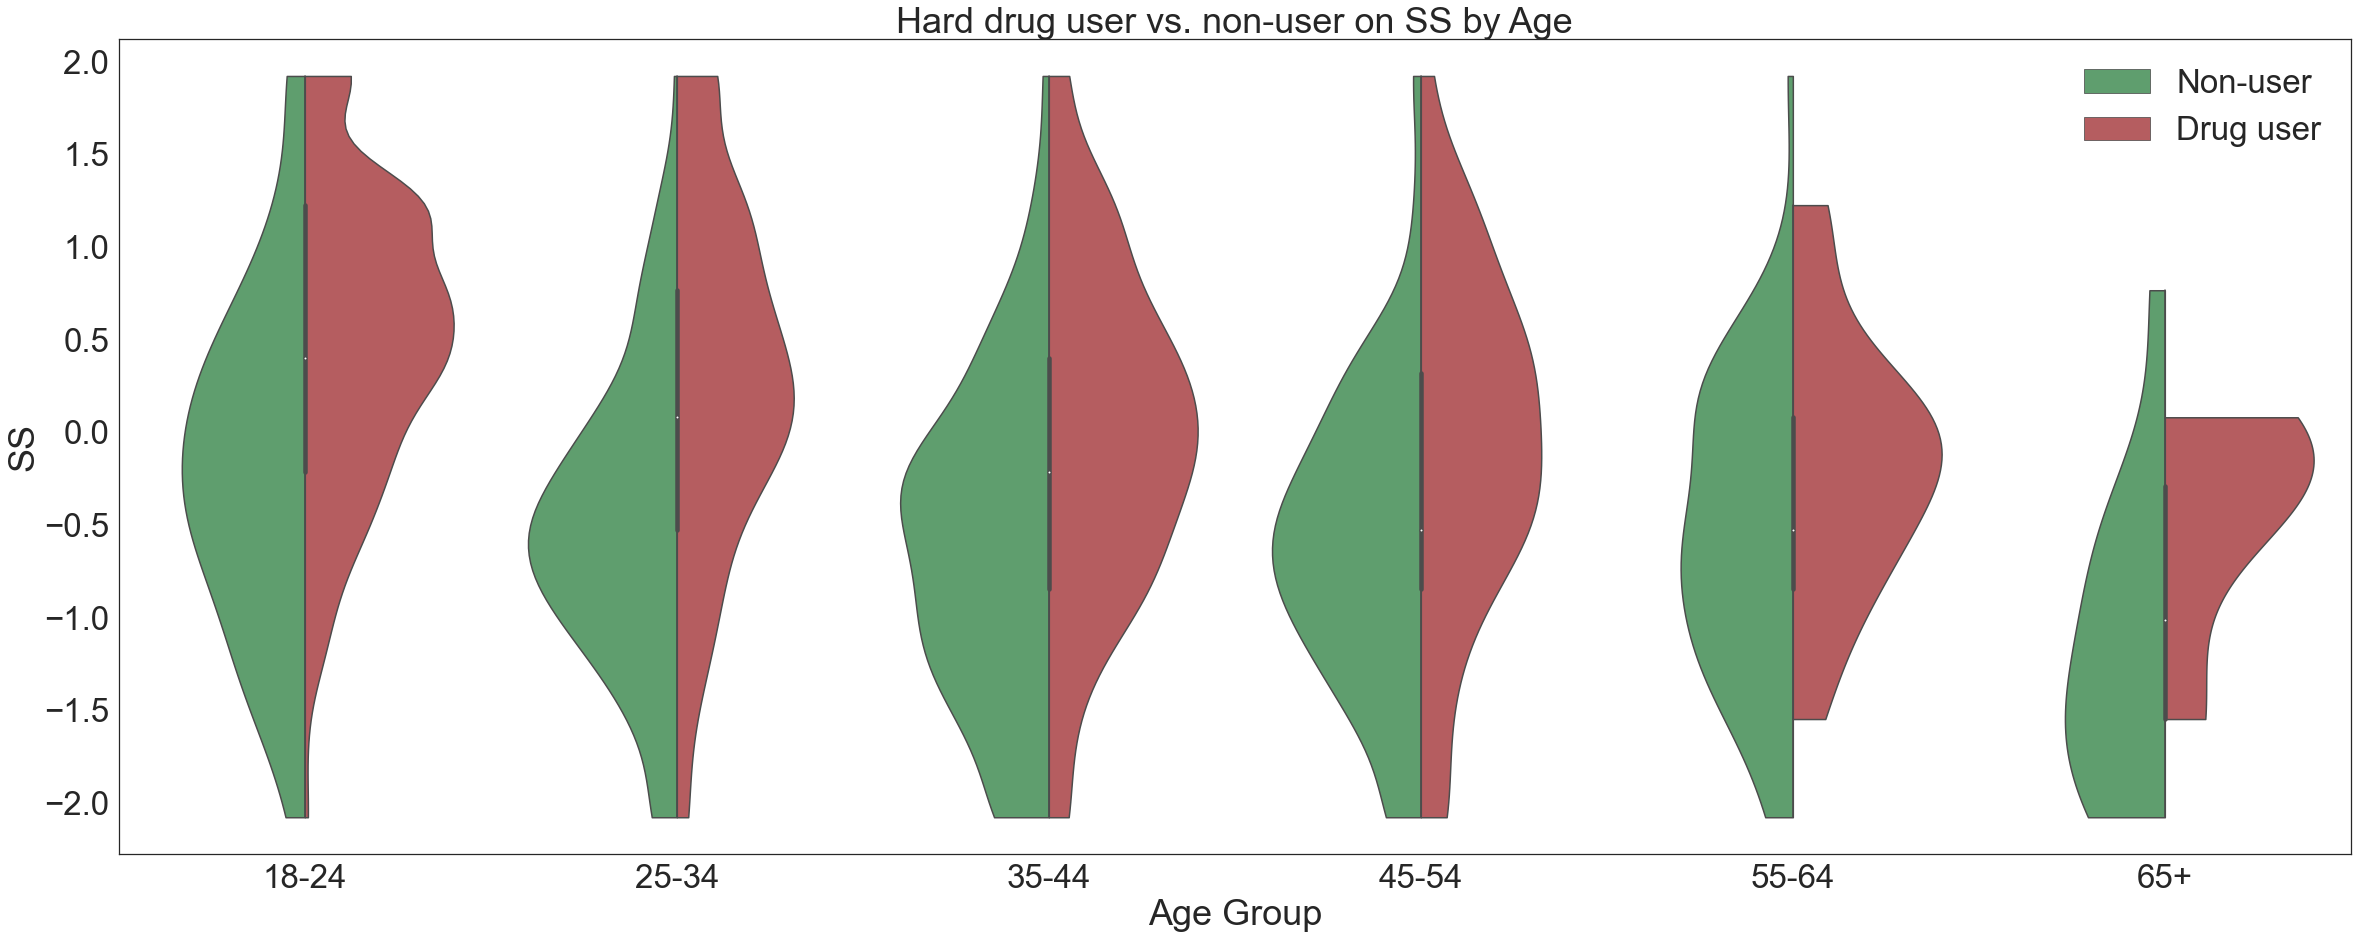

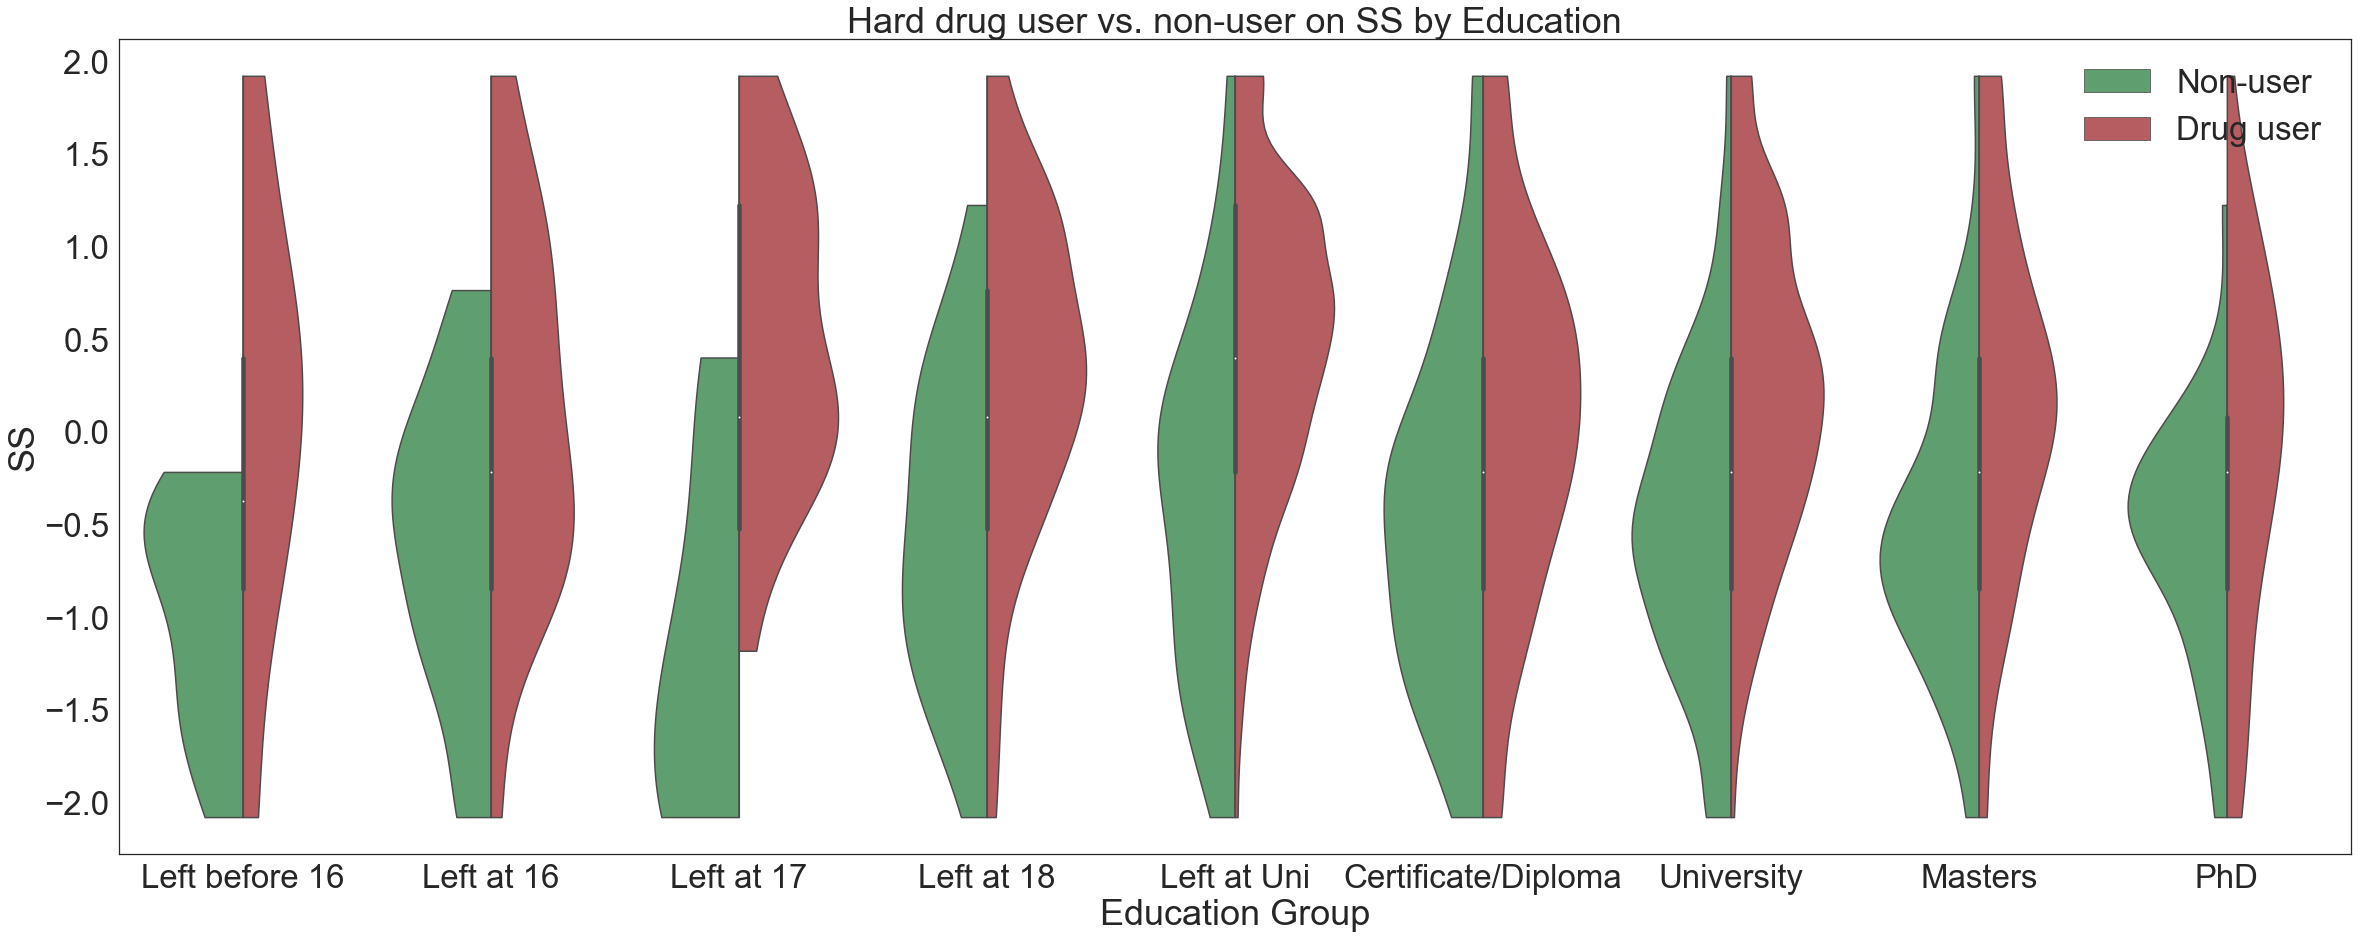

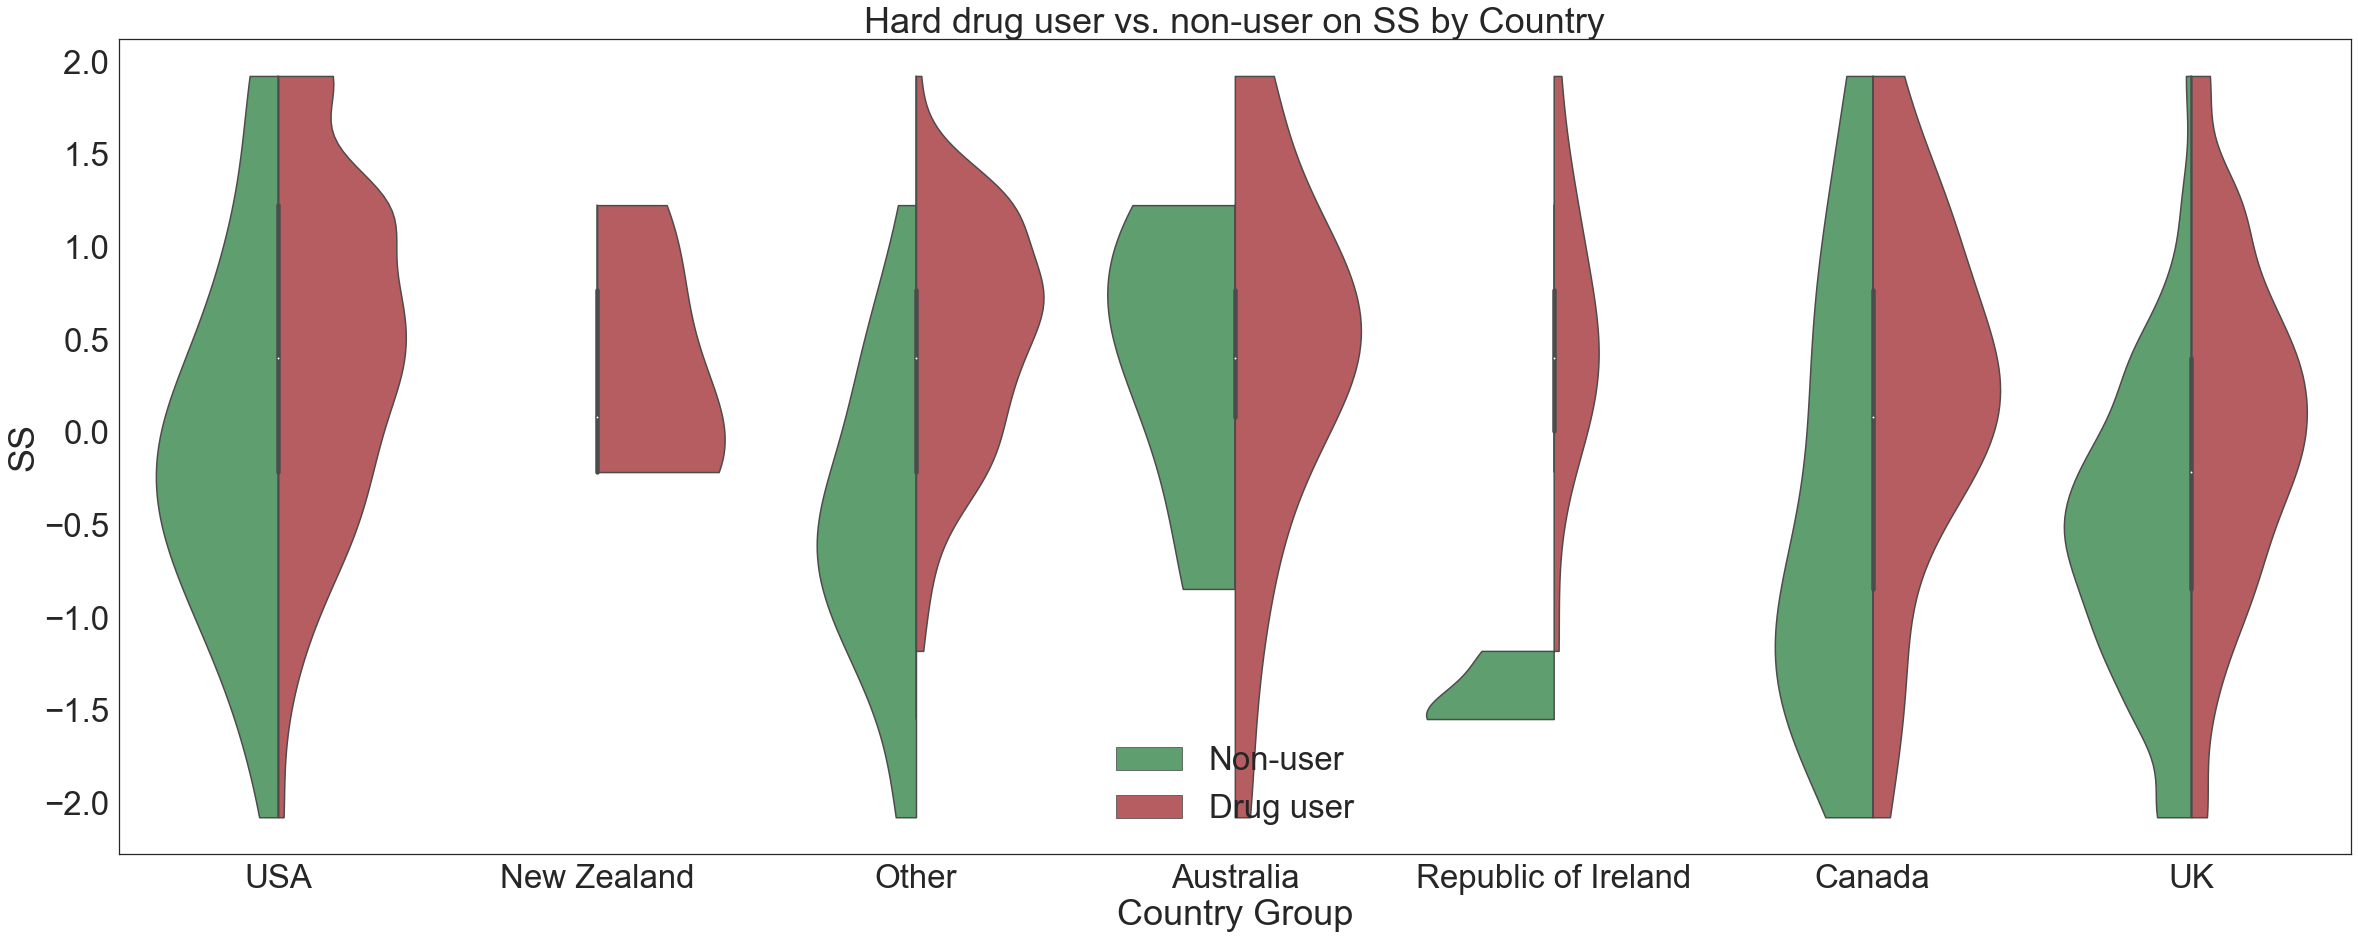

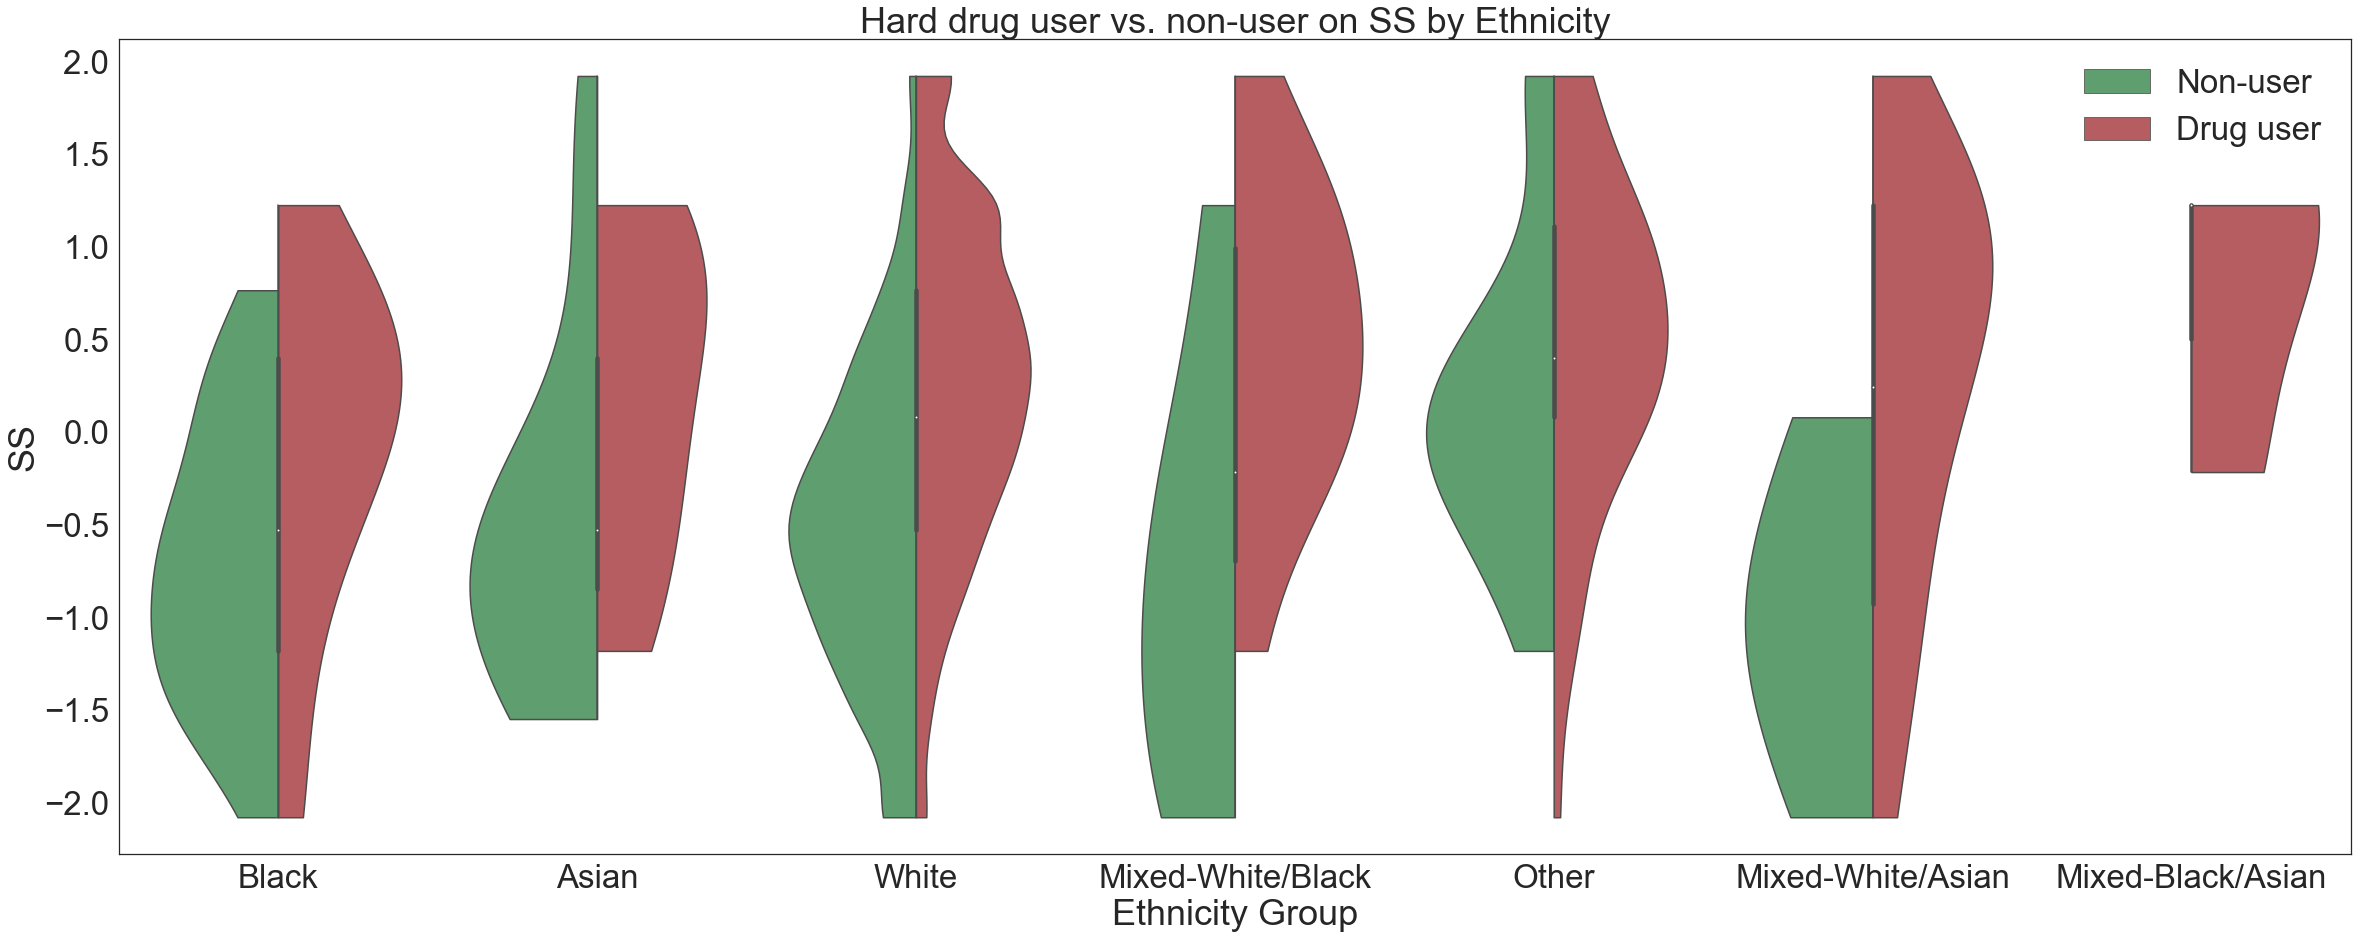

In [23]:
for score in scores:
    plot_personality(df, cat, score)

### Correlation Heatmap

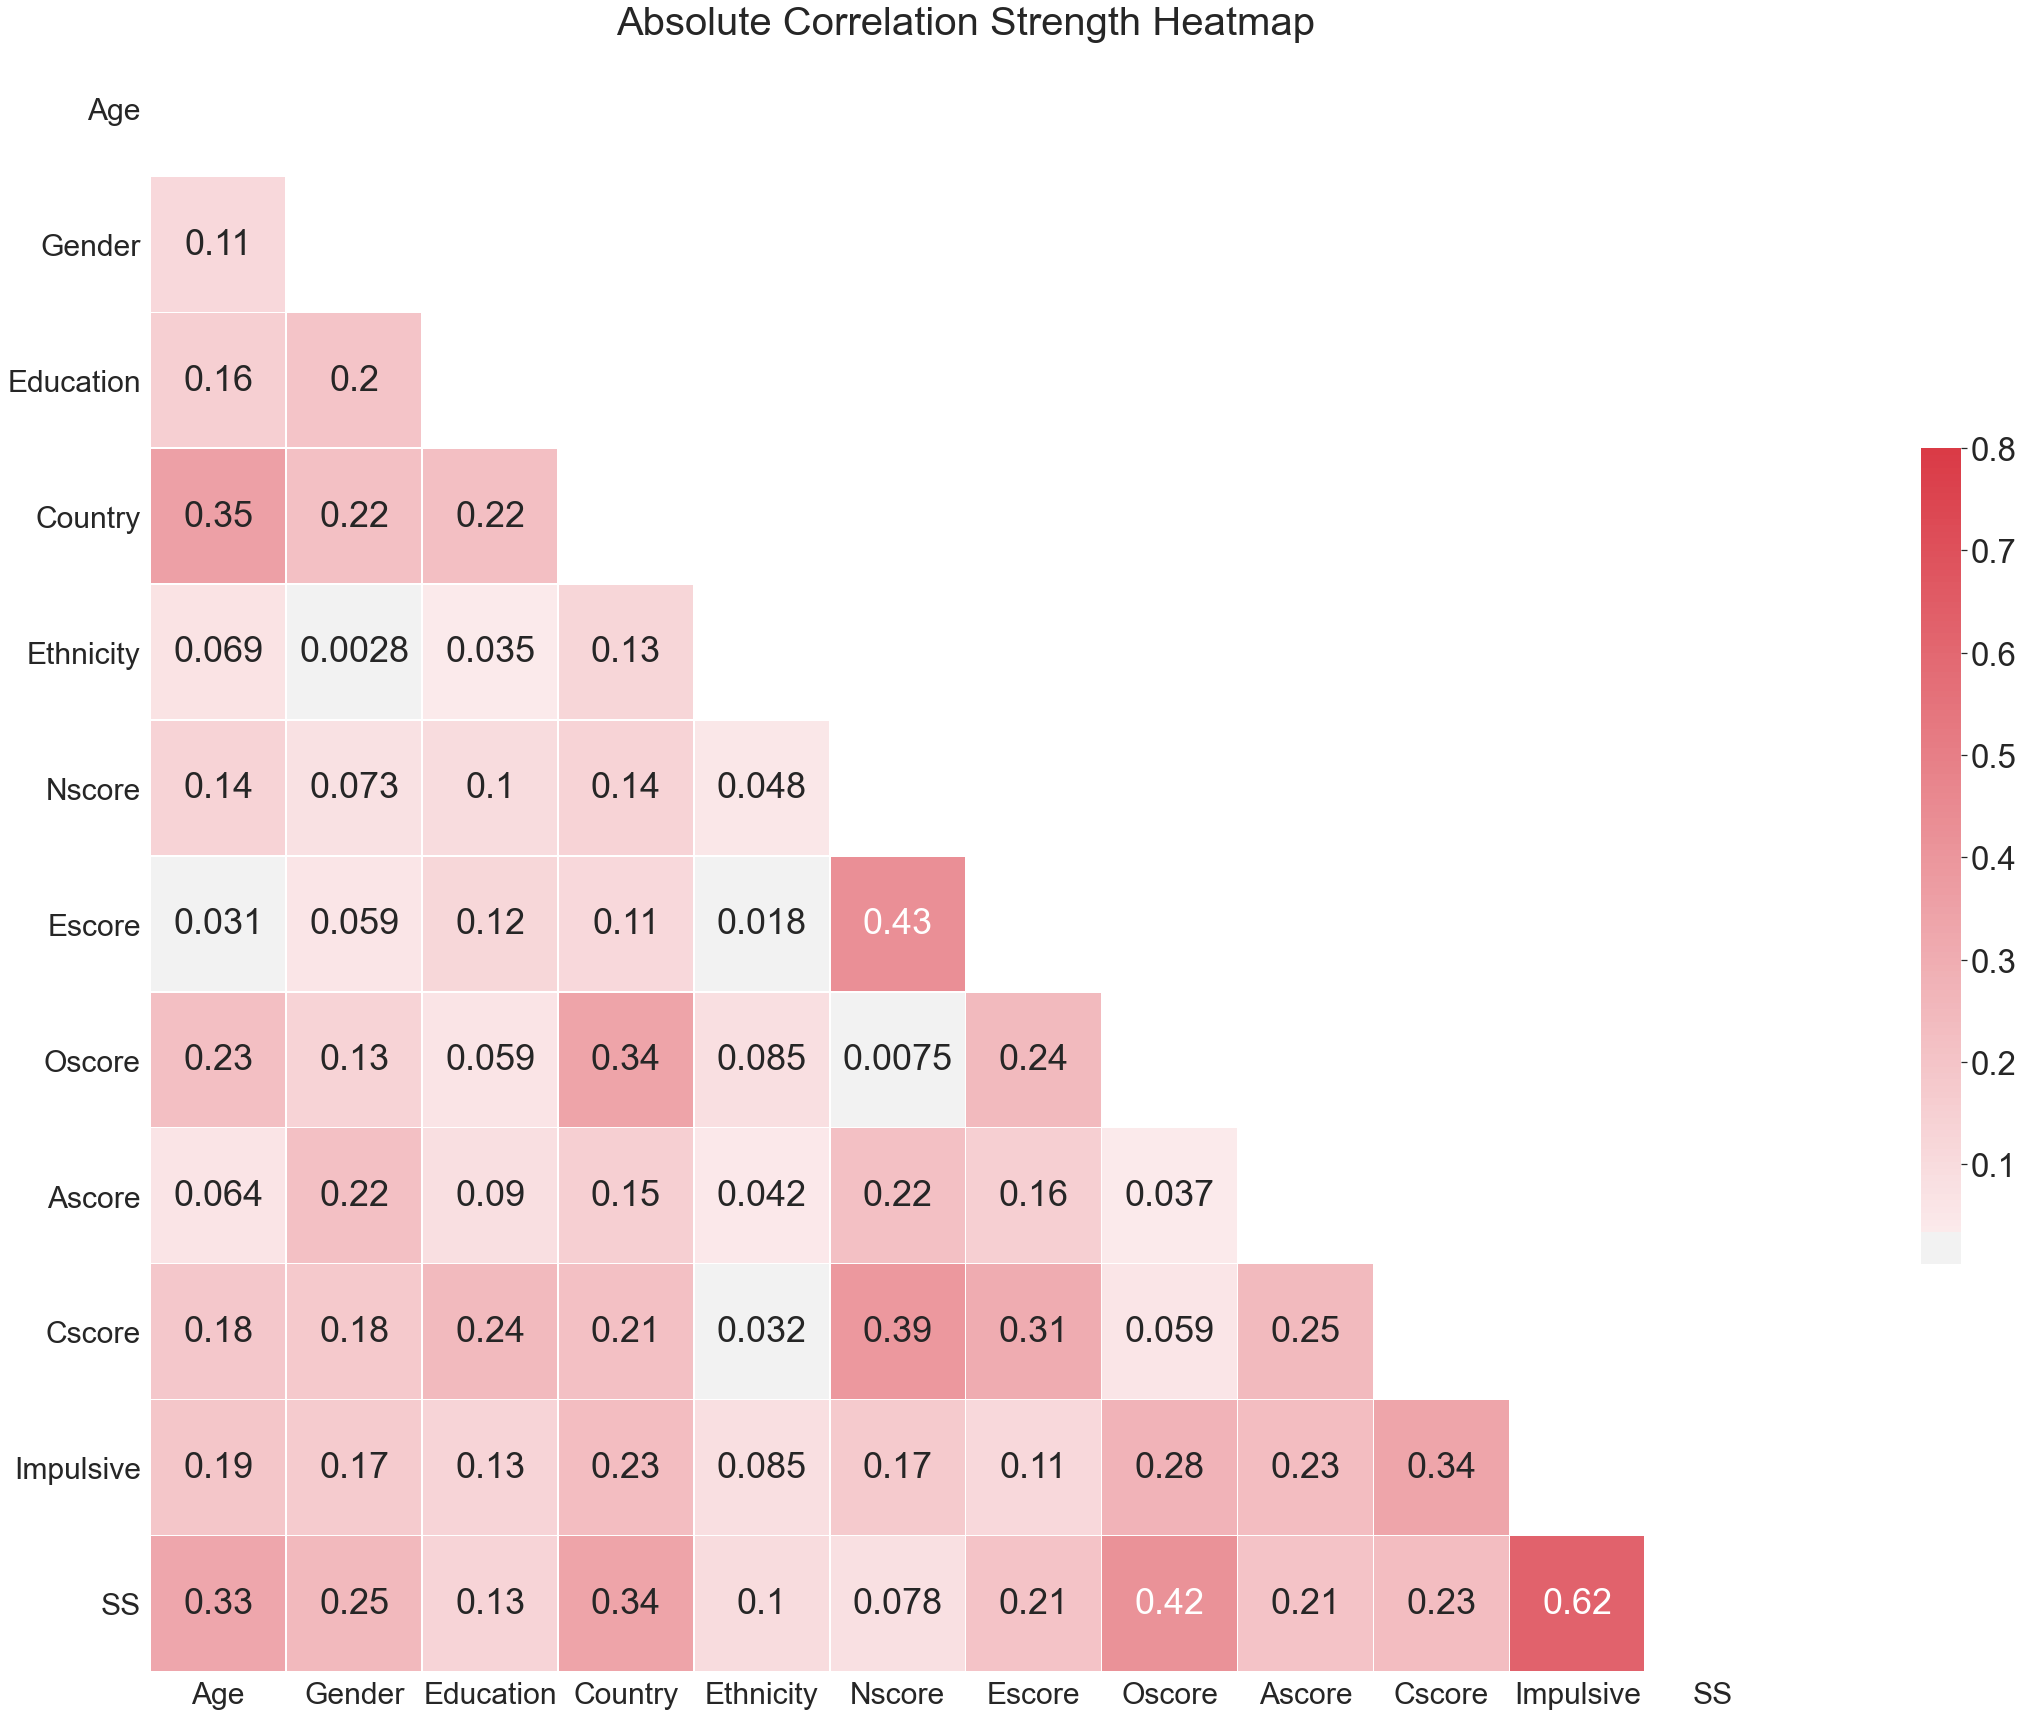

In [26]:
sns.set(style="white", font_scale = 3)

# Compute the correlation matrix
corr = abs(df.loc[:, "Age":"SS"].corr())

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, cmap=cmap, vmax=.8, center=0, annot=True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Absolute Correlation Strength Heatmap', fontsize=40)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("")
plt.ylabel("")
#plt.savefig("graph/correlation.png")
plt.show()

## Hypothesis Testing
### Variety of Drug Type Used

In [43]:
# define the demographics variable
demo=cat+["Gender"]

In [38]:
# perform ANOVA on demographics variable against hard drug user vs. non-user
def anova_demo(demo):
    outcome=[pg.welch_anova(dv="drug_use", between=d, data=df).iloc[0, :] for d in demo]
    return pd.DataFrame(outcome).set_index("Source")

In [45]:
anova_demo(demo)

ddof1        ddof2           F         p-unc       np2
Source                                                           
Age            5   209.552404  116.258358  1.911703e-58  0.140557
Education      8   247.968774   27.665282  1.606804e-30  0.108827
Country        6    47.186287   95.670353  1.050801e-24  0.256625
Ethnicity      6    23.430186    9.991659  1.667975e-05  0.018404
Gender         1  1832.375063  164.337189  4.317681e-36  0.080547

 Significant difference observed between those groups!

In [100]:
# pairwise gameshowell
def pairwise_gameshowell(demo):
    for d in demo:
        pair=pg.pairwise_gameshowell(data=df, dv='drug_use',between=d)
        for i in ["A", "B"]:
            pair[i]=pair[i].map(dict(zip(sorted(list(df[d].unique())), eval(d.lower()+"_lb"))))
        print(f"Pairwise Gameshowell for {d} with p<0.05:")
        display(pair[pair.pval<0.05])

In [101]:
pairwise_gameshowell(demo)

Pairwise Gameshowell for Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail  \
0   18-24  25-34  3.368917  2.633333  0.735583  0.106851  two-sided   
1   18-24  35-44  3.368917  1.673239  1.695677  0.103455  two-sided   
2   18-24  45-54  3.368917  1.132653  2.236264  0.099898  two-sided   
3   18-24  55-64  3.368917  0.935484  2.433433  0.131440  two-sided   
4   18-24    65+  3.368917  0.277778  3.091139  0.102274  two-sided   
5   25-34  35-44  2.633333  1.673239  0.960094  0.114023  two-sided   
6   25-34  45-54  2.633333  1.132653  1.500680  0.110806  two-sided   
7   25-34  55-64  2.633333  0.935484  1.697849  0.139910  two-sided   
8   25-34    65+  2.633333  0.277778  2.355556  0.112952  two-sided   
9   35-44  45-54  1.673239  1.132653  0.540586  0.107535  two-sided   
10  35-44  55-64  1.673239  0.935484  0.737756  0.137333  two-sided   
11  35-44    65+  1.673239  0.277778  1.395462  0.109745  two-sided   
13  45-54    65+  1.132653  0.277778  0.854875  0.106399  two-sided   
14  55-64    65+  0.935484  0.277778  0.657706  0.136446  two-sided   

            T          df      pval    hedges  
0    4.867864  996.059943  0.001000  0.294024  
1   11.589875  822.322933  0.001000  0.767046  
2   15.828880  749.069421  0.001000  1.115144  
3   13.091164  166.695331  0.001000  1.451713  
4   21.371743   52.583318  0.001000  5.102175  
5    5.953974  825.360349  0.001000  0.416413  
6    9.576548  759.628996  0.001000  0.708538  
7    8.580969  206.446666  0.001000  0.970913  
8   14.746288   75.843137  0.001000  3.534948  
9    3.554685  646.342907  0.005187  0.279983  
10   3.798584  190.787782  0.002196  0.441747  
11   8.991211   67.323850  0.001000  2.167918  
13   5.681324   59.657338  0.001000  1.376145  
14   3.408446   91.073335  0.009684  0.871635

Pairwise Gameshowell for Education with p<0.05:


A                    B   mean(A)   mean(B)      diff        se  \
9    Left at 16           Left at 18  1.959184  3.191919 -1.232736  0.247924   
10   Left at 16          Left at Uni  1.959184  3.495030 -1.535846  0.187474   
22   Left at 18  Certificate/Diploma  3.191919  1.829630  1.362290  0.202399   
23   Left at 18           University  3.191919  1.966527  1.225392  0.193821   
24   Left at 18              Masters  3.191919  1.409894  1.782025  0.198483   
25   Left at 18                  PhD  3.191919  1.707865  1.484054  0.243350   
26  Left at Uni  Certificate/Diploma  3.495030  1.829630  1.665400  0.121020   
27  Left at Uni           University  3.495030  1.966527  1.528503  0.106052   
28  Left at Uni              Masters  3.495030  1.409894  2.085136  0.114349   
29  Left at Uni                  PhD  3.495030  1.707865  1.787165  0.181382   

         tail          T          df      pval    hedges  
9   two-sided  -3.515899  194.685995  0.014071 -0.499072  
10  two-sided  -5.792835  138.135908  0.001000 -0.638833  
22  two-sided   4.759327  155.079966  0.001000  0.558046  
23  two-sided   4.470527  133.227052  0.001000  0.493001  
24  two-sided   6.348568  144.800397  0.001000  0.739840  
25  two-sided   4.312243  185.818736  0.001000  0.627354  
26  two-sided   9.730791  599.711744  0.001000  0.733414  
27  two-sided  10.191400  978.954782  0.001000  0.650485  
28  two-sided  12.893957  671.598138  0.001000  0.957204  
29  two-sided   6.967142  128.714281  0.001000  0.800173

Pairwise Gameshowell for Country with p<0.05:


A       B   mean(A)   mean(B)      diff        se  \
1                   USA   Other  4.068966  2.610169  1.458796  0.162847   
4                   USA  Canada  4.068966  2.850575  1.218391  0.211879   
5                   USA      UK  4.068966  1.316092  2.752874  0.081250   
14                Other      UK  2.610169  1.316092  1.294078  0.152976   
17            Australia      UK  3.365385  1.316092  2.049293  0.207012   
19  Republic of Ireland      UK  3.150000  1.316092  1.833908  0.303215   
20               Canada      UK  2.850575  1.316092  1.534483  0.204390   

         tail          T          df      pval    hedges  
1   two-sided   6.334303  173.531374  0.001000  0.641810  
4   two-sided   4.066149  107.897373  0.001145  0.468539  
5   two-sided  23.957866  950.577135  0.001000  1.260950  
14  two-sided   5.981658  136.477359  0.001000  0.580567  
17  two-sided   6.999930   55.408646  0.001000  0.993915  
19  two-sided   4.276730   19.740853  0.001203  0.964740  
20  two-sided   5.308692   93.632578  0.001000  0.591998

Pairwise Gameshowell for Ethnicity with p<0.05:


A                  B   mean(A)   mean(B)      diff        se  \
1  Black              White  0.818182  2.363265 -1.545083  0.169287   
3  Black              Other  0.818182  3.209677 -2.391496  0.287242   
4  Black  Mixed-White/Asian  0.818182  3.650000 -2.831818  0.488053   
6  Asian              White  1.000000  2.363265 -1.363265  0.248420   
8  Asian              Other  1.000000  3.209677 -2.209677  0.339945   
9  Asian  Mixed-White/Asian  1.000000  3.650000 -2.650000  0.520817   

        tail         T         df      pval    hedges  
1  two-sided -6.453751  36.194348  0.001000 -1.133724  
3  two-sided -5.887169  92.873910  0.001000 -1.258315  
4  two-sided -4.102830  23.925024  0.001897 -1.145469  
6  two-sided -3.880416  25.389382  0.003973 -0.781382  
8  two-sided -4.596270  66.570478  0.001000 -1.079292  
9  two-sided -3.597874  29.445154  0.009433 -1.060426

Pairwise Gameshowell for Gender with p<0.05:


A       B   mean(A)  mean(B)      diff        se       tail          T  \
0  Male  Female  3.048936  1.66809  1.380847  0.076166  two-sided  12.819407   

            df   pval    hedges  
0  1832.375063  0.001  0.591552

Together with the visualization one can see the younger age group seems to be on average to be a hard drug user on this dataset.

In [118]:
# ANOVA for all demographics vs personality scores
def anova_score(demo, scores):
    for s in scores:
        print(f"ANOVA for {s}:")
        outcome=[pg.welch_anova(dv=s, between=d, data=df).iloc[0, :] for d in demo if pg.welch_anova(dv=s, between=d, data=df).loc[0, "p-unc"]<0.05]
        display(pd.DataFrame(outcome).set_index("Source"))

In [119]:
anova_score(demo, scores)

ANOVA for Nscore:


ddof1        ddof2          F         p-unc       np2
Source                                                          
Age            5   158.612159   8.674767  2.733635e-07  0.021567
Education      8   249.763530   3.912661  2.256564e-04  0.017943
Country        6    47.311106   6.380080  5.675528e-05  0.022321
Gender         1  1873.852972  10.040813  1.555795e-03  0.005326

ANOVA for Escore:


ddof1        ddof2         F     p-unc       np2
Source                                                     
Age            5   164.005827  3.114353  0.010316  0.004588
Education      8   252.503181  4.201339  0.000096  0.016681
Country        6    48.143674  6.455138  0.000048  0.016588
Gender         1  1863.168875  6.482523  0.010974  0.003445

ANOVA for Oscore:


ddof1        ddof2          F         p-unc       np2
Source                                                          
Age            5   157.657204  24.743167  2.376281e-18  0.062409
Education      8   250.060736  17.393925  1.544212e-20  0.066481
Country        6    47.727651  40.453656  4.382874e-17  0.117543
Ethnicity      6    23.237764   4.822009  2.489616e-03  0.009229
Gender         1  1865.715204  34.176341  5.928395e-09  0.017905

ANOVA for Ascore:


ddof1        ddof2          F         p-unc       np2
Source                                                          
Age            5   158.215625   3.784890  2.893274e-03  0.009745
Education      8   249.972735   3.280852  1.407494e-03  0.013769
Country        6    47.261994   8.849977  1.773833e-06  0.029216
Gender         1  1874.902388  94.563597  7.710226e-22  0.048013

ANOVA for Cscore:


ddof1        ddof2          F         p-unc       np2
Source                                                          
Age            5   159.702660  15.294375  2.841878e-12  0.040457
Education      8   249.449489  21.771635  5.024382e-25  0.087843
Country        6    47.525843  14.859077  1.776062e-09  0.048410
Gender         1  1874.591306  64.533355  1.661221e-15  0.033274

ANOVA for Impulsive:


ddof1        ddof2          F         p-unc       np2
Source                                                          
Age            5   159.105232  17.173938  1.439963e-13  0.044885
Education      8   249.433668  10.444997  1.290355e-12  0.042917
Country        6    47.295789  17.356915  1.732540e-10  0.055423
Ethnicity      6    24.013827  12.124741  2.928179e-06  0.007751
Gender         1  1865.878709  55.462887  1.447630e-13  0.028736

ANOVA for SS:


ddof1        ddof2           F         p-unc       np2
Source                                                           
Age            5   159.214605   53.527308  2.204679e-32  0.117480
Education      8   248.033930   16.659904  1.024107e-19  0.063954
Country        6    47.500626   40.046050  5.920570e-17  0.118927
Ethnicity      6    23.178090    4.145469  5.683442e-03  0.012710
Gender         1  1852.110331  121.188793  2.397431e-27  0.060730

In [114]:
# pairwise gameshowell
def pairwise_gameshowell_scores(demo, scores):
    for s in scores:
        print(f"Pairwise Gameshowell for {s}:")
        for d in demo:
            pair=pg.pairwise_gameshowell(data=df, dv=s,between=d)
            for i in ["A", "B"]:
                pair[i]=pair[i].map(dict(zip(sorted(list(df[d].unique())), eval(d.lower()+"_lb"))))
            print(f"{d} with p<0.05:")
            display(pair[pair.pval<0.05])

In [115]:
pairwise_gameshowell_scores(demo, scores)

Pairwise Gameshowell for Nscore:
Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
2   18-24  45-54  0.116647 -0.204961  0.321608  0.047222  two-sided  4.815804   
3   18-24  55-64  0.116647 -0.377074  0.493722  0.073529  two-sided  4.747983   
6   25-34  45-54  0.070251 -0.204961  0.275212  0.049503  two-sided  3.931196   
7   25-34  55-64  0.070251 -0.377074  0.447326  0.075014  two-sided  4.216640   
10  35-44  55-64 -0.015900 -0.377074  0.361174  0.076547  two-sided  3.336379   

            df      pval    hedges  
2   645.498082  0.001000  0.339273  
3   128.326688  0.001000  0.526516  
6   671.539628  0.001219  0.290856  
7   138.260657  0.001000  0.477101  
10  148.373587  0.011783  0.387996

Education with p<0.05:


A        B   mean(A)   mean(B)      diff        se       tail  \
19   Left at 17  Masters  0.540247 -0.171995  0.712241  0.146583  two-sided   
20   Left at 17      PhD  0.540247 -0.302828  0.843075  0.159252  two-sided   
29  Left at Uni      PhD  0.124096 -0.302828  0.426924  0.081868  two-sided   

           T          df      pval    hedges  
19  3.435800   32.947093  0.025132  0.668283  
20  3.743403   44.809225  0.008428  0.795226  
29  3.687431  126.919639  0.008050  0.423500

Country with p<0.05:


A   B   mean(A)   mean(B)      diff        se       tail       T  \
5  USA  UK  0.217179 -0.113275  0.330454  0.037546  two-sided  6.2235   

            df   pval    hedges  
5  1029.408974  0.001  0.327555

Ethnicity with p<0.05:


Empty DataFrame
Columns: [A, B, mean(A), mean(B), diff, se, tail, T, df, pval, hedges]
Index: []

Gender with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail         T  \
0  Male  Female -0.073282  0.072412 -0.145694  0.032512  two-sided -3.168724   

            df      pval    hedges  
0  1873.852972  0.001531 -0.146221

Pairwise Gameshowell for Escore:
Age with p<0.05:


A    B   mean(A)  mean(B)      diff        se       tail         T  \
4   18-24  65+  0.013748 -0.44466  0.458408  0.100313  two-sided  3.231328   
8   25-34  65+  0.058146 -0.44466  0.502806  0.101454  two-sided  3.504405   
13  45-54  65+  0.017184 -0.44466  0.461844  0.102596  two-sided  3.183092   

           df      pval    hedges  
4   20.487519  0.023609  0.771430  
8   21.430303  0.010364  0.840068  
13  22.394707  0.026218  0.771017

Education with p<0.05:


A        B  mean(A)   mean(B)      diff        se       tail  \
19  Left at 17  Masters -0.46388  0.201926 -0.665807  0.138955  two-sided   
20  Left at 17      PhD -0.46388  0.207116 -0.670996  0.148471  two-sided   

           T         df      pval    hedges  
19 -3.388117  32.989999  0.028929 -0.659008  
20 -3.195684  42.257204  0.047089 -0.678872

Country with p<0.05:


A                    B   mean(A)   mean(B)      diff        se  \
5           USA                   UK -0.146883  0.096193 -0.243076  0.039018   
7   New Zealand            Australia -0.685344  0.067104 -0.752448  0.162831   
8   New Zealand  Republic of Ireland -0.685344  0.331121 -1.016465  0.216910   
10  New Zealand                   UK -0.685344  0.096193 -0.781537  0.134674   

         tail         T          df      pval    hedges  
5   two-sided -4.405171  972.052488  0.001000 -0.231853  
7   two-sided -3.267571    8.786685  0.044965 -1.508987  
8   two-sided -3.313584   17.885746  0.027390 -1.602172  
10  two-sided -4.103467    4.191060  0.016305 -1.838197

Ethnicity with p<0.05:


Empty DataFrame
Columns: [A, B, mean(A), mean(B), diff, se, tail, T, df, pval, hedges]
Index: []

Gender with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail        T  \
0  Male  Female -0.060381  0.056665 -0.117046  0.032506  two-sided -2.54608   

            df      pval    hedges  
0  1863.168875  0.010895 -0.117489

Pairwise Gameshowell for Oscore:
Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
0  18-24  25-34  0.315165 -0.032590  0.347755  0.043015  two-sided  5.716651   
1  18-24  35-44  0.315165 -0.270379  0.585544  0.044253  two-sided  9.356177   
2  18-24  45-54  0.315165 -0.225633  0.540797  0.044733  two-sided  8.548461   
3  18-24  55-64  0.315165 -0.177488  0.492652  0.074102  two-sided  4.701037   
4  18-24    65+  0.315165 -0.685602  1.000766  0.218375  two-sided  3.240521   
5  25-34  35-44 -0.032590 -0.270379  0.237789  0.048287  two-sided  3.482112   

           df      pval    hedges  
0  995.776162  0.001000  0.345291  
1  757.759820  0.001000  0.619215  
2  635.775047  0.001000  0.602239  
3  122.383601  0.001000  0.521310  
4   17.538882  0.024454  0.773625  
5  801.370242  0.006709  0.243534

Education with p<0.05:


A                    B   mean(A)   mean(B)      diff  \
9            Left at 16           Left at 18 -0.638455 -0.089370 -0.549085   
10           Left at 16          Left at Uni -0.638455  0.307473 -0.945928   
11           Left at 16  Certificate/Diploma -0.638455 -0.292339 -0.346117   
12           Left at 16           University -0.638455 -0.028938 -0.609518   
13           Left at 16              Masters -0.638455  0.001153 -0.639609   
14           Left at 16                  PhD -0.638455  0.249240 -0.887695   
16           Left at 17          Left at Uni -0.320551  0.307473 -0.628023   
20           Left at 17                  PhD -0.320551  0.249240 -0.569790   
26          Left at Uni  Certificate/Diploma  0.307473 -0.292339  0.599811   
27          Left at Uni           University  0.307473 -0.028938  0.336410   
28          Left at Uni              Masters  0.307473  0.001153  0.306319   
32  Certificate/Diploma                  PhD -0.292339  0.249240 -0.541578   

          se       tail         T          df      pval    hedges  
9   0.106551  two-sided -3.643891  177.197301  0.009057 -0.517240  
10  0.069289  two-sided -9.653416  149.206130  0.001000 -1.064577  
11  0.074995  two-sided -3.263417  192.420242  0.032217 -0.384070  
12  0.069649  two-sided -6.188082  152.039839  0.001000 -0.685287  
13  0.071430  two-sided -6.331717  164.506831  0.001000 -0.740657  
14  0.091163  two-sided -6.885434  182.256099  0.001000 -1.004101  
16  0.110577  two-sided -4.016012   32.918750  0.003760 -0.765866  
20  0.125447  two-sided -3.211724   51.960772  0.043287 -0.682279  
26  0.052238  two-sided  8.119231  550.157653  0.001000  0.611950  
27  0.044221  two-sided  5.379337  976.444021  0.001000  0.343346  
28  0.046975  two-sided  4.610972  659.446237  0.001000  0.342303  
32  0.078984  two-sided -4.848480  163.516310  0.001000 -0.591374

Country with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail  \
4         USA  Canada  0.449361 -0.083659  0.533019  0.089927  two-sided   
5         USA      UK  0.449361 -0.289304  0.738664  0.035020  two-sided   
13      Other  Canada  0.388739 -0.083659  0.472398  0.097993  two-sided   
14      Other      UK  0.388739 -0.289304  0.678043  0.052366  two-sided   
17  Australia      UK  0.164134 -0.289304  0.453438  0.099097  two-sided   

            T           df      pval    hedges  
4    4.191205   105.944569  0.001000  0.482949  
5   14.914879  1110.348468  0.001000  0.785000  
13   3.408769   139.241216  0.012683  0.479915  
14   9.155752   162.351974  0.001000  0.888638  
17   3.235489    55.636273  0.024732  0.459405

Ethnicity with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
1  Black  White -0.472086 -0.004957 -0.467129  0.072471  two-sided -4.557833   
3  Black  Other -0.472086  0.343342 -0.815428  0.109031  two-sided -5.288353   

          df   pval    hedges  
1  35.877632  0.001 -0.800670  
3  90.846447  0.001 -1.130325

Gender with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail         T  \
0  Male  Female  0.129761 -0.136634  0.266394  0.032222  two-sided  5.846053   

            df   pval    hedges  
0  1865.715204  0.001  0.269766

Pairwise Gameshowell for Ascore:
Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
2  18-24  45-54 -0.095034  0.197321 -0.292355  0.048333  two-sided -4.277094   
9  35-44  45-54 -0.024349  0.197321 -0.221669  0.052647  two-sided -2.977244   

           df      pval    hedges  
2  593.936412  0.001000 -0.301321  
9  618.362858  0.034968 -0.234501

Education with p<0.05:


Empty DataFrame
Columns: [A, B, mean(A), mean(B), diff, se, tail, T, df, pval, hedges]
Index: []

Country with p<0.05:


A   B   mean(A)   mean(B)      diff        se       tail         T  \
5      USA  UK -0.168417  0.142034 -0.310451  0.037939  two-sided -5.786202   
14   Other  UK -0.299548  0.142034 -0.441582  0.064024  two-sided -4.876991   
20  Canada  UK -0.282535  0.142034 -0.424569  0.077756  two-sided -3.861009   

             df      pval    hedges  
5   1020.590779  0.001000 -0.304539  
14   145.797524  0.001000 -0.473351  
20    99.621839  0.002609 -0.430560

Ethnicity with p<0.05:


Empty DataFrame
Columns: [A, B, mean(A), mean(B), diff, se, tail, T, df, pval, hedges]
Index: []

Gender with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail         T  \
0  Male  Female -0.218644  0.218027 -0.436671  0.031752  two-sided -9.724382   

            df   pval    hedges  
0  1874.902388  0.001 -0.448732

Pairwise Gameshowell for Cscore:
Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
0  18-24  25-34 -0.265446  0.068363 -0.333809  0.042644  two-sided -5.535115   
1  18-24  35-44 -0.265446  0.136945 -0.402390  0.046636  two-sided -6.101142   
2  18-24  45-54 -0.265446  0.216192 -0.481637  0.047000  two-sided -7.246163   
3  18-24  55-64 -0.265446  0.136921 -0.402366  0.074346  two-sided -3.826900   
4  18-24    65+ -0.265446  0.590322 -0.855768  0.141902  two-sided -4.264339   

            df      pval    hedges  
0  1075.678100  0.001000 -0.334326  
1   785.390810  0.001000 -0.403788  
2   664.775267  0.001000 -0.510492  
3   128.671935  0.002051 -0.424375  
4    18.559674  0.001000 -1.018045

Education with p<0.05:


A                    B   mean(A)   mean(B)      diff  \
10           Left at 16          Left at Uni -0.066840 -0.388384  0.321544   
13           Left at 16              Masters -0.066840  0.369039 -0.435879   
14           Left at 16                  PhD -0.066840  0.487473 -0.554313   
19           Left at 17              Masters -0.435462  0.369039 -0.804501   
20           Left at 17                  PhD -0.435462  0.487473 -0.922935   
22           Left at 18  Certificate/Diploma -0.301294  0.088360 -0.389654   
23           Left at 18           University -0.301294  0.153949 -0.455243   
24           Left at 18              Masters -0.301294  0.369039 -0.670333   
25           Left at 18                  PhD -0.301294  0.487473 -0.788767   
26          Left at Uni  Certificate/Diploma -0.388384  0.088360 -0.476744   
27          Left at Uni           University -0.388384  0.153949 -0.542333   
28          Left at Uni              Masters -0.388384  0.369039 -0.757423   
29          Left at Uni                  PhD -0.388384  0.487473 -0.875857   
32  Certificate/Diploma                  PhD  0.088360  0.487473 -0.399114   

          se       tail          T          df      pval    hedges  
10  0.072449  two-sided   3.138282  143.903116  0.047842  0.346089  
13  0.075102  two-sided  -4.103952  162.229186  0.001571 -0.480062  
14  0.100338  two-sided  -3.906399  178.094903  0.003406 -0.569669  
19  0.155288  two-sided  -3.663301   31.412715  0.012694 -0.712533  
20  0.168943  two-sided  -3.862913   43.137052  0.005644 -0.820614  
22  0.083503  two-sided  -3.299595  167.289045  0.029001 -0.386888  
23  0.078454  two-sided  -4.103110  134.744433  0.001623 -0.452483  
24  0.081142  two-sided  -5.841582  151.649280  0.001000 -0.680758  
25  0.104935  two-sided  -5.315114  184.027049  0.001000 -0.773253  
26  0.051967  two-sided  -6.487034  556.880269  0.001000 -0.488931  
27  0.043391  two-sided  -8.837964  978.969743  0.001000 -0.564100  
28  0.048081  two-sided -11.139193  642.774446  0.001000 -0.826936  
29  0.082092  two-sided  -7.544251  119.096161  0.001000 -0.866454  
32  0.086714  two-sided  -3.254572  144.690337  0.033734 -0.396963

Country with p<0.05:


A   B   mean(A)   mean(B)      diff        se       tail         T  \
5     USA  UK -0.262325  0.185405 -0.447730  0.036375  two-sided -8.703656   
14  Other  UK -0.338918  0.185405 -0.524322  0.068053  two-sided -5.447974   

             df   pval    hedges  
5   1066.447421  0.001 -0.458091  
14   141.626667  0.001 -0.528769

Ethnicity with p<0.05:


Empty DataFrame
Columns: [A, B, mean(A), mean(B), diff, se, tail, T, df, pval, hedges]
Index: []

Gender with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail         T  \
0  Male  Female -0.182039  0.181832 -0.363871  0.032029  two-sided -8.033266   

            df   pval    hedges  
0  1874.591306  0.001 -0.370695

Pairwise Gameshowell for Impulsive:
Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
0  18-24  25-34  0.264757 -0.024936  0.289693  0.039396  two-sided  5.199632   
1  18-24  35-44  0.264757 -0.168902  0.433659  0.043473  two-sided  7.053644   
2  18-24  45-54  0.264757 -0.247053  0.511810  0.048582  two-sided  7.449347   
3  18-24  55-64  0.264757 -0.070132  0.334889  0.070603  two-sided  3.354014   
4  18-24    65+  0.264757 -0.423812  0.688569  0.139741  two-sided  3.484248   
6  25-34  45-54 -0.024936 -0.247053  0.222117  0.050630  two-sided  3.102142   

            df      pval    hedges  
0  1036.908397  0.001000  0.314063  
1   730.642558  0.001000  0.466827  
2   534.903249  0.001000  0.524806  
3   122.609295  0.011272  0.371935  
4    18.237440  0.011939  0.831811  
6   581.133321  0.023927  0.229517

Education with p<0.05:


A                    B   mean(A)   mean(B)      diff        se  \
10   Left at 16          Left at Uni -0.139642  0.294190 -0.433831  0.078435   
25   Left at 18                  PhD  0.118793 -0.333060  0.451853  0.091691   
26  Left at Uni  Certificate/Diploma  0.294190 -0.019617  0.313807  0.052849   
27  Left at Uni           University  0.294190 -0.093530  0.387720  0.041930   
28  Left at Uni              Masters  0.294190 -0.201579  0.495769  0.047763   
29  Left at Uni                  PhD  0.294190 -0.333060  0.627250  0.070237   

         tail         T          df      pval    hedges  
10  two-sided -3.911052  133.610946  0.003478 -0.431310  
25  two-sided  3.484626  185.990734  0.015710  0.506950  
26  two-sided  4.198691  531.914843  0.001000  0.316457  
27  two-sided  6.538557  978.236898  0.001000  0.417336  
28  two-sided  7.339603  633.013656  0.001000  0.544867  
29  two-sided  6.314778  132.134641  0.001000  0.725249

Country with p<0.05:


A   B   mean(A)   mean(B)      diff        se       tail  \
5         USA  UK  0.315990 -0.181237  0.497226  0.034287  two-sided   
14      Other  UK  0.109104 -0.181237  0.290341  0.058080  two-sided   
17  Australia  UK  0.237238 -0.181237  0.418474  0.098657  two-sided   

            T           df      pval    hedges  
5   10.254272  1132.044910  0.001000  0.539703  
14   3.534793   151.597210  0.008170  0.343080  
17   2.999350    55.615305  0.049024  0.425875

Ethnicity with p<0.05:


A                  B   mean(A)   mean(B)      diff  \
3               Black              Other -0.291656  0.275442 -0.567098   
5               Black  Mixed-Black/Asian -0.291656  1.155183 -1.446839   
10              Asian  Mixed-Black/Asian -0.058596  1.155183 -1.213779   
14              White  Mixed-Black/Asian -0.004244  1.155183 -1.159427   
17  Mixed-White/Black  Mixed-Black/Asian  0.143228  1.155183 -1.011955   
19              Other  Mixed-Black/Asian  0.275442  1.155183 -0.879741   
20  Mixed-White/Asian  Mixed-Black/Asian  0.251948  1.155183 -0.903235   

          se       tail         T         df      pval    hedges  
3   0.121086  two-sided -3.311676  86.478346  0.018317 -0.707833  
5   0.127851  two-sided -8.002034   5.861789  0.001000 -4.718177  
10  0.196763  two-sided -4.361949  18.758289  0.001000 -2.587568  
14  0.098254  two-sided -8.344067   2.114812  0.001000 -4.819553  
17  0.153735  two-sided -4.654521  10.092905  0.001000 -2.781861  
19  0.130738  two-sided -4.758166   6.486132  0.001625 -2.779187  
20  0.168785  two-sided -3.784017  12.827364  0.009027 -2.258153

Gender with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail         T  \
0  Male  Female  0.166737 -0.156667  0.323405  0.030706  two-sided  7.447341   

            df   pval    hedges  
0  1865.878709  0.001  0.343658

Pairwise Gameshowell for SS:
Age with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail  \
0   18-24  25-34  0.395553  0.009599  0.385954  0.039588  two-sided   
1   18-24  35-44  0.395553 -0.298946  0.694499  0.042408  two-sided   
2   18-24  45-54  0.395553 -0.373103  0.768656  0.043940  two-sided   
3   18-24  55-64  0.395553 -0.400817  0.796370  0.062648  two-sided   
4   18-24    65+  0.395553 -0.965851  1.361404  0.141093  two-sided   
5   25-34  35-44  0.009599 -0.298946  0.308545  0.047078  two-sided   
6   25-34  45-54  0.009599 -0.373103  0.382702  0.048462  two-sided   
7   25-34  55-64  0.009599 -0.400817  0.410416  0.065899  two-sided   
8   25-34    65+  0.009599 -0.965851  0.975450  0.142566  two-sided   
11  35-44    65+ -0.298946 -0.965851  0.666905  0.143375  two-sided   

            T          df      pval    hedges  
0    6.893796  953.493672  0.001000  0.416392  
1   11.579948  680.932542  0.001000  0.766389  
2   12.369712  548.560861  0.001000  0.871445  
3    8.988563  125.732878  0.001000  0.996765  
4    6.822876   18.025226  0.001000  1.628857  
5    4.634295  781.271113  0.001000  0.324116  
6    5.583944  661.960425  0.001000  0.413138  
7    4.403812  152.025748  0.001000  0.498279  
8    4.838093   18.788646  0.001000  1.159777  
11   3.289095   19.216732  0.020565  0.793051

Education with p<0.05:


A                    B   mean(A)   mean(B)      diff        se  \
10   Left at 16          Left at Uni -0.210690  0.366335 -0.577025  0.075084   
24   Left at 18              Masters  0.135414 -0.208283  0.343697  0.077169   
25   Left at 18                  PhD  0.135414 -0.316526  0.451939  0.092891   
26  Left at Uni  Certificate/Diploma  0.366335 -0.190839  0.557174  0.051412   
27  Left at Uni           University  0.366335 -0.097445  0.463780  0.040798   
28  Left at Uni              Masters  0.366335 -0.208283  0.574618  0.047983   
29  Left at Uni                  PhD  0.366335 -0.316526  0.682860  0.070540   

         tail         T          df      pval    hedges  
10  two-sided -5.434146  129.830311  0.001000 -0.599276  
24  two-sided  3.149315  170.128513  0.045878  0.367010  
25  two-sided  3.440276  185.863021  0.018239  0.500498  
26  two-sided  7.663207  493.622015  0.001000  0.577579  
27  two-sided  8.038167  970.713157  0.001000  0.513051  
28  two-sided  8.467892  560.558462  0.001000  0.628628  
29  two-sided  6.845080  122.822868  0.001000  0.786154

Country with p<0.05:


A       B   mean(A)   mean(B)      diff        se       tail  \
4         USA  Canada  0.421939  0.038964  0.382976  0.084159  two-sided   
5         USA      UK  0.421939 -0.294735  0.716674  0.033552  two-sided   
14      Other      UK  0.274223 -0.294735  0.568958  0.054670  two-sided   
17  Australia      UK  0.374218 -0.294735  0.668953  0.095818  two-sided   

            T           df      pval    hedges  
4    3.217759   106.821651  0.024083  0.370780  
5   15.103916  1124.192514  0.001000  0.794949  
14   7.358953   154.527042  0.001000  0.714244  
17   4.936656    55.638029  0.001000  0.700952

Ethnicity with p<0.05:


A      B   mean(A)   mean(B)      diff        se       tail         T  \
1   Black  White -0.488828 -0.012285 -0.476543  0.108199  two-sided -3.114317   
3   Black  Other -0.488828  0.417476 -0.906304  0.133189  two-sided -4.811601   
12  White  Other -0.012285  0.417476 -0.429761  0.081028  two-sided -3.750398   

           df      pval    hedges  
1   33.508474  0.038803 -0.547089  
3   66.381465  0.001000 -1.028425  
12  66.268768  0.004289 -0.484629

Gender with p<0.05:


A       B   mean(A)   mean(B)     diff        se       tail          T  \
0  Male  Female  0.229239 -0.244812  0.47405  0.030449  two-sided  11.008578   

            df   pval    hedges  
0  1852.110331  0.001  0.507991

### Non-user vs Drug user

In [91]:
scores=["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]
outcome=[]
for s in scores:
    t, p = st.ttest_ind(df[df.hard==True][s], df[df.hard==False][s], equal_var=False)
    if p<0.05:
        outcome.append([s, t, p])
pd.DataFrame(outcome, columns=["Source", "t-score", "p"]).set_index("Source")

t-score             p
Source                            
Nscore      7.638947  3.858242e-14
Escore     -2.408341  1.614198e-02
Oscore     14.991695  1.974615e-47
Ascore     -7.596417  5.307700e-14
Cscore    -13.281847  3.921799e-38
Impulsive  12.948954  2.493898e-36
SS         19.381942  9.524884e-75

In [ ]:
st.ttest_ind(df[df.hard==True]["Nscore"], df[df.hard==False]["Nscore"], equal_var=False)

In [ ]:
st.ttest_ind(df[df.hard==True]["Escore"], df[df.hard==False]["Escore"], equal_var=False)

In [ ]:
st.ttest_ind(df[df.hard==True]["Oscore"], df[df.hard==False]["Oscore"], equal_var=False)

In [ ]:
st.ttest_ind(df[df.hard==True]["Ascore"], df[df.hard==False]["Ascore"], equal_var=False)

In [ ]:
st.ttest_ind(df[df.hard==True]["Cscore"], df[df.hard==False]["Cscore"], equal_var=False)

In [ ]:
st.ttest_ind(df[df.hard==True]["Impulsive"], df[df.hard==False]["Impulsive"], equal_var=False)

In [ ]:
st.ttest_ind(df[df.hard==True]["SS"], df[df.hard==False]["SS"], equal_var=False)

In [94]:
# gender
x=pd.crosstab(df.Gender, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(127.68338579297455, 1.3165602711085033e-29)

In [95]:
# age
x=pd.crosstab(df.Age, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(214.83740987882598, 1.8953225411918823e-44)

In [96]:
# education
x=pd.crosstab(df.Education, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(192.65985576993884, 2.244761921246952e-37)

In [97]:
# country
x=pd.crosstab(df.Country, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(409.74192899810436, 2.2482316913155818e-85)

In [98]:
# ethnicity
x=pd.crosstab(df.Ethnicity, df.hard)
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(29.664113199096477, 4.552956842125792e-05)

In [123]:
addict=["Nicotine", "Alcohol", "Caff", "Mushrooms", "VSA"]
outcome=[]
for a in addict:
    x=pd.crosstab(df[a], df.hard)
    x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), \
                              index=list(x[x.index<2].sum().index), name="Non User"), \
                    pd.Series(data=list(x[x.index>=2].sum().values), \
                              index=list(x[x.index>=2].sum().index), name="User")])
    stat, p, dof, expected = st.chi2_contingency(x)
    if p<0.05:
        outcome.append([a, stat, p])
pd.DataFrame(outcome, columns=["Source", "chi2", "p"]).set_index("Source")

chi2              p
Source                              
Nicotine   296.364790   2.040690e-66
Alcohol     17.908991   2.317238e-05
Caff        12.329441   4.458699e-04
Mushrooms  505.355762  6.496462e-112
VSA        103.906634   2.120781e-24

In [114]:
# Nicotine addition
x=pd.crosstab(df.Nicotine, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(296.36479004123515, 2.0406900243132276e-66)

In [115]:
# Alcohol addition
x=pd.crosstab(df.Alcohol, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(17.908990924837223, 2.3172381759406186e-05)

In [116]:
# Caffeine addition
x=pd.crosstab(df.Caff, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(12.329441058012712, 0.00044586989341117793)

In [117]:
# Chocolate addition
x=pd.crosstab(df.Choc, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(0.6499477141217471, 0.4201313737340393)

In [118]:
# Mushrooms addition
x=pd.crosstab(df.Mushrooms, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(505.3557619357653, 6.496461574855125e-112)

In [119]:
# VSA addition
x=pd.crosstab(df.VSA, df.hard)
x=pd.DataFrame([pd.Series(data=list(x[x.index<2].sum().values), index=list(x[x.index<2].sum().index), name="Non User"), pd.Series(data=list(x[x.index>=2].sum().values), index=list(x[x.index>=2].sum().index), name="User")])
stat, p, dof, expected = st.chi2_contingency(x)
stat, p

(103.90663447993091, 2.12078116818943e-24)

## Regression

In [ ]:
from statsmodels.api import OLS, add_constant

In [ ]:
X=df.loc[:, "Age": "SS"]
y=df.drug_use

In [ ]:
OLS(y,add_constant(X)).fit().summary()

In [ ]:
def func(column, X=X,y=y):
    if column:
        X=X.drop(column, axis=1)
    
    #buildthemodel
    model=OLS(y,add_constant(X))
    model_fit=model.fit()
    display(model_fit.summary())
    return X

In [ ]:
X=func('Ethnicity',X)

In [ ]:
import Assumptions as ass

In [ ]:
tester=ass.Assumption_Tester_OLS(X,y)
tester.run_all()

## Modelling

### Hard Drugs
#### Train & Test Data

In [189]:
iv = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', \
      'Ascore', 'Cscore', 'Impulsive', 'SS']
dv = ['hard']
X_train, X_test,y_train,y_test = train_test_split(df[iv], df[dv], test_size= 0.3, random_state=17, stratify=df[dv])
y_train=y_train.values.astype(bool).ravel()
y_test=y_test.values.astype(bool).ravel()

#### Logistic Regression

In [134]:
model=[]

In [136]:
model1=LogisticRegression(max_iter=1e8)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)
conf1=confusion_matrix(y_test,y_pred1)
display(conf1)
acc1=accuracy_score(y_test,y_pred1)
rec1=recall_score(y_test,y_pred1)
pr1=precision_score(y_test,y_pred1)
f11=f1_score(y_test,y_pred1)
print(acc1,pr1,rec1,f11)
model.append(["Logistic Regression",acc1,pr1,rec1,f11])

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[131,  72],
       [ 51, 310]], dtype=int64)

0.7819148936170213 0.8115183246073299 0.8587257617728532 0.8344549125168237


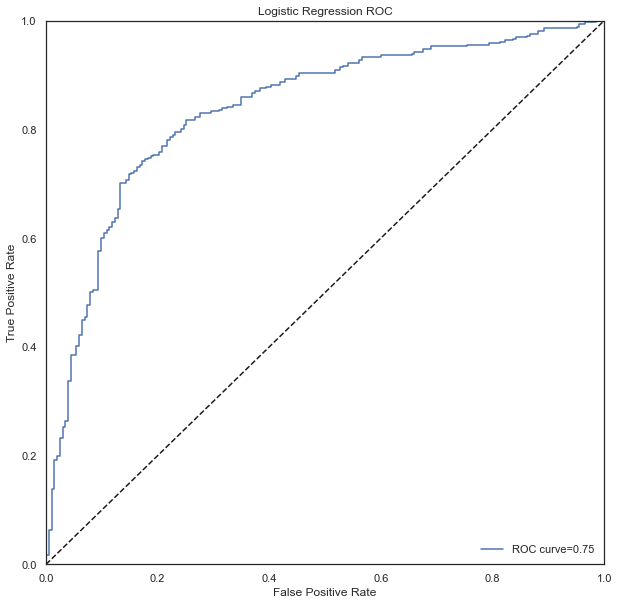

In [216]:

model_roc = roc_auc_score(y_test,  y_pred1)
fpr4,tpr4,thresholds4=roc_curve(y_test, model1.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC Logistic.png")

#### Logistic Regression balanced

In [138]:
model2=LogisticRegression(max_iter=1e8, class_weight='balanced')
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)
conf2=confusion_matrix(y_test,y_pred2)
display(conf2)
acc2=accuracy_score(y_test,y_pred2)
rec2=recall_score(y_test,y_pred2)
pr2=precision_score(y_test,y_pred2)
f12=f1_score(y_test,y_pred2)
print(acc2,pr2,rec2,f12)
model.append(["Logistic Regression balanced",acc2,pr2,rec2,f12])

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[157,  46],
       [ 77, 284]], dtype=int64)

0.7819148936170213 0.8606060606060606 0.7867036011080333 0.8219971056439942


#### Support Vector Machine

Area under the ROC curve : 0.828432


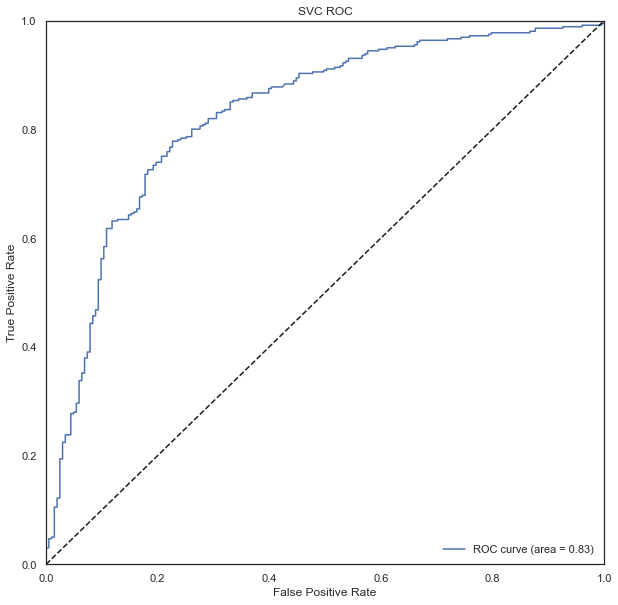

array([[128,  75],
       [ 48, 313]], dtype=int64)

0.7819148936170213 0.8067010309278351 0.8670360110803325 0.835781041388518


In [281]:
model3=SVC(probability=True)
test=model3.fit(X_train,y_train)
test = classifier.fit(X_train, y_train)
probas_=test.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC SVC.png")
plt.show()
y_pred3=model3.predict(X_test)
conf3=confusion_matrix(y_test,y_pred3)
display(conf3)
acc3=accuracy_score(y_test,y_pred3)
rec3=recall_score(y_test,y_pred3)
pr3=precision_score(y_test,y_pred3)
f13=f1_score(y_test,y_pred3)
print(acc3,pr3,rec3,f13)


In [285]:
pd.DataFrame(conf3, columns=["Predicted Non-User", "Predicted User"], index=["Actual Non-User", "Actual User"])

Predicted Non-User  Predicted User
Actual Non-User                 128              75
Actual User                      48             313

#### Nu-Support Vector Machine

In [141]:
model4=NuSVC(nu=0.1)
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)
conf4=confusion_matrix(y_test,y_pred4)
display(conf4)
acc4=accuracy_score(y_test,y_pred4)
rec4=recall_score(y_test,y_pred4)
pr4=precision_score(y_test,y_pred4)
f14=f1_score(y_test,y_pred4)
print(acc4,pr4,rec4,f14)
model.append(["Nu SVC",acc4,pr4,rec4,f14])

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[106,  97],
       [ 71, 290]], dtype=int64)

0.7021276595744681 0.7493540051679587 0.8033240997229917 0.7754010695187167


#### Gaussian Naive Bayes

In [142]:
model5=GaussianNB()
model5.fit(X_train,y_train)
y_pred5=model5.predict(X_test)
conf5=confusion_matrix(y_test,y_pred5)
display(conf5)
acc5=accuracy_score(y_test,y_pred5)
rec5=recall_score(y_test,y_pred5)
pr5=precision_score(y_test,y_pred5)
f15=f1_score(y_test,y_pred5)
print(acc5,pr5,rec5,f15)
model.append(["Gaussian Naive Bayes",acc5,pr5,rec5,f15])

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[144,  59],
       [ 75, 286]], dtype=int64)

0.7624113475177305 0.8289855072463768 0.7922437673130194 0.8101983002832861


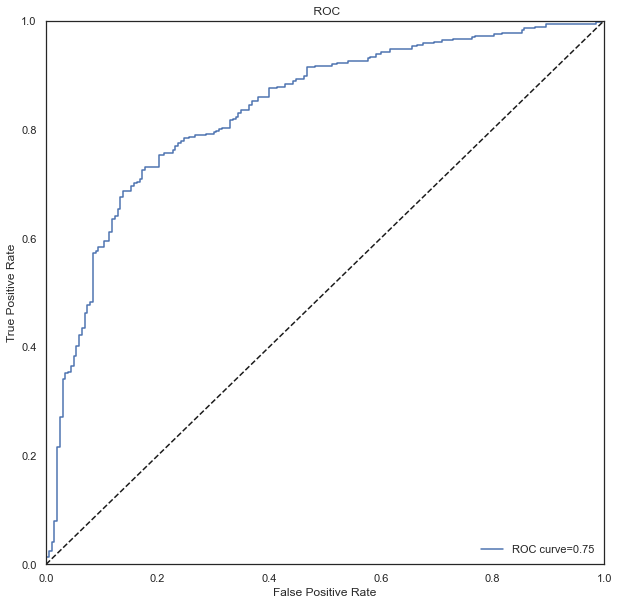

In [297]:

model_roc = roc_auc_score(y_test,  y_pred5)
fpr4,tpr4,thresholds4=roc_curve(y_test, model5.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC')
plt.legend(loc="lower right")

#### Decision Trees

In [143]:
model6=DecisionTreeClassifier()
model6.fit(X_train,y_train)
y_pred6=model6.predict(X_test)
conf6=confusion_matrix(y_test,y_pred6)
display(conf6)
acc6=accuracy_score(y_test,y_pred6)
rec6=recall_score(y_test,y_pred6)
pr6=precision_score(y_test,y_pred6)
f16=f1_score(y_test,y_pred6)
print(acc6,pr6,rec6,f16)
model.append(["Decision Tree",acc6,pr6,rec6,f16])

array([[115,  88],
       [ 67, 294]], dtype=int64)

0.725177304964539 0.7696335078534031 0.814404432132964 0.7913862718707941


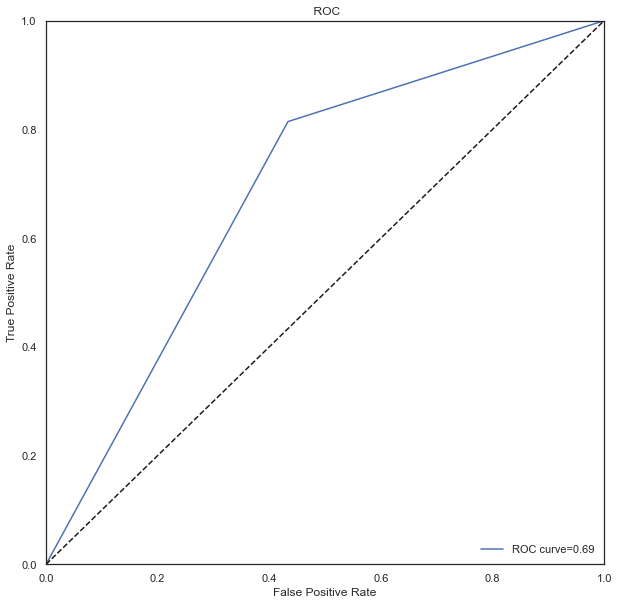

In [298]:

model_roc = roc_auc_score(y_test,  y_pred6)
fpr4,tpr4,thresholds4=roc_curve(y_test, model6.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC')
plt.legend(loc="lower right")

In [131]:
confusion_matrix(y_train,model6.predict(X_train))

array([[474,   0],
       [  0, 839]], dtype=int64)

#### Random Forest

In [144]:
model7=RandomForestClassifier()
model7.fit(X_train,y_train)
y_pred7=model7.predict(X_test)
conf7=confusion_matrix(y_test,y_pred7)
display(conf7)
acc7=accuracy_score(y_test,y_pred7)
rec7=recall_score(y_test,y_pred7)
pr7=precision_score(y_test,y_pred7)
f17=f1_score(y_test,y_pred7)
print(acc7,pr7,rec7,f17)
model.append(["Random Forest",acc7,pr7,rec7,f17])

<ipython-input-144-f21fb9904bd8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model7.fit(X_train,y_train)


array([[128,  75],
       [ 45, 316]], dtype=int64)

0.7872340425531915 0.8081841432225064 0.8753462603878116 0.8404255319148937


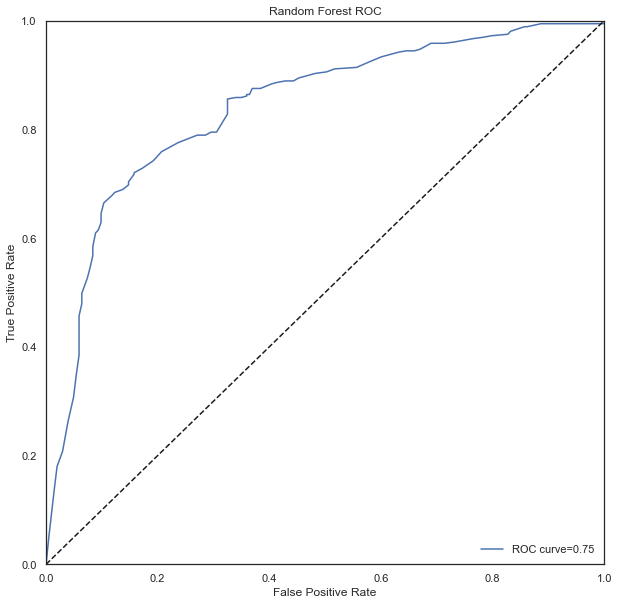

In [219]:

model_roc = roc_auc_score(y_test,  y_pred7)
fpr4,tpr4,thresholds4=roc_curve(y_test, model7.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC Random Forest.png")

In [133]:
confusion_matrix(y_train,model7.predict(X_train))

array([[474,   0],
       [  0, 839]], dtype=int64)

#### Random Forest balanced

In [145]:
model8=RandomForestClassifier(class_weight='balanced')
model8.fit(X_train,y_train)
y_pred8=model8.predict(X_test)
conf8=confusion_matrix(y_test,y_pred8)
display(conf8)
acc8=accuracy_score(y_test,y_pred8)
rec8=recall_score(y_test,y_pred8)
pr8=precision_score(y_test,y_pred8)
f18=f1_score(y_test,y_pred8)
print(acc8,pr8,rec8,f18)
model.append(["Random Forest balanced",acc8,pr8,rec8,f18])

<ipython-input-145-0d685d67038a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model8.fit(X_train,y_train)


array([[125,  78],
       [ 49, 312]], dtype=int64)

0.774822695035461 0.8 0.8642659279778393 0.8308921438082556


In [ ]:
confusion_matrix(y_train,model8.predict(X_train))

#### AdaBoost

In [146]:
model9=AdaBoostClassifier()
model9.fit(X_train,y_train)
y_pred9=model9.predict(X_test)
conf9=confusion_matrix(y_test,y_pred9)
display(conf9)
acc9=accuracy_score(y_test,y_pred9)
rec9=recall_score(y_test,y_pred9)
pr9=precision_score(y_test,y_pred9)
f19=f1_score(y_test,y_pred9)
print(acc9,pr9,rec9,f19)
model.append(["AdaBoost",acc9,pr9,rec9,f19])

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[127,  76],
       [ 54, 307]], dtype=int64)

0.7695035460992907 0.8015665796344648 0.850415512465374 0.825268817204301


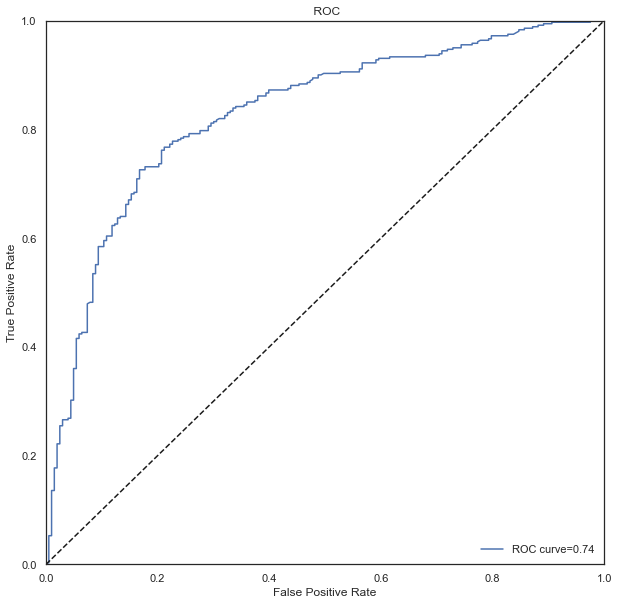

In [299]:

model_roc = roc_auc_score(y_test,  y_pred9)
fpr4,tpr4,thresholds4=roc_curve(y_test, model9.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC')
plt.legend(loc="lower right")

In [ ]:
confusion_matrix(y_train,model9.predict(X_train))

#### XGBoost

In [147]:
model10=XGBClassifier()
model10.fit(X_train,y_train)
y_pred10=model10.predict(X_test)
conf10=confusion_matrix(y_test,y_pred10)
display(conf10)
acc10=accuracy_score(y_test,y_pred10)
rec10=recall_score(y_test,y_pred10)
pr10=precision_score(y_test,y_pred10)
f110=f1_score(y_test,y_pred10)
print(acc10,pr10,rec10,f110)
model.append(["XGBoost",acc10,pr10,rec10,f110])

c:\users\nclee\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([[119,  84],
       [ 49, 312]], dtype=int64)

0.7641843971631206 0.7878787878787878 0.8642659279778393 0.8243064729194187


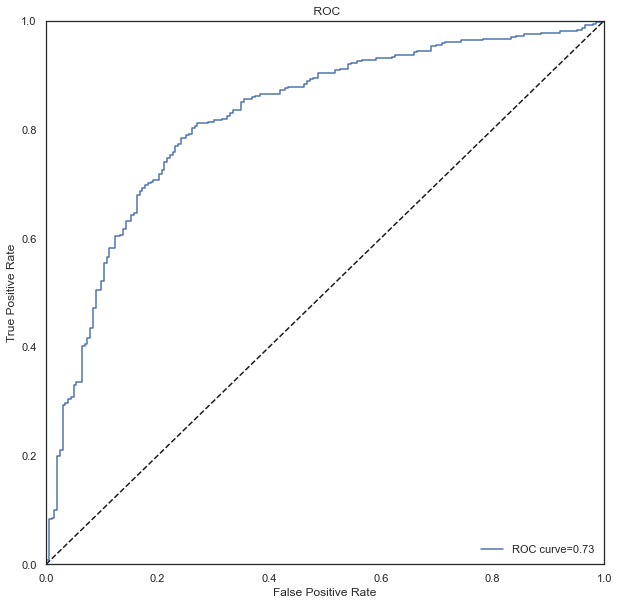

In [300]:

model_roc = roc_auc_score(y_test,  y_pred10)
fpr4,tpr4,thresholds4=roc_curve(y_test, model10.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(' ROC')
plt.legend(loc="lower right")

In [ ]:
confusion_matrix(y_train,model10.predict(X_train))

#### K-Nearest Neighbors

In [148]:
model11=KNeighborsClassifier(n_neighbors=7)
model11.fit(X_train,y_train)
y_pred11=model11.predict(X_test)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)
model.append(["KNN",acc11,pr11,rec11,f111])

<ipython-input-148-dc296e1e7da5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model11.fit(X_train,y_train)


array([[128,  75],
       [ 49, 312]], dtype=int64)

0.7801418439716312 0.8062015503875969 0.8642659279778393 0.8342245989304813


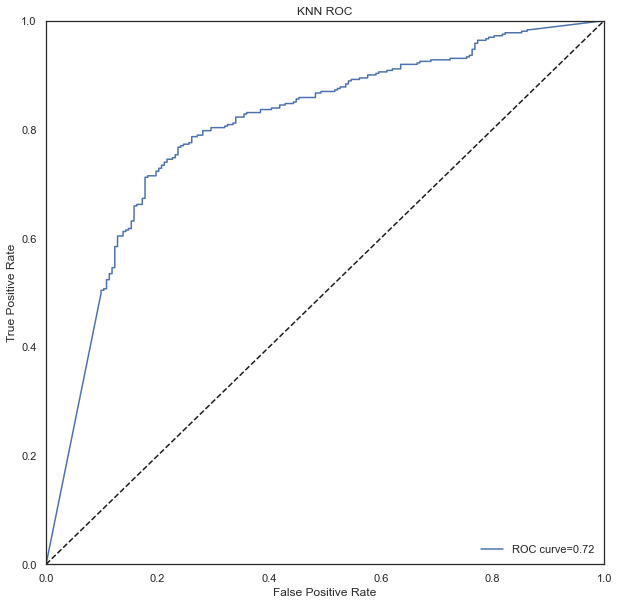

In [218]:

model_roc = roc_auc_score(y_test,  y_pred11)
fpr4,tpr4,thresholds4=roc_curve(y_test, model11.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC KNN.png")

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred11)
auc=roc_auc_score(y_test,y_pred11)
plt.plot(fpr,tpr)
print(auc)

In [149]:
model11=KNeighborsClassifier(weights='distance')
model11.fit(X_train,y_train)
y_pred11=model11.predict(X_test)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)

<ipython-input-149-c1f8a7f1edd3>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model11.fit(X_train,y_train)


array([[120,  83],
       [ 58, 303]], dtype=int64)

0.75 0.7849740932642487 0.8393351800554016 0.8112449799196788


#### Catboost

In [150]:
model12=CatBoostClassifier()
model12.fit(X_train,y_train)
y_pred12=model12.predict(X_test)
conf12=confusion_matrix(y_test,[eval(i) for i in y_pred12])
display(conf12)
acc12=accuracy_score(y_test,[eval(i) for i in y_pred12])
rec12=recall_score(y_test,[eval(i) for i in y_pred12])
pr12=precision_score(y_test,[eval(i) for i in y_pred12])
f112=f1_score(y_test,[eval(i) for i in y_pred12])
print(acc12,pr12,rec12,f112)
model.append(["CatBoost",acc12,pr12,rec12,f112])

Learning rate set to 0.011573
0:	learn: 0.6865814	total: 71.9ms	remaining: 1m 11s
1:	learn: 0.6807637	total: 73ms	remaining: 36.4s
2:	learn: 0.6748252	total: 74.1ms	remaining: 24.6s
3:	learn: 0.6687753	total: 75.2ms	remaining: 18.7s
4:	learn: 0.6627113	total: 76.3ms	remaining: 15.2s
5:	learn: 0.6565110	total: 77.4ms	remaining: 12.8s
6:	learn: 0.6507870	total: 78.5ms	remaining: 11.1s
7:	learn: 0.6444065	total: 79.6ms	remaining: 9.87s
8:	learn: 0.6390658	total: 80.7ms	remaining: 8.88s
9:	learn: 0.6343687	total: 81.8ms	remaining: 8.1s
10:	learn: 0.6293854	total: 82.9ms	remaining: 7.45s
11:	learn: 0.6247148	total: 84ms	remaining: 6.91s
12:	learn: 0.6191502	total: 85.2ms	remaining: 6.47s
13:	learn: 0.6138691	total: 86.8ms	remaining: 6.11s
14:	learn: 0.6093572	total: 88.3ms	remaining: 5.8s
15:	learn: 0.6045013	total: 89.7ms	remaining: 5.52s
16:	learn: 0.6005026	total: 91.6ms	remaining: 5.3s
17:	learn: 0.5956028	total: 93.5ms	remaining: 5.1s
18:	learn: 0.5908960	total: 95.1ms	remaining: 4.91s

187:	learn: 0.3831288	total: 314ms	remaining: 1.35s
188:	learn: 0.3826439	total: 315ms	remaining: 1.35s
189:	learn: 0.3821380	total: 316ms	remaining: 1.35s
190:	learn: 0.3818498	total: 318ms	remaining: 1.35s
191:	learn: 0.3814523	total: 319ms	remaining: 1.34s
192:	learn: 0.3811478	total: 321ms	remaining: 1.34s
193:	learn: 0.3807586	total: 322ms	remaining: 1.34s
194:	learn: 0.3802174	total: 323ms	remaining: 1.33s
195:	learn: 0.3796169	total: 325ms	remaining: 1.33s
196:	learn: 0.3793665	total: 327ms	remaining: 1.33s
197:	learn: 0.3792298	total: 329ms	remaining: 1.33s
198:	learn: 0.3789697	total: 333ms	remaining: 1.34s
199:	learn: 0.3786041	total: 334ms	remaining: 1.34s
200:	learn: 0.3782842	total: 336ms	remaining: 1.33s
201:	learn: 0.3780649	total: 337ms	remaining: 1.33s
202:	learn: 0.3775417	total: 339ms	remaining: 1.33s
203:	learn: 0.3770176	total: 340ms	remaining: 1.33s
204:	learn: 0.3764987	total: 342ms	remaining: 1.32s
205:	learn: 0.3762452	total: 343ms	remaining: 1.32s
206:	learn: 

444:	learn: 0.3179459	total: 642ms	remaining: 801ms
445:	learn: 0.3175463	total: 643ms	remaining: 799ms
446:	learn: 0.3172201	total: 645ms	remaining: 798ms
447:	learn: 0.3171246	total: 646ms	remaining: 796ms
448:	learn: 0.3168683	total: 647ms	remaining: 794ms
449:	learn: 0.3166270	total: 648ms	remaining: 792ms
450:	learn: 0.3164908	total: 650ms	remaining: 791ms
451:	learn: 0.3161669	total: 651ms	remaining: 789ms
452:	learn: 0.3159295	total: 652ms	remaining: 788ms
453:	learn: 0.3155223	total: 653ms	remaining: 786ms
454:	learn: 0.3154226	total: 655ms	remaining: 784ms
455:	learn: 0.3152449	total: 656ms	remaining: 782ms
456:	learn: 0.3149621	total: 657ms	remaining: 780ms
457:	learn: 0.3144873	total: 658ms	remaining: 779ms
458:	learn: 0.3142355	total: 659ms	remaining: 777ms
459:	learn: 0.3139291	total: 660ms	remaining: 775ms
460:	learn: 0.3137308	total: 662ms	remaining: 774ms
461:	learn: 0.3135911	total: 663ms	remaining: 772ms
462:	learn: 0.3132961	total: 664ms	remaining: 770ms
463:	learn: 

715:	learn: 0.2692684	total: 973ms	remaining: 386ms
716:	learn: 0.2691957	total: 975ms	remaining: 385ms
717:	learn: 0.2689450	total: 976ms	remaining: 383ms
718:	learn: 0.2688850	total: 977ms	remaining: 382ms
719:	learn: 0.2688567	total: 978ms	remaining: 380ms
720:	learn: 0.2687453	total: 979ms	remaining: 379ms
721:	learn: 0.2685535	total: 981ms	remaining: 378ms
722:	learn: 0.2685235	total: 982ms	remaining: 376ms
723:	learn: 0.2683865	total: 983ms	remaining: 375ms
724:	learn: 0.2683703	total: 984ms	remaining: 373ms
725:	learn: 0.2680387	total: 985ms	remaining: 372ms
726:	learn: 0.2677076	total: 986ms	remaining: 370ms
727:	learn: 0.2674171	total: 987ms	remaining: 369ms
728:	learn: 0.2672424	total: 989ms	remaining: 368ms
729:	learn: 0.2672183	total: 990ms	remaining: 366ms
730:	learn: 0.2670154	total: 991ms	remaining: 365ms
731:	learn: 0.2668083	total: 992ms	remaining: 363ms
732:	learn: 0.2666095	total: 994ms	remaining: 362ms
733:	learn: 0.2665162	total: 995ms	remaining: 361ms
734:	learn: 

963:	learn: 0.2320888	total: 1.3s	remaining: 48.5ms
964:	learn: 0.2318519	total: 1.3s	remaining: 47.1ms
965:	learn: 0.2316966	total: 1.3s	remaining: 45.8ms
966:	learn: 0.2314924	total: 1.3s	remaining: 44.4ms
967:	learn: 0.2313556	total: 1.3s	remaining: 43.1ms
968:	learn: 0.2311493	total: 1.3s	remaining: 41.8ms
969:	learn: 0.2310770	total: 1.31s	remaining: 40.4ms
970:	learn: 0.2310084	total: 1.31s	remaining: 39.1ms
971:	learn: 0.2309532	total: 1.31s	remaining: 37.7ms
972:	learn: 0.2307221	total: 1.31s	remaining: 36.4ms
973:	learn: 0.2304907	total: 1.31s	remaining: 35ms
974:	learn: 0.2303484	total: 1.31s	remaining: 33.7ms
975:	learn: 0.2300867	total: 1.31s	remaining: 32.3ms
976:	learn: 0.2300227	total: 1.32s	remaining: 31ms
977:	learn: 0.2298208	total: 1.32s	remaining: 29.6ms
978:	learn: 0.2295701	total: 1.32s	remaining: 28.3ms
979:	learn: 0.2294653	total: 1.32s	remaining: 26.9ms
980:	learn: 0.2292999	total: 1.32s	remaining: 25.6ms
981:	learn: 0.2291014	total: 1.32s	remaining: 24.2ms
982

array([[133,  70],
       [ 46, 315]], dtype=int64)

0.7943262411347518 0.8181818181818182 0.8725761772853186 0.8445040214477212


In [ ]:
confusion_matrix(y_train,[eval(i) for i in model12.predict(X_train)])

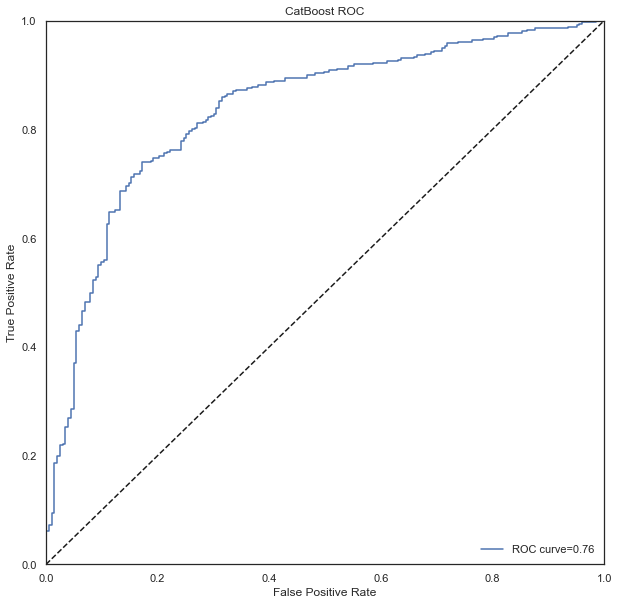

In [215]:
model_roc = roc_auc_score(y_test, [eval(i) for i in y_pred12])
fpr4,tpr4,thresholds4=roc_curve(y_test, model12.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC Cat.png")

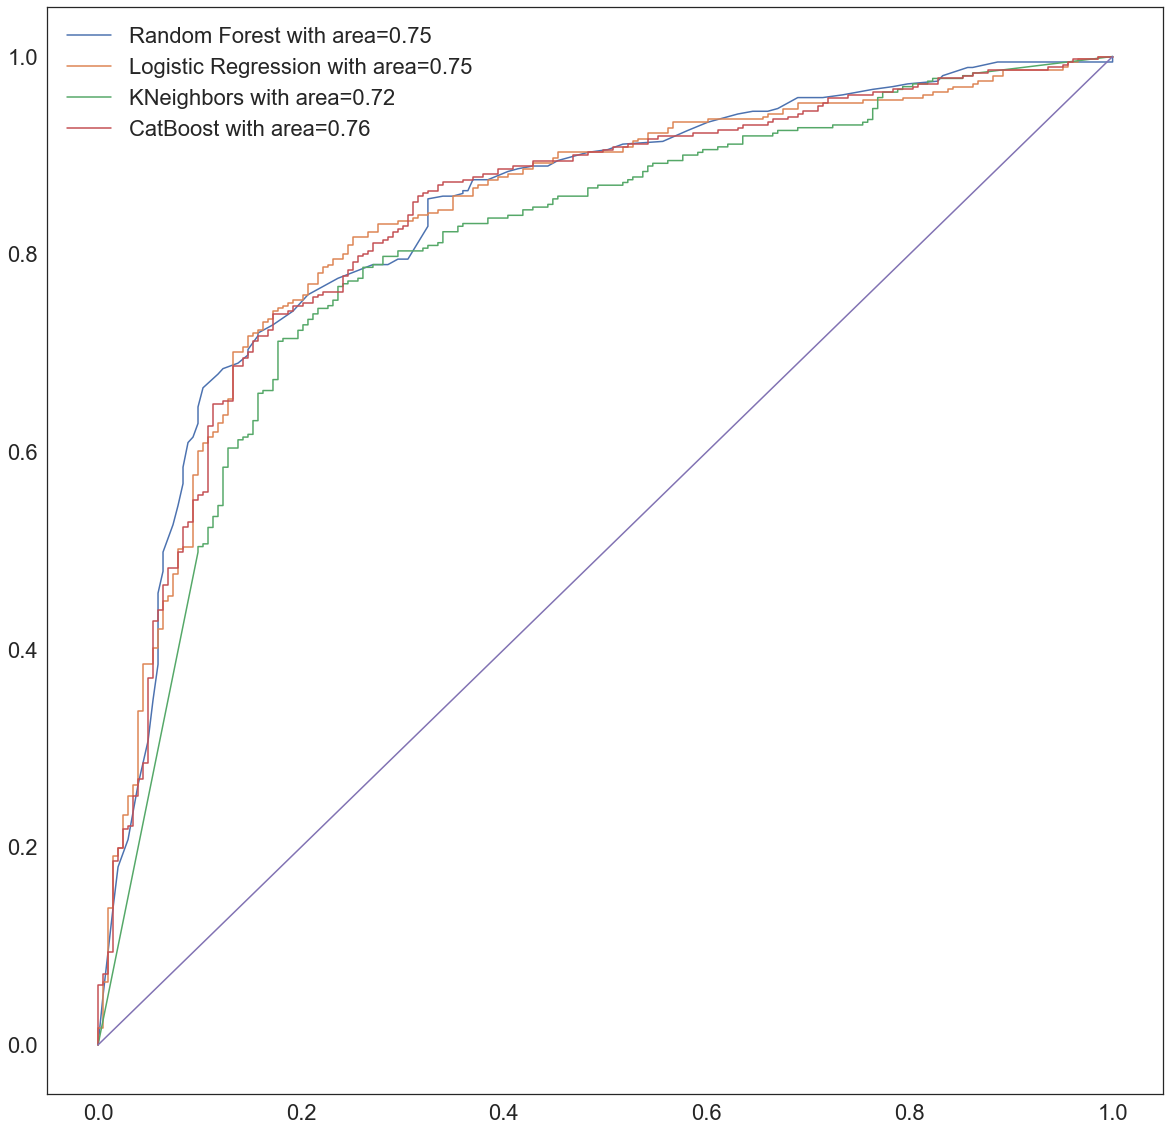

In [179]:
model_roc1=roc_auc_score(y_test, y_pred7)
fpr1,tpr1,thresholds1=roc_curve(y_test, model7.predict_proba(X_test)[:,1])

model_roc2=roc_auc_score(y_test, y_pred1)
fpr2,tpr2,thresholds2=roc_curve(y_test, model1.predict_proba(X_test)[:,1])

model_roc3=roc_auc_score(y_test, y_pred11)
fpr3,tpr3,thresholds3=roc_curve(y_test, model11.predict_proba(X_test)[:,1])

model_roc4=roc_auc_score(y_test, [eval(i) for i in y_pred12])
fpr4,tpr4,thresholds4=roc_curve(y_test, model12.predict_proba(X_test)[:,1])

plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 2)
plt.figure(figsize=(20,20))
plt.plot(fpr1,tpr1, label=f'Random Forest with area={model_roc1.round(2)}')
plt.plot(fpr2,tpr2, label=f'Logistic Regression with area={model_roc2.round(2)}')
plt.plot(fpr3,tpr3, label=f'KNeighbors with area={model_roc3.round(2)}')
plt.plot(fpr4,tpr4, label=f'CatBoost with area={model_roc4.round(2)}')

plt.plot([0,1],[0,1])
plt.legend()
plt.show()

In [305]:
model.remove(['SVC', 0.7819148936170213,  0.8067010309278351,  0.8670360110803325,  0.835781041388518])

In [304]:
model

[['Logistic Regression',
  0.7819148936170213,
  0.8115183246073299,
  0.8587257617728532,
  0.8344549125168237],
 ['Logistic Regression balanced',
  0.7819148936170213,
  0.8606060606060606,
  0.7867036011080333,
  0.8219971056439942],
 ['Nu SVC',
  0.7021276595744681,
  0.7493540051679587,
  0.8033240997229917,
  0.7754010695187167],
 ['Gaussian Naive Bayes',
  0.7624113475177305,
  0.8289855072463768,
  0.7922437673130194,
  0.8101983002832861],
 ['Decision Tree',
  0.725177304964539,
  0.7696335078534031,
  0.814404432132964,
  0.7913862718707941],
 ['Random Forest',
  0.7872340425531915,
  0.8081841432225064,
  0.8753462603878116,
  0.8404255319148937],
 ['Random Forest balanced',
  0.774822695035461,
  0.8,
  0.8642659279778393,
  0.8308921438082556],
 ['AdaBoost',
  0.7695035460992907,
  0.8015665796344648,
  0.850415512465374,
  0.825268817204301],
 ['XGBoost',
  0.7641843971631206,
  0.7878787878787878,
  0.8642659279778393,
  0.8243064729194187],
 ['KNN',
  0.7801418439716312

In [306]:
pd.DataFrame(model, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])\
.set_index("Model").sort_values(by="Recall", ascending=False)

Accuracy  Precision    Recall        F1
Model                                                                
Random Forest                 0.787234   0.808184  0.875346  0.840426
CatBoost                      0.794326   0.818182  0.872576  0.844504
SVC                           0.781915   0.806701  0.867036  0.835781
Random Forest balanced        0.774823   0.800000  0.864266  0.830892
XGBoost                       0.764184   0.787879  0.864266  0.824306
KNN                           0.780142   0.806202  0.864266  0.834225
Logistic Regression           0.781915   0.811518  0.858726  0.834455
AdaBoost                      0.769504   0.801567  0.850416  0.825269
Decision Tree                 0.725177   0.769634  0.814404  0.791386
Nu SVC                        0.702128   0.749354  0.803324  0.775401
Gaussian Naive Bayes          0.762411   0.828986  0.792244  0.810198
Logistic Regression balanced  0.781915   0.860606  0.786704  0.821997

#### PCA

In [220]:
pca=PCA(0.85).fit(X_train)
X_train2=pca.transform(X_train)
X_test2=pca.transform(X_test)

In [221]:
pca.explained_variance_ratio_.round(2)

array([0.26, 0.2 , 0.1 , 0.1 , 0.08, 0.06, 0.06])

In [ ]:
pca.singular_values_.shape[0]

##### Catboost

In [222]:
model12=CatBoostClassifier()
model12.fit(X_train2,y_train)
y_pred12=model12.predict(X_test2)
conf12=confusion_matrix(y_test,[eval(i) for i in y_pred12])
display(conf12)
acc12=accuracy_score(y_test,[eval(i) for i in y_pred12])
rec12=recall_score(y_test,[eval(i) for i in y_pred12])
pr12=precision_score(y_test,[eval(i) for i in y_pred12])
f112=f1_score(y_test,[eval(i) for i in y_pred12])
print(acc12,pr12,rec12,f112)

Learning rate set to 0.011573
0:	learn: 0.6877111	total: 4.77ms	remaining: 4.76s
1:	learn: 0.6829013	total: 13.1ms	remaining: 6.54s
2:	learn: 0.6776400	total: 14.7ms	remaining: 4.88s
3:	learn: 0.6723069	total: 16.1ms	remaining: 4.02s
4:	learn: 0.6681744	total: 17.9ms	remaining: 3.57s
5:	learn: 0.6634198	total: 19.5ms	remaining: 3.23s
6:	learn: 0.6590771	total: 21.1ms	remaining: 3s
7:	learn: 0.6544871	total: 22.7ms	remaining: 2.82s
8:	learn: 0.6495066	total: 24.5ms	remaining: 2.7s
9:	learn: 0.6450297	total: 26.3ms	remaining: 2.61s
10:	learn: 0.6405097	total: 27.9ms	remaining: 2.51s
11:	learn: 0.6355972	total: 29.7ms	remaining: 2.45s
12:	learn: 0.6319196	total: 31.4ms	remaining: 2.38s
13:	learn: 0.6280062	total: 33ms	remaining: 2.32s
14:	learn: 0.6236722	total: 34.5ms	remaining: 2.27s
15:	learn: 0.6196241	total: 36.3ms	remaining: 2.23s
16:	learn: 0.6161260	total: 38ms	remaining: 2.2s
17:	learn: 0.6124347	total: 39.9ms	remaining: 2.17s
18:	learn: 0.6093213	total: 41.8ms	remaining: 2.16s
1

181:	learn: 0.4084025	total: 332ms	remaining: 1.49s
182:	learn: 0.4079566	total: 334ms	remaining: 1.49s
183:	learn: 0.4074518	total: 335ms	remaining: 1.49s
184:	learn: 0.4071183	total: 337ms	remaining: 1.48s
185:	learn: 0.4066601	total: 339ms	remaining: 1.48s
186:	learn: 0.4062647	total: 341ms	remaining: 1.48s
187:	learn: 0.4058182	total: 342ms	remaining: 1.48s
188:	learn: 0.4055600	total: 344ms	remaining: 1.48s
189:	learn: 0.4052008	total: 346ms	remaining: 1.47s
190:	learn: 0.4049093	total: 348ms	remaining: 1.47s
191:	learn: 0.4044871	total: 350ms	remaining: 1.47s
192:	learn: 0.4040371	total: 351ms	remaining: 1.47s
193:	learn: 0.4037234	total: 353ms	remaining: 1.47s
194:	learn: 0.4033126	total: 354ms	remaining: 1.46s
195:	learn: 0.4029317	total: 356ms	remaining: 1.46s
196:	learn: 0.4023642	total: 358ms	remaining: 1.46s
197:	learn: 0.4020187	total: 360ms	remaining: 1.46s
198:	learn: 0.4015536	total: 362ms	remaining: 1.46s
199:	learn: 0.4012054	total: 364ms	remaining: 1.46s
200:	learn: 

376:	learn: 0.3480204	total: 670ms	remaining: 1.11s
377:	learn: 0.3478211	total: 672ms	remaining: 1.1s
378:	learn: 0.3477119	total: 674ms	remaining: 1.1s
379:	learn: 0.3474494	total: 676ms	remaining: 1.1s
380:	learn: 0.3471937	total: 677ms	remaining: 1.1s
381:	learn: 0.3469576	total: 679ms	remaining: 1.1s
382:	learn: 0.3467672	total: 680ms	remaining: 1.09s
383:	learn: 0.3465698	total: 682ms	remaining: 1.09s
384:	learn: 0.3463290	total: 684ms	remaining: 1.09s
385:	learn: 0.3461451	total: 685ms	remaining: 1.09s
386:	learn: 0.3459354	total: 687ms	remaining: 1.09s
387:	learn: 0.3457665	total: 689ms	remaining: 1.09s
388:	learn: 0.3455502	total: 690ms	remaining: 1.08s
389:	learn: 0.3453556	total: 692ms	remaining: 1.08s
390:	learn: 0.3452031	total: 693ms	remaining: 1.08s
391:	learn: 0.3449197	total: 695ms	remaining: 1.08s
392:	learn: 0.3448314	total: 697ms	remaining: 1.08s
393:	learn: 0.3446524	total: 699ms	remaining: 1.07s
394:	learn: 0.3443235	total: 701ms	remaining: 1.07s
395:	learn: 0.344

591:	learn: 0.3032554	total: 1.01s	remaining: 699ms
592:	learn: 0.3030680	total: 1.01s	remaining: 697ms
593:	learn: 0.3029206	total: 1.02s	remaining: 695ms
594:	learn: 0.3027438	total: 1.02s	remaining: 694ms
595:	learn: 0.3025794	total: 1.02s	remaining: 692ms
596:	learn: 0.3024024	total: 1.02s	remaining: 690ms
597:	learn: 0.3021293	total: 1.02s	remaining: 689ms
598:	learn: 0.3019102	total: 1.03s	remaining: 687ms
599:	learn: 0.3017141	total: 1.03s	remaining: 686ms
600:	learn: 0.3014461	total: 1.03s	remaining: 684ms
601:	learn: 0.3013306	total: 1.03s	remaining: 682ms
602:	learn: 0.3011992	total: 1.03s	remaining: 681ms
603:	learn: 0.3009827	total: 1.03s	remaining: 679ms
604:	learn: 0.3008190	total: 1.04s	remaining: 678ms
605:	learn: 0.3007238	total: 1.04s	remaining: 676ms
606:	learn: 0.3005934	total: 1.04s	remaining: 674ms
607:	learn: 0.3004625	total: 1.04s	remaining: 673ms
608:	learn: 0.3002631	total: 1.04s	remaining: 671ms
609:	learn: 0.3000962	total: 1.05s	remaining: 669ms
610:	learn: 

801:	learn: 0.2668452	total: 1.35s	remaining: 334ms
802:	learn: 0.2666534	total: 1.35s	remaining: 332ms
803:	learn: 0.2665497	total: 1.36s	remaining: 331ms
804:	learn: 0.2664722	total: 1.36s	remaining: 330ms
805:	learn: 0.2663911	total: 1.36s	remaining: 328ms
806:	learn: 0.2662450	total: 1.36s	remaining: 326ms
807:	learn: 0.2661206	total: 1.37s	remaining: 325ms
808:	learn: 0.2658791	total: 1.37s	remaining: 323ms
809:	learn: 0.2657237	total: 1.37s	remaining: 322ms
810:	learn: 0.2655213	total: 1.37s	remaining: 320ms
811:	learn: 0.2654003	total: 1.38s	remaining: 319ms
812:	learn: 0.2652813	total: 1.38s	remaining: 317ms
813:	learn: 0.2650808	total: 1.38s	remaining: 315ms
814:	learn: 0.2649656	total: 1.38s	remaining: 314ms
815:	learn: 0.2648406	total: 1.38s	remaining: 312ms
816:	learn: 0.2647032	total: 1.39s	remaining: 310ms
817:	learn: 0.2645710	total: 1.39s	remaining: 309ms
818:	learn: 0.2645278	total: 1.39s	remaining: 307ms
819:	learn: 0.2644246	total: 1.39s	remaining: 305ms
820:	learn: 

979:	learn: 0.2410252	total: 1.69s	remaining: 34.4ms
980:	learn: 0.2408690	total: 1.69s	remaining: 32.7ms
981:	learn: 0.2407380	total: 1.69s	remaining: 31ms
982:	learn: 0.2405453	total: 1.69s	remaining: 29.3ms
983:	learn: 0.2404906	total: 1.69s	remaining: 27.5ms
984:	learn: 0.2403858	total: 1.69s	remaining: 25.8ms
985:	learn: 0.2401529	total: 1.7s	remaining: 24.1ms
986:	learn: 0.2399431	total: 1.7s	remaining: 22.4ms
987:	learn: 0.2397235	total: 1.7s	remaining: 20.6ms
988:	learn: 0.2395996	total: 1.7s	remaining: 18.9ms
989:	learn: 0.2394487	total: 1.7s	remaining: 17.2ms
990:	learn: 0.2392997	total: 1.71s	remaining: 15.5ms
991:	learn: 0.2391441	total: 1.71s	remaining: 13.8ms
992:	learn: 0.2390337	total: 1.71s	remaining: 12ms
993:	learn: 0.2388695	total: 1.71s	remaining: 10.3ms
994:	learn: 0.2386926	total: 1.71s	remaining: 8.6ms
995:	learn: 0.2385483	total: 1.71s	remaining: 6.88ms
996:	learn: 0.2384010	total: 1.72s	remaining: 5.16ms
997:	learn: 0.2382947	total: 1.72s	remaining: 3.44ms
998

array([[124,  79],
       [ 49, 312]], dtype=int64)

0.7730496453900709 0.7979539641943734 0.8642659279778393 0.8297872340425532


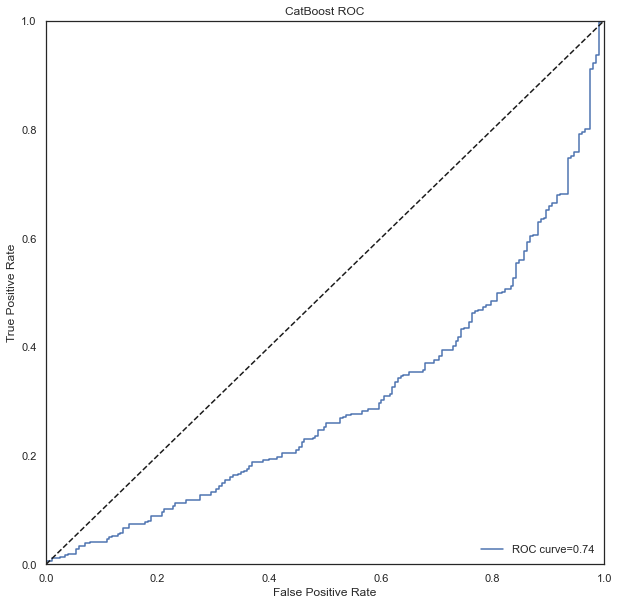

In [226]:
model_roc = roc_auc_score(y_test, [eval(i) for i in y_pred12])
fpr4,tpr4,thresholds4=roc_curve(y_test, model12.predict_proba(X_test)[:,1])
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()


plt.plot(fpr4,tpr4, label=f'ROC curve={model_roc.round(2)}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC Cat2.png")

#### SVC

Area under the ROC curve : 0.828446


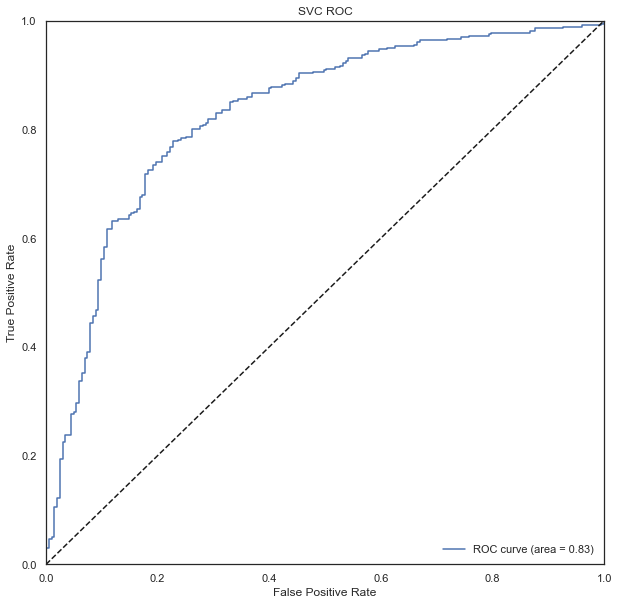

array([[128,  75],
       [ 48, 313]], dtype=int64)

0.7819148936170213 0.8067010309278351 0.8670360110803325 0.835781041388518


In [227]:
model3=SVC(probability=True)
test=model3.fit(X_train,y_train)
test = classifier.fit(X_train, y_train)
probas_=test.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)
plt.style.use('seaborn-whitegrid')
sns.set(style="white", font_scale = 1)
plt.figure(figsize=(10,10))
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC')
plt.legend(loc="lower right")
plt.savefig("graph/ROC SVC2.png")
plt.show()
y_pred3=model3.predict(X_test)
conf3=confusion_matrix(y_test,y_pred3)
display(conf3)
acc3=accuracy_score(y_test,y_pred3)
rec3=recall_score(y_test,y_pred3)
pr3=precision_score(y_test,y_pred3)
f13=f1_score(y_test,y_pred3)
print(acc3,pr3,rec3,f13)


##### Random Forest

In [ ]:
model7=RandomForestClassifier()
model7.fit(X_train2,y_train)
y_pred7=model7.predict(X_test2)
conf7=confusion_matrix(y_test,y_pred7)
display(conf7)
acc7=accuracy_score(y_test,y_pred7)
rec7=recall_score(y_test,y_pred7)
pr7=precision_score(y_test,y_pred7)
f17=f1_score(y_test,y_pred7)
print(acc7,pr7,rec7,f17)

In [ ]:
confusion_matrix(y_train,model7.predict(X_train2))

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred7)
auc=roc_auc_score(y_test,y_pred7)
plt.plot(fpr,tpr)
print(auc)

#### K-Nearest Neighbors

In [ ]:
model11=KNeighborsClassifier(n_neighbors=5)
model11.fit(X_train2,y_train)
y_pred11=model11.predict(X_test2)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred11)
auc=roc_auc_score(y_test,y_pred11)
plt.plot(fpr,tpr)
print(auc)

In [ ]:
model11=KNeighborsClassifier(weights='distance')
model11.fit(X_train2,y_train)
y_pred11=model11.predict(X_test2)
conf11=confusion_matrix(y_test,y_pred11)
display(conf11)
acc11=accuracy_score(y_test,y_pred11)
rec11=recall_score(y_test,y_pred11)
pr11=precision_score(y_test,y_pred11)
f111=f1_score(y_test,y_pred11)
print(acc11,pr11,rec11,f111)

In [ ]:
fpr,tpr,_=roc_curve(y_test,y_pred11)
auc=roc_auc_score(y_test,y_pred11)
plt.plot(fpr,tpr)
print(auc)

Got worse with the PCA